<a href="https://colab.research.google.com/github/Pawcio93/House-Prices-Kaggle-/blob/master/House_prices__Analysis_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETTINGS

## LIBRARIES

In [1]:
### IMPORT LIBRARIES ###
# MATH
import math
# NUMPY
import numpy as np # linear algebra
# PANDAS
import pandas as pd # data processing
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
# MATPLOTLIB
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
# SEABORN
import seaborn as sns
from matplotlib.pyplot import show
color = sns.color_palette()
sns.set_style('darkgrid')
# SCIPY
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from scipy.special import boxcox1p
# WARNING
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
# DISPLAY
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display_html
# POWER PREDICTIVE SCORE
!pip install ppscore
import ppscore as pps
# COLAB
from google.colab import files
from google.colab import drive
# SYS
import sys
# IPYNB
!pip install import-ipynb
import import_ipynb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# DOWNLOAD MODULE
sys.path.append('/content/drive/My Drive/Colab Notebooks/')
!cp -r "/content/drive/My Drive/Colab Notebooks/Data_Preparation_Library.ipynb" '/content/'

In [3]:
# IMPORT LIBRARY
import Data_Preparation_Library as DPL
from Data_Preparation_Library import DataAnalysis
from Data_Preparation_Library import DataProcessing

importing Jupyter notebook from Data_Preparation_Library.ipynb


## NOTEBOOK SETTINGS

In [4]:
# Notebook settings
pd.set_option('display.max_columns', None)
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red', 'figure.facecolor':'white'})

# INTRODUCTION

  This Notebook is an analysis of **House Prices: Advanced Regression Techniques (Kaggle competition)**

**PURPOSE:
*The issue is to predict the house price in Ames, Iowa, with best possible accuracy using available variables***

Below You can see sections structure:
  - DATA IMPORT AND OVERVIEW
    - Import
    - Overview
  - DATA ANALYSIS
    - Overall analysis
    - Variables analysis

# DATASET IMPORT AND OVERVIEW

## IMPORT DATASETS
  - Trainig set
  - Test set
  - Variables description

In [0]:
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')
dataset = pd.concat([dataset_train, dataset_test], axis=0)
data_description = open("data_description.txt", "r")
train_columns = dataset_train.columns.drop('SalePrice')
target = 'SalePrice'

 - Dataset overview

In [6]:
dataset.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   
5   6          50       RL       85.000    14115   Pave   NaN      IR1   
6   7          20       RL       75.000    10084   Pave   NaN      Reg   
7   8          60       RL          nan    10382   Pave   NaN      IR1   
8   9          50       RM       51.000     6120   Pave   NaN      Reg   
9  10         190       RL       50.000     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   
5       0.000        TA        TA       Wood       Gd       TA           No   
6     186.000        Gd        TA      PConc       Ex       TA           Av   
7     240.000        TA        TA     CBlock       Gd       TA           Mn   
8       0.000        TA        TA     BrkTil       TA       TA           No   
9       

# DATA ANALYSIS

## OVERALL ANALYSIS

### DATA STRUCTURE

#### List of variables




 - MSSubClass: Identifies the type of dwelling involved in the sale.
 - MSZoning: Identifies the general zoning classification of the sale.
 - LotFrontage: Linear feet of street connected to property
 - LotArea: Lot size in square feet
 - Street: Type of road access to property
 - Alley: Type of alley access to property
 - LotShape: General shape of property
 - LandContour: Flatness of the property
 - Utilities: Type of utilities available
 - LotConfig: Lot configuration
 - LandSlope: Slope of property
 - Neighborhood: Physical locations within Ames city limits
 - Condition1: Proximity to various conditions
 - Condition2: Proximity to various conditions (if more than one is present)
 - BldgType: Type of dwelling
 - HouseStyle: Style of dwelling
 - OverallQual: Rates the overall material and finish of the house
 - OverallCond: Rates the overall condition of the house
 - YearBuilt: Original construction date
 - YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
 - RoofStyle: Type of roof
 - RoofMatl: Roof material
 - Exterior1st: Exterior covering on house
 - Exterior2nd: Exterior covering on house (if more than one material)
 - MasVnrType: Masonry veneer type
 - MasVnrArea: Masonry veneer area in square feet
 - ExterQual: Evaluates the quality of the material on the exterior 
 - ExterCond: Evaluates the present condition of the material on the exterior
 - Foundation: Type of foundation
 - BsmtQual: Evaluates the height of the basement
 - BsmtCond: Evaluates the general condition of the basement
 - BsmtExposure: Refers to walkout or garden level walls
 - BsmtFinType1: Rating of basement finished area
 - BsmtFinSF1: Type 1 finished square feet
 - BsmtFinType2: Rating of basement finished area (if multiple types)
 - BsmtFinSF2: Type 2 finished square feet
 - BsmtUnfSF: Unfinished square feet of basement area
 - TotalBsmtSF: Total square feet of basement area
 - Heating: Type of heating
 - HeatingQC: Heating quality and condition
 - CentralAir: Central air conditioning
 - Electrical: Electrical system
 - 1stFlrSF: First Floor square feet
 - 2ndFlrSF: Second floor square feet
 - LowQualFinSF: Low quality finished square feet (all floors)
 - GrLivArea: Above grade (ground) living area square feet
 - BsmtFullBath: Basement full bathrooms
 - BsmtHalfBath: Basement half bathrooms
 - FullBath: Full bathrooms above grade
 - HalfBath: Half baths above grade
 - Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
 - Kitchen: Kitchens above grade
 - KitchenQual: Kitchen quality
 - TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
 - Functional: Home functionality (Assume typical unless deductions are warranted)
 - Fireplaces: Number of fireplaces
 - FireplaceQu: Fireplace quality
 - GarageType: Garage location
 - GarageYrBlt: Year garage was built
 - GarageFinish: Interior finish of the garage
 - GarageCars: Size of garage in car capacity
 - GarageArea: Size of garage in square feet
 - GarageQual: Garage quality
 - GarageCond: Garage condition
 - PavedDrive: Paved driveway
 - WoodDeckSF: Wood deck area in square feet
 - OpenPorchSF: Open porch area in square feet
 - EnclosedPorch: Enclosed porch area in square feet
 - 3SsnPorch: Three season porch area in square feet
 - ScreenPorch: Screen porch area in square feet
 - PoolArea: Pool area in square feet
 - PoolQC: Pool quality
 - Fence: Fence quality
 - MiscFeature: Miscellaneous feature not covered in other categories
 - MiscVal: $Value of miscellaneous feature
 - MoSold: Month Sold (MM)
 - YrSold: Year Sold (YYYY)
 - SaleType: Type of sale
 - SaleCondition: Condition of sale

####Datasets shape and types of variables
As we see both datasets contain 80 independend variables (Predictors) and almost 1500 samples (training set have 81 variables because of our target)

In [7]:
print('Trainig dataset shape{}'.format(dataset_train.shape))

Trainig dataset shape(1460, 81)


In [8]:
print('Test dataset shape{}'.format(dataset_test.shape))

Test dataset shape(1459, 80)


Dataset consists of numeric and categorical variables

In [9]:
print(dataset.dtypes.value_counts())

object     43
int64      26
float64    12
dtype: int64


#### Statistical parameters of numerical variables

In [10]:
dataset.describe()

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count 2919.000    2919.000     2433.000   2919.000     2919.000     2919.000   
mean  1460.000      57.138       69.306  10168.114        6.089        5.565   
std    842.787      42.518       23.345   7886.996        1.410        1.113   
min      1.000      20.000       21.000   1300.000        1.000        1.000   
25%    730.500      20.000       59.000   7478.000        5.000        5.000   
50%   1460.000      50.000       68.000   9453.000        6.000        5.000   
75%   2189.500      70.000       80.000  11570.000        7.000        6.000   
max   2919.000     190.000      313.000 215245.000       10.000        9.000   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count   2919.000      2919.000    2896.000    2918.000    2918.000   2918.000   
mean    1971.313      1984.264     102.201     441.423      49.582    560.772   
std       30.291        20.894     179.334     455.611     169.206    439.544   
min     1872.000      1950.000       0.000       0.000       0.000      0.000   
25%     1953.500      1965.000       0.000       0.000       0.000    220.000   
50%     1973.000      1993.000       0.000     368.500       0.000    467.000   
75%     2001.000      2004.000     164.000     733.000       0.000    805.500   
max     2010.000      2010.000    1600.000    5644.000    1526.000   2336.000   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count     2918.000  2919.000  2919.000      2919.000   2919.000      2917.000   
mean      1051.778  1159.582   336.484         4.694   1500.760         0.430   
std        440.766   392.362   428.701        46.397    506.051         0.525   
min          0.000   334.000     0.000         0.000    334.000         0.000   
25%        793.000   876.000     0.000         0.000   1126.000         0.000   
50%        989.500  1082.000     0.000         0.000   1444.000         0.000   
75%       1302.000  1387.500   704.000         0.000   1743.500         1.000   
max       6110.000  5095.000  2065.000      1064.000   5642.000         3.000   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count      2917.000  2919.000  2919.000      2919.000      2919.000   
mean          0.061     1.568     0.380         2.860         1.045   
std           0.246     0.553     0.503         0.823         0.214   
min           0.000     0.000     0.000         0.000         0.000   
25%           0.000     1.000     0.000         2.000         1.000   
50%           0.000     2.000     0.000         3.000         1.000   
75%           0.000     2.000     1.000         3.000         1.000   
max           2.000     4.000     2.000         8.000         3.000   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count      2919.000    2919.000     2760.000    2918.000    2918.000   
mean          6.452       0.597     1978.113       1.767     472.875   
std           1.569       0.646       25.574       0.762     215.395   
min           2.000       0.000     1895.000       0.000       0.000   
25%           5.000       0.000     1960.000       1.000     320.000   
50%           6.000       1.000     1979.000       2.000     480.000   
75%           7.000       1.000     2002.000       2.000     576.000   
max          15.000       4.000     2207.000       5.000    1488.000   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count    2919.000     2919.000       2919.000   2919.000     2919.000   
mean       93.710       47.487         23.098      2.602       16.062   
std       126.527       67.575         64.244     25.188       56.184   
min         0.000        0.000          0.000      0.000        0.000   
25%         0.000        0.000          0.000      0.000        0.000   
50%         0.000       26.000          0.000      0.000        0.000   
75%       168.000       70.000 

### CORRELATION MATRIX

 - Heatmap of correlation between each numerical variables. Bigger box = higher correlation

In [0]:
data_analysis = DataAnalysis(dataset_train, dataset_test)

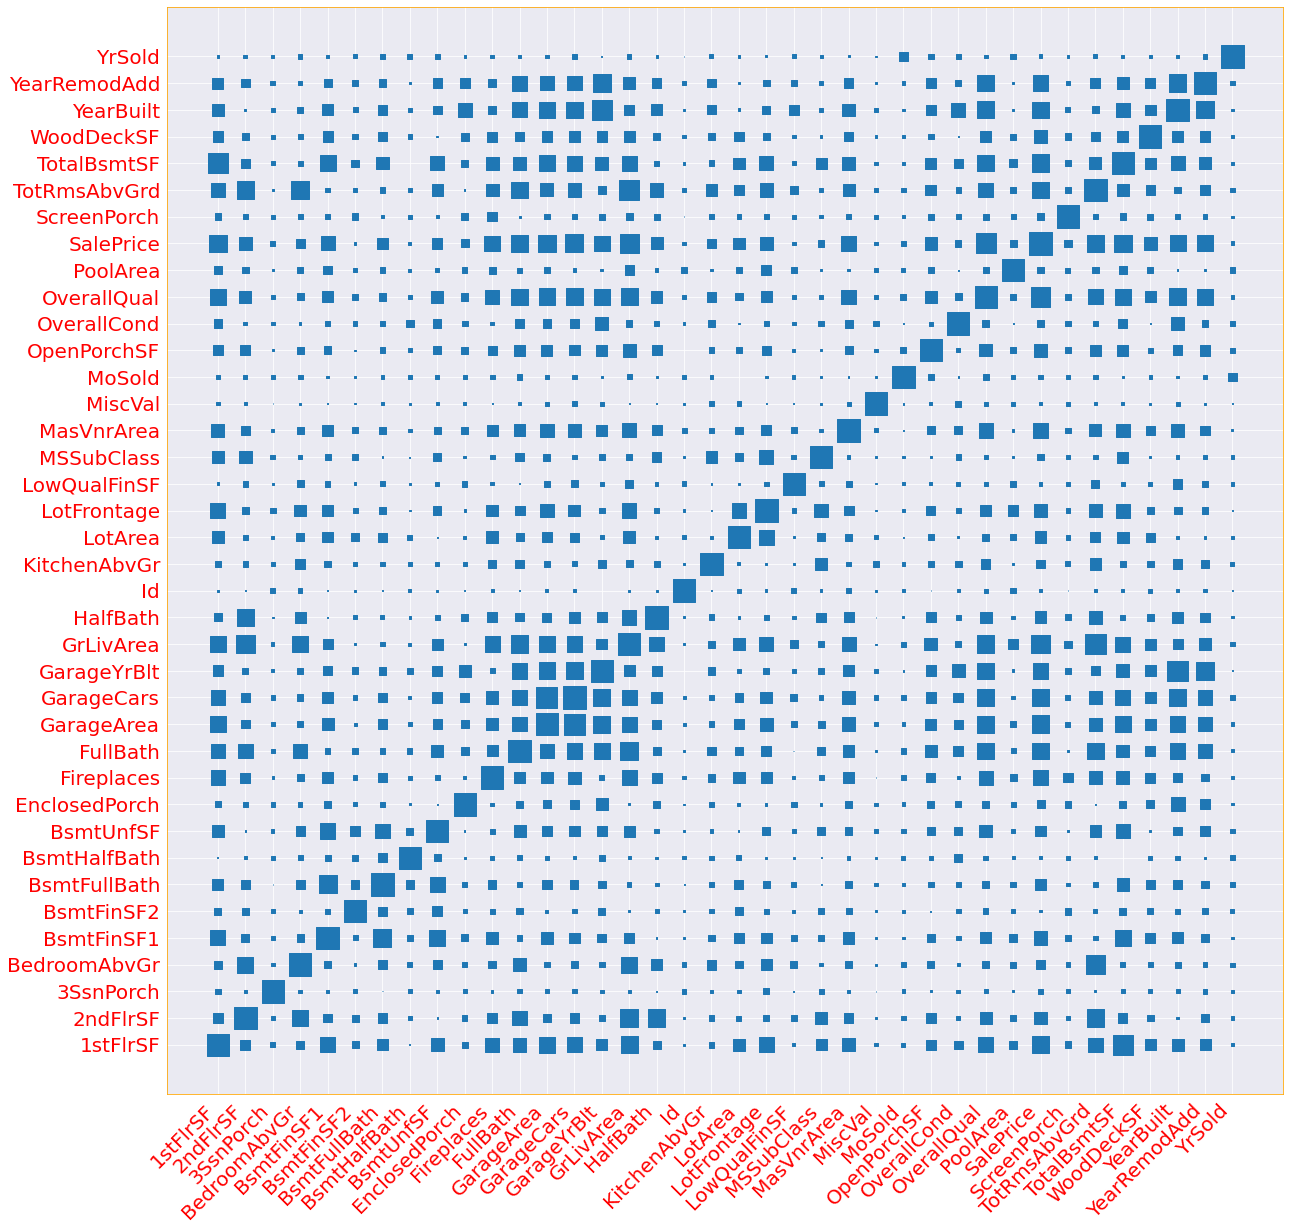

In [12]:
data_analysis.heatmap()

### POWER SCORE MATRIX
 - According to power score matrix there area a lot of variables which do not have (at least direct) correlation with sale price
 - range of correlation is from 0 to where:
  - 0  - no correlation at all
  - 1  - 100% correlation

In [0]:
pps_train  = pps.matrix(dataset_train)

In [14]:
pps_train['SalePrice'].transpose().sort_values(ascending = False)

SalePrice       1.000
FullBath        0.580
Alley           0.547
BsmtQual        0.476
ExterQual       0.474
KitchenQual     0.455
Fireplaces      0.424
Foundation      0.383
GarageFinish    0.343
GarageCars      0.332
OverallQual     0.329
HalfBath        0.250
HeatingQC       0.240
GarageType      0.230
FireplaceQu     0.196
BsmtFullBath    0.191
GrLivArea       0.190
LotShape        0.175
TotRmsAbvGrd    0.169
BsmtFinType1    0.163
MasVnrType      0.148
YearRemodAdd    0.140
YearBuilt       0.138
CentralAir      0.134
YrSold          0.133
Neighborhood    0.107
Fence           0.093
MSSubClass      0.092
HouseStyle      0.090
GarageYrBlt     0.089
Exterior2nd     0.085
BedroomAbvGr    0.084
Exterior1st     0.074
KitchenAbvGr    0.073
GarageArea      0.067
MoSold          0.055
1stFlrSF        0.040
RoofStyle       0.032
SaleType        0.026
BsmtExposure    0.023
OverallCond     0.020
TotalBsmtSF     0.016
MSZoning        0.007
Utilities       0.000
LotFrontage     0.000
LotArea   

Some of variables which Power Score calculated as not correlated at all seems to have correlation with the price of the building, therefore in this case
Power Score Matrix cannot be trusted as a guide of which variables can be droped from dataset

## VARIABLES ANALYSIS

#### SalePrice
 - Our target, value of building


<Figure size 1080x1080 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'SalePrice distribution')

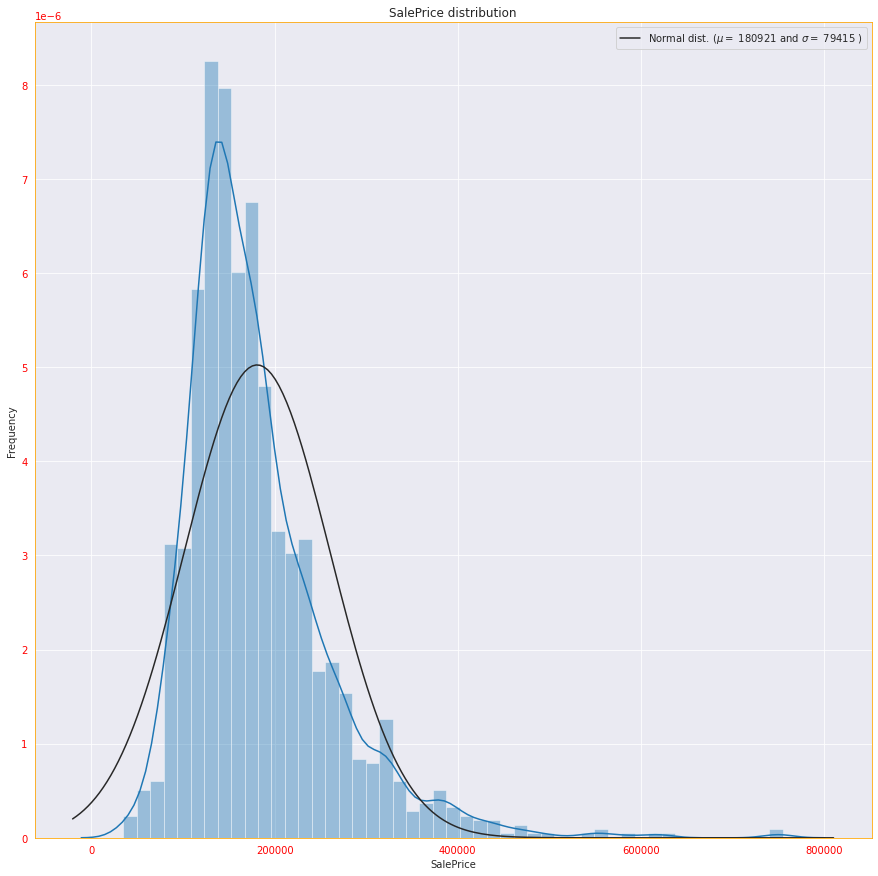

In [15]:
plt.figure(figsize=(15,15))
sns.distplot(dataset_train['SalePrice'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dataset_train['SalePrice'])
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.0f} and $\sigma=$ {:.0f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

 - Distribution of sale price is a little bit skewed to the left side in comparision to normal distribusion showed in black color.
 - Mean value is 180 000
 - Distribution is tall and thin, so most of prices are somewhere around mean value
 - There are some very expensive outliers in dataset

#### MSSubClass

MSSubClass: Identifies the type of dwelling involved in the sale.	

    20	1-STORY 1946 & NEWER ALL STYLES
    30	1-STORY 1945 & OLDER
    40	1-STORY W/FINISHED ATTIC ALL AGES
    45	1-1/2 STORY - UNFINISHED ALL AGES
    50	1-1/2 STORY FINISHED ALL AGES
    60	2-STORY 1946 & NEWER
    70	2-STORY 1945 & OLDER
    75	2-1/2 STORY ALL AGES
    80	SPLIT OR MULTI-LEVEL
    85	SPLIT FOYER
    90	DUPLEX - ALL STYLES AND AGES
    120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    150	1-1/2 STORY PUD - ALL AGES
    160	2-STORY PUD - 1946 & NEWER
    180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [0]:
analyser = DataAnalysis(dataset_train, dataset_test)
processer = DataProcessing(dataset_train, dataset_test)

In [0]:
processer.fill_with_most_common_value(column = train_columns[1])

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 56.8973 |       42.2861        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


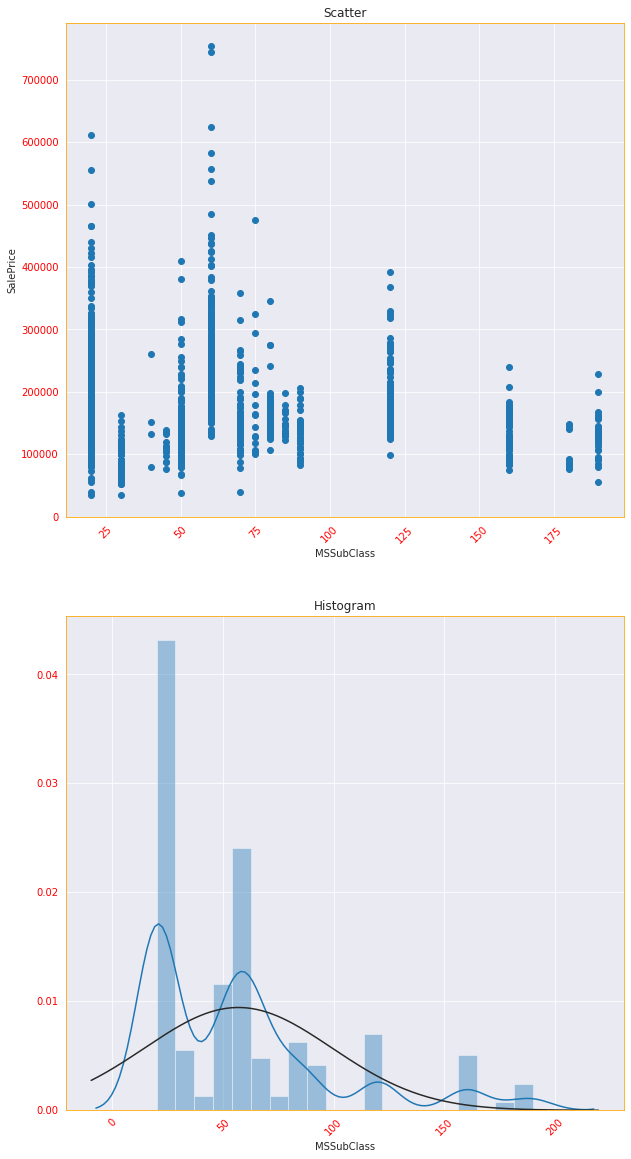

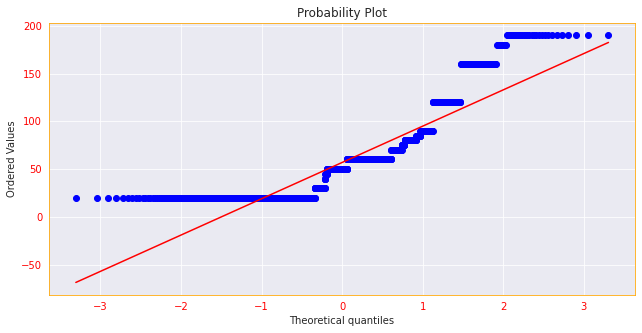

In [18]:
analyser.var_overview(var=train_columns[1], target=target)

Percentage of samples in each class

In [19]:
dataset_train[train_columns[1]].value_counts(normalize = True)

20    0.367
60    0.205
50    0.099
120   0.060
30    0.047
160   0.043
70    0.041
80    0.040
90    0.036
190   0.021
85    0.014
75    0.011
45    0.008
180   0.007
40    0.003
Name: MSSubClass, dtype: float64

 - Not normally distributed
 - It's numerical, but in fact it is a categorical variable
 - Some classes have very little or even none representation in samples

### MSZoning

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

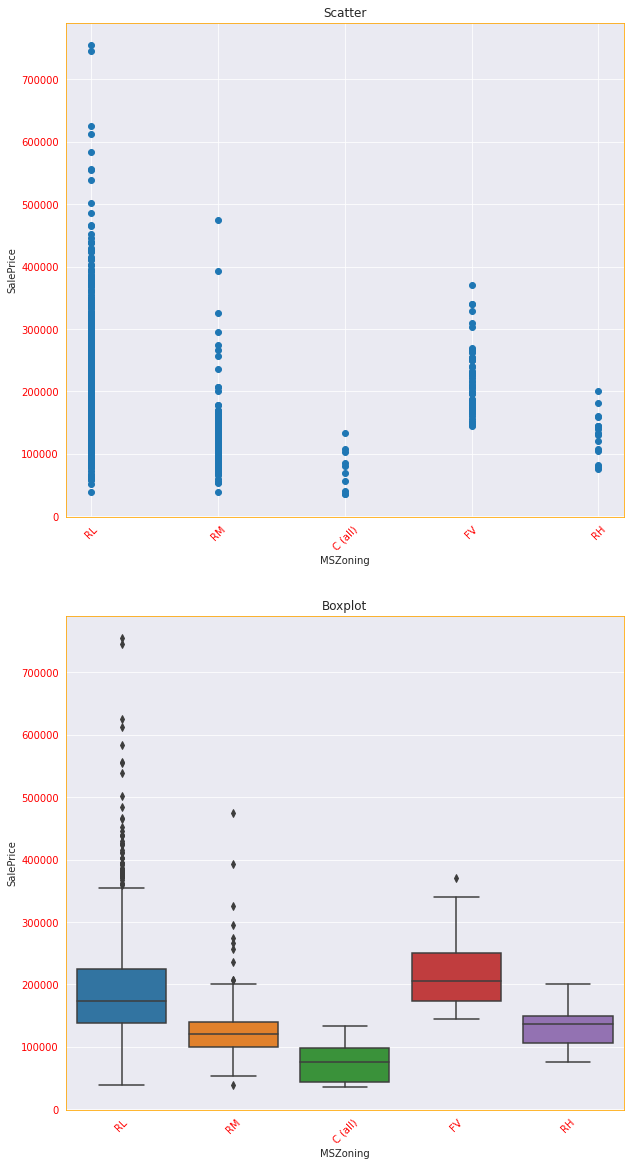

In [20]:
analyser.var_overview(var=train_columns[2], target=target)

Percentage of samples in each class

In [21]:
dataset_train[train_columns[2]].value_counts(normalize=True)

RL        0.788
RM        0.149
FV        0.045
RH        0.011
C (all)   0.007
Name: MSZoning, dtype: float64

 - There is a lot of outliers 
 - Some classes have very little or even none representation in samples
 - Almost 80% of samples have RL class

### LotFrontage

LotFrontage: Linear feet of street connected to property


In [0]:
processer.fill_with_median(train_columns[3])

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 69.8637 |       22.0201        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


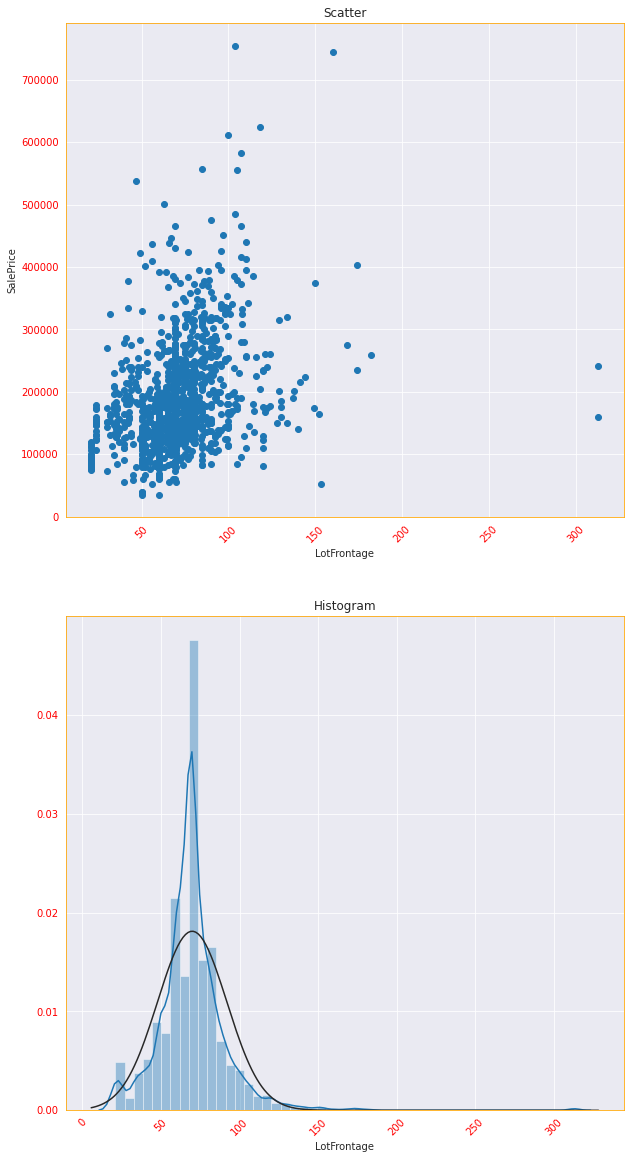

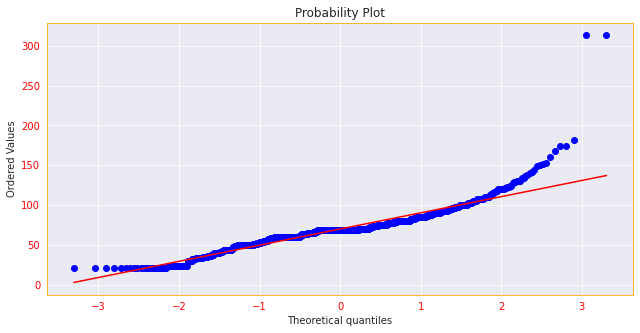

In [23]:
analyser.var_overview(var=train_columns[3], target=target)

 - LotArea distribution is very similar to normal distribution, until 2 quantile when it starts to differ very strongly

### LotArea

LotArea: Lot size in square feet

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 10516.8 |       9977.85        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


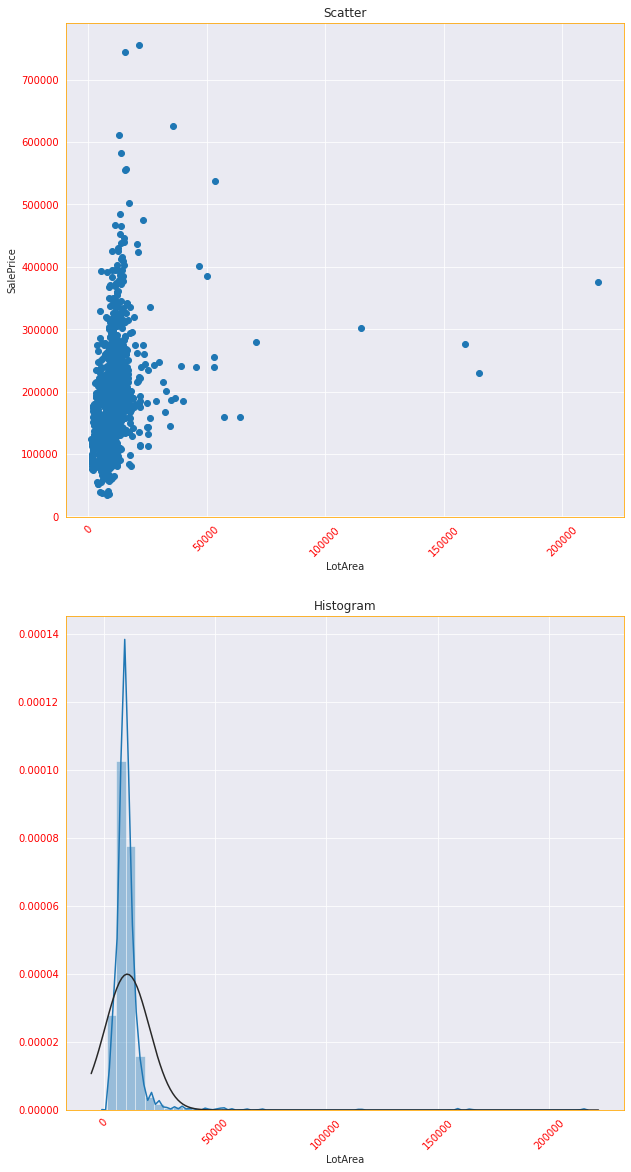

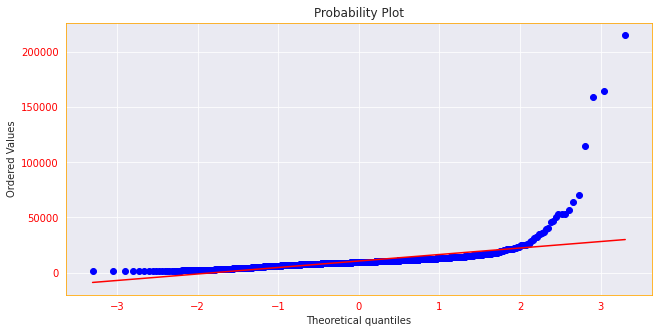

In [24]:
analyser.var_overview(var=train_columns[4], target=target)

 - LotArea distribution is very similar to normal distribution, until 2 quantile when it starts to differ very strongly
 - It looks like lot area is not strongly correlated with the price

### Street

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

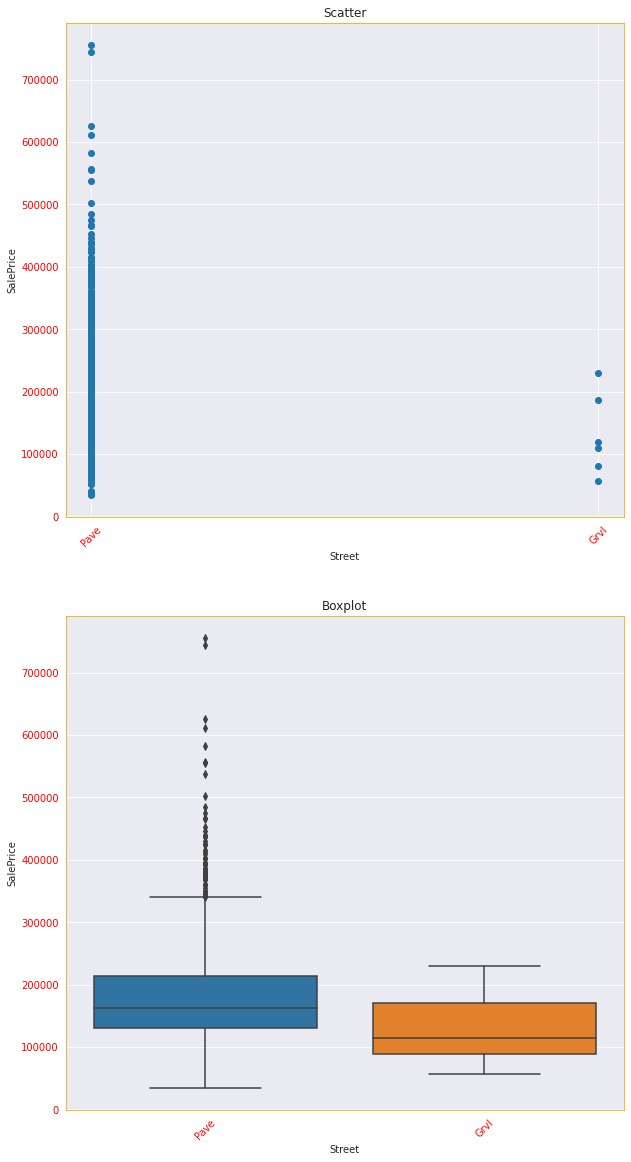

In [25]:
analyser.var_overview(var=train_columns[5], target=target)

Percentage of samples in each class

In [26]:
dataset_train[train_columns[5]].value_counts(normalize=True)

Pave   0.996
Grvl   0.004
Name: Street, dtype: float64

- Almost all samples belongs to Pave class, because of this domination droping this variable should be taken under consideration


### Alley

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [0]:
processer.fill_with(column=train_columns[6], value = 'NoAlley')

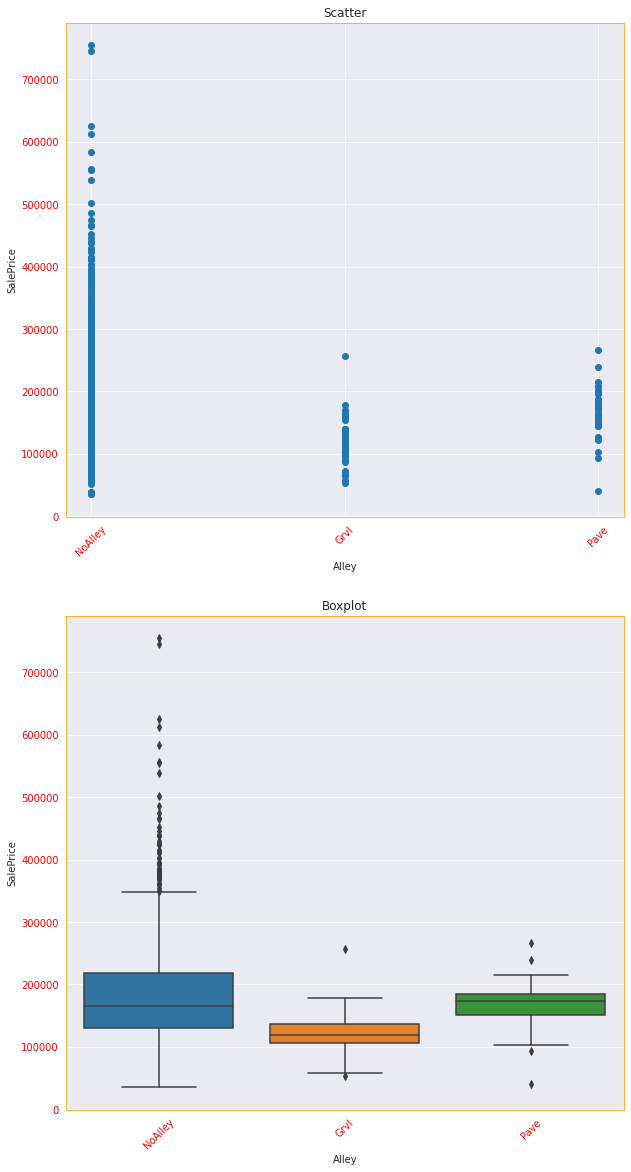

In [28]:
analyser.var_overview(var=train_columns[6], target=target)

Percentage of samples in each class



In [29]:
dataset_train[train_columns[6]].value_counts(normalize=True)

NoAlley   0.938
Grvl      0.034
Pave      0.028
Name: Alley, dtype: float64

- Almost none of samples has access to alley
- Access to alley does not look like an important factor in building price. It should be consider to drop Alley variable from dataset

### LotShape

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

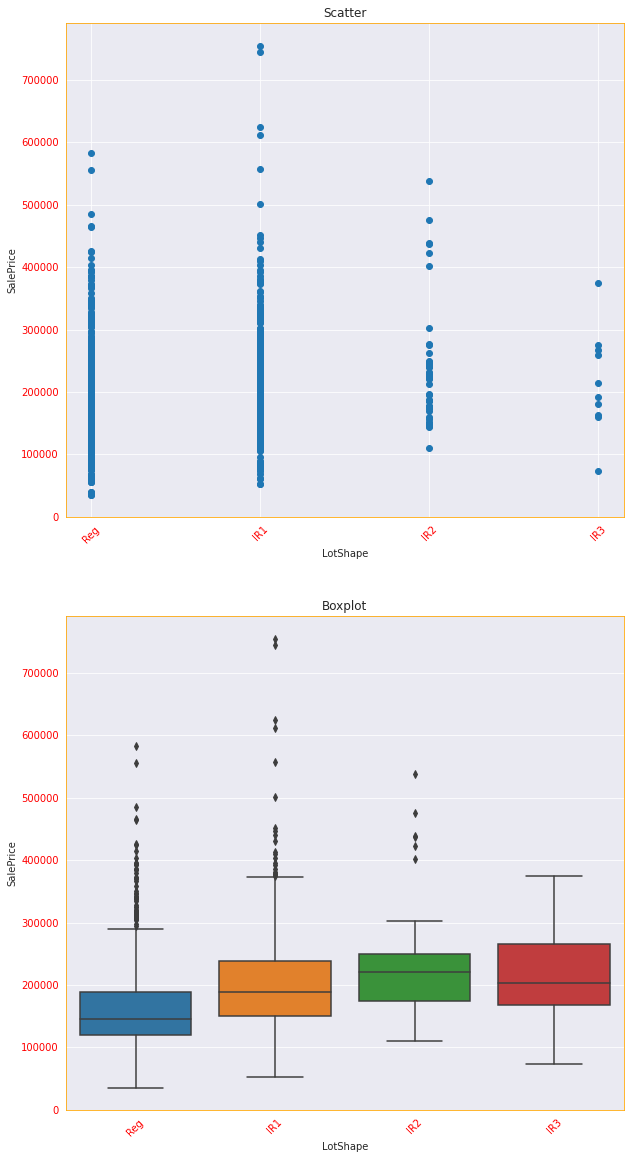

In [30]:
analyser.var_overview(var=train_columns[7], target=target)

Percentage of samples in each class

In [31]:
dataset_train[train_columns[7]].value_counts(normalize=True)

Reg   0.634
IR1   0.332
IR2   0.028
IR3   0.007
Name: LotShape, dtype: float64

- Samples dominated by Regular and Sligthly irregular classes
- There is no significant difference in price between IR1-3, It may be good idea to combine them into one class - IR

### LandContour

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

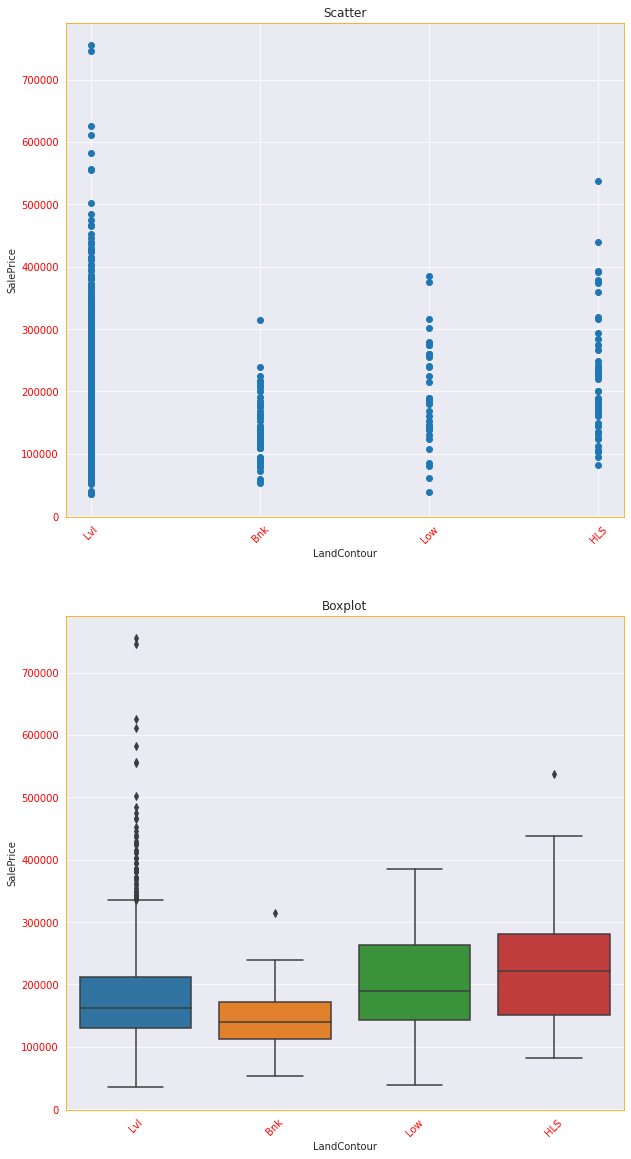

In [32]:
analyser.var_overview(var=train_columns[8], target=target)

Percentage of samples in each class

In [33]:
dataset_train[train_columns[8]].value_counts(normalize=True)

Lvl   0.898
Bnk   0.043
HLS   0.034
Low   0.025
Name: LandContour, dtype: float64

- Flat level is clearly a dominating class, but other classes are not small enough and similar enough to consider droping this variable

### Utilities

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

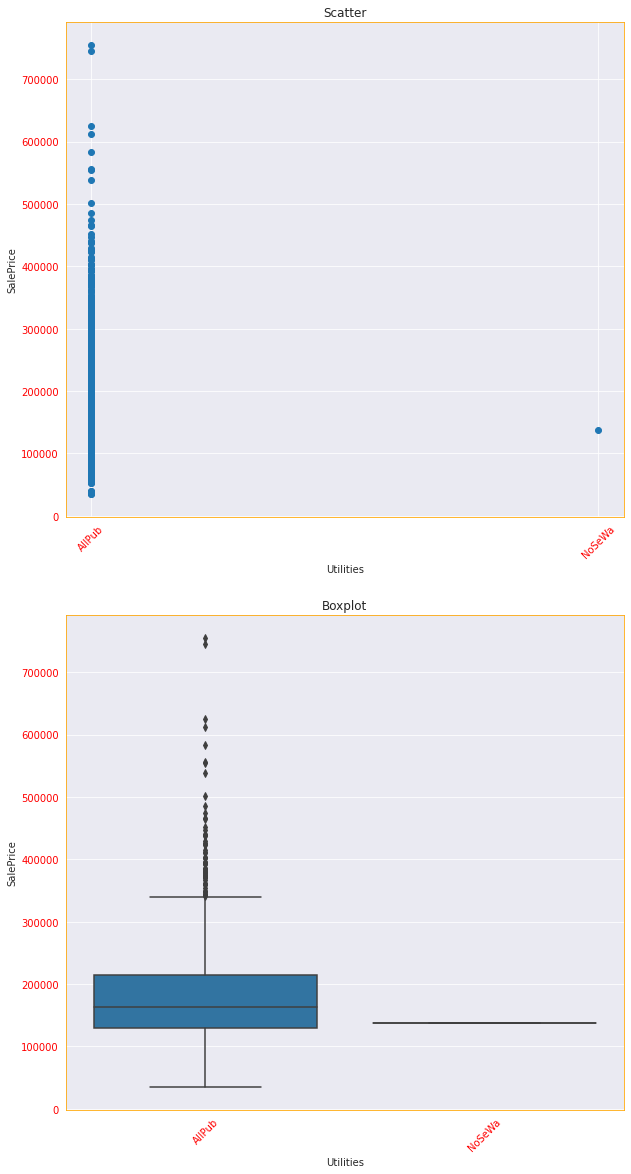

In [34]:
analyser.var_overview(var=train_columns[9], target=target)

Percentage of samples in each class

In [35]:
dataset_train[train_columns[9]].value_counts(normalize=True)

AllPub   0.999
NoSeWa   0.001
Name: Utilities, dtype: float64

- Practically all of samples has all posible utilities, therefore this variable can be droped

### LotConfig

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

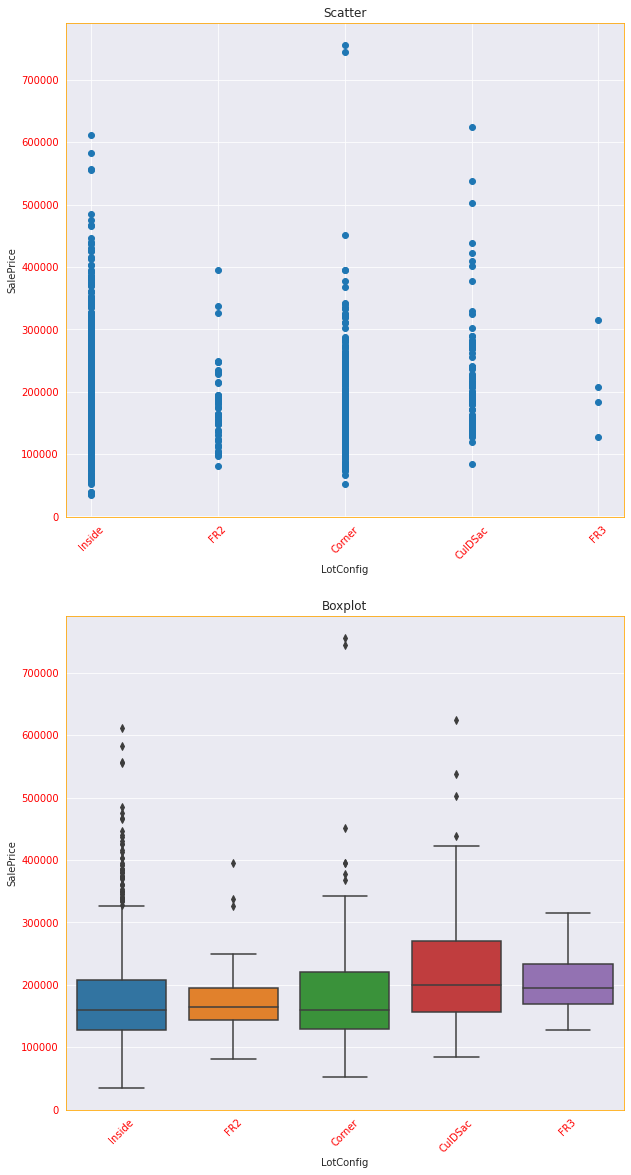

In [36]:
analyser.var_overview(var=train_columns[10], target=target)

Percentage of samples in each class

In [37]:
dataset_train[train_columns[10]].value_counts(normalize=True)

Inside    0.721
Corner    0.180
CulDSac   0.064
FR2       0.032
FR3       0.003
Name: LotConfig, dtype: float64

- FR3 is an very rare type of configuration and price of it looks similiar enough to FR2 to condifer merging these 2 classes

### LandSlope

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

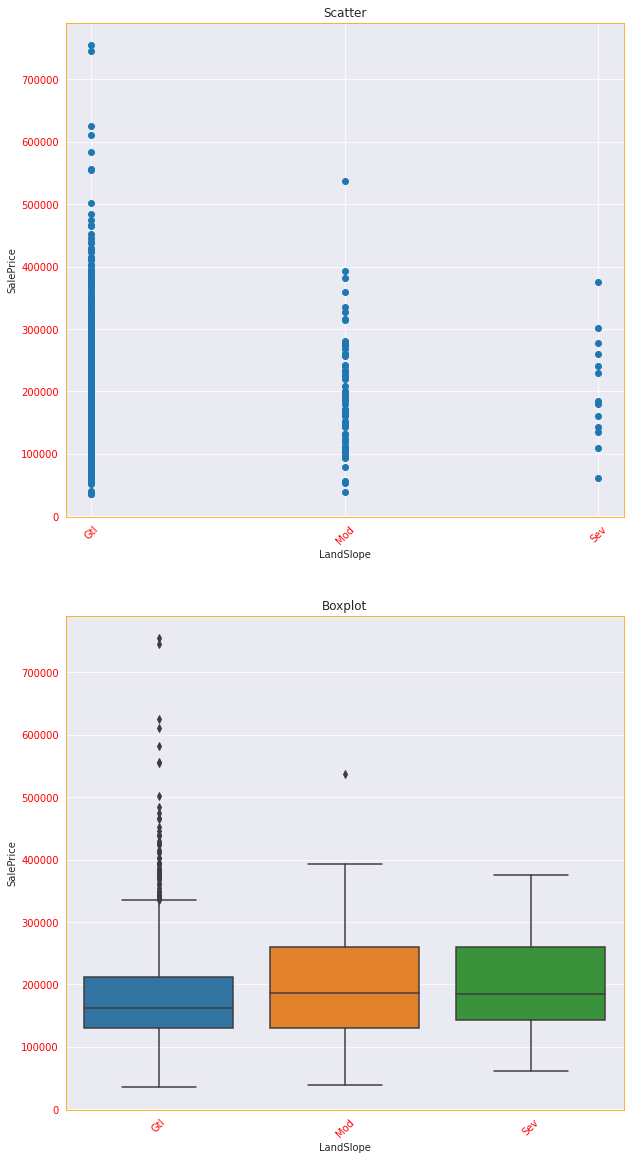

In [38]:
analyser.var_overview(var=train_columns[11], target=target)

Percentage of samples in each class

In [39]:
dataset_train[train_columns[11]].value_counts(normalize=True)

Gtl   0.947
Mod   0.045
Sev   0.009
Name: LandSlope, dtype: float64

- Gentle slope is clearly a dominating class, moreover price range between classes seems to be similar. Variable can be droped from database

### Neighborhood

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

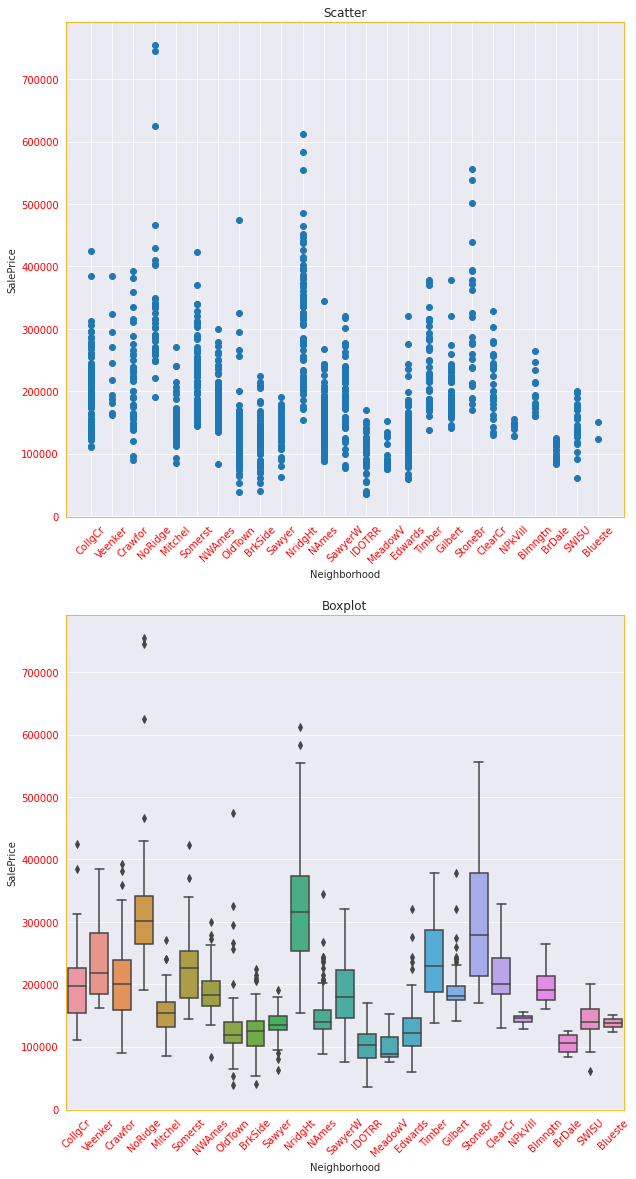

In [40]:
analyser.var_overview(var=train_columns[12], target=target)

Percentage of samples in each class

In [41]:
dataset_train[train_columns[12]].value_counts(normalize=True)

NAmes     0.154
CollgCr   0.103
OldTown   0.077
Edwards   0.068
Somerst   0.059
Gilbert   0.054
NridgHt   0.053
Sawyer    0.051
NWAmes    0.050
SawyerW   0.040
BrkSide   0.040
Crawfor   0.035
Mitchel   0.034
NoRidge   0.028
Timber    0.026
IDOTRR    0.025
ClearCr   0.019
SWISU     0.017
StoneBr   0.017
MeadowV   0.012
Blmngtn   0.012
BrDale    0.011
Veenker   0.008
NPkVill   0.006
Blueste   0.001
Name: Neighborhood, dtype: float64

- There is a lot of classes and they are strongly differ from each other, some of them are very rare, but it can be hard to transform or merge them in order to reduce complexity of this variable without losing information

### Condition1

Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

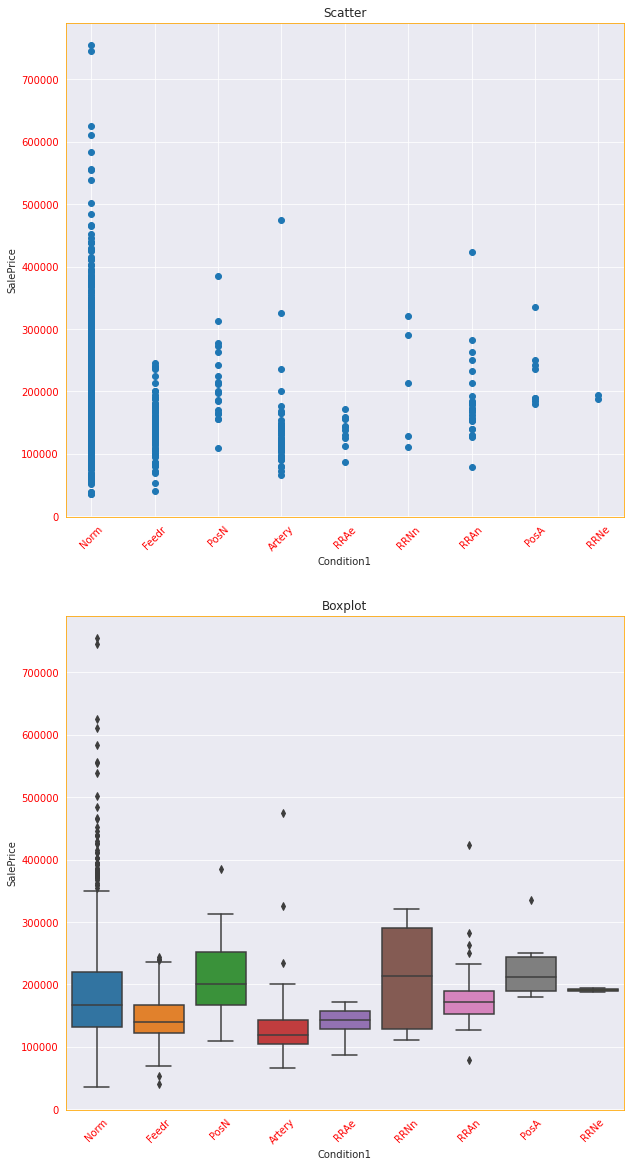

In [42]:
analyser.var_overview(var=train_columns[13], target=target)

Percentage of samples in each class

In [43]:
dataset_train[train_columns[13]].value_counts(normalize=True)

Norm     0.863
Feedr    0.055
Artery   0.033
RRAn     0.018
PosN     0.013
RRAe     0.008
PosA     0.005
RRNn     0.003
RRNe     0.001
Name: Condition1, dtype: float64

- There is a couple of very rare classes, it is hard to tell if they can be merged with other most similar class in order to simplify variable
- Comparing pair RRNe/RRAe to RRNn/RRAe which is more common it seems that prices of builing is similar for buildings near railroads, maybe one class for all buildings near railroads is a good idea

### Condition2

Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

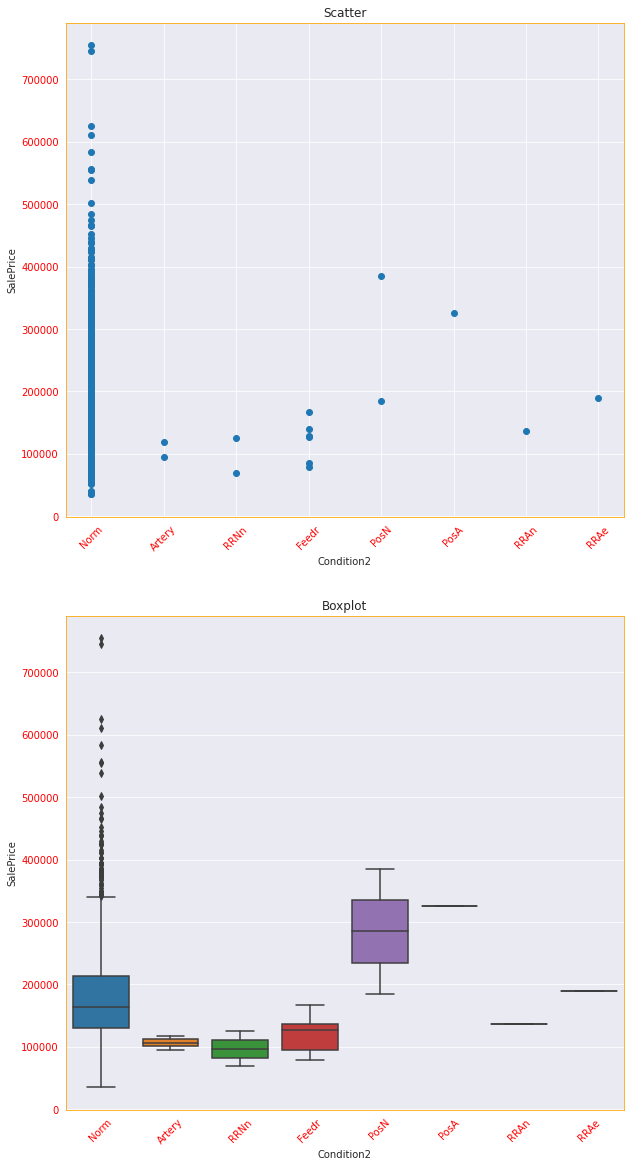

In [44]:
analyser.var_overview(var=train_columns[14], target=target)

Percentage of samples in each class

In [45]:
dataset_train[train_columns[14]].value_counts(normalize=True)

Norm     0.990
Feedr    0.004
Artery   0.001
RRNn     0.001
PosN     0.001
RRAe     0.001
RRAn     0.001
PosA     0.001
Name: Condition2, dtype: float64

- 99% of buildings have not second condition, therefore this variable can be droped from dataset

### BldgType

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

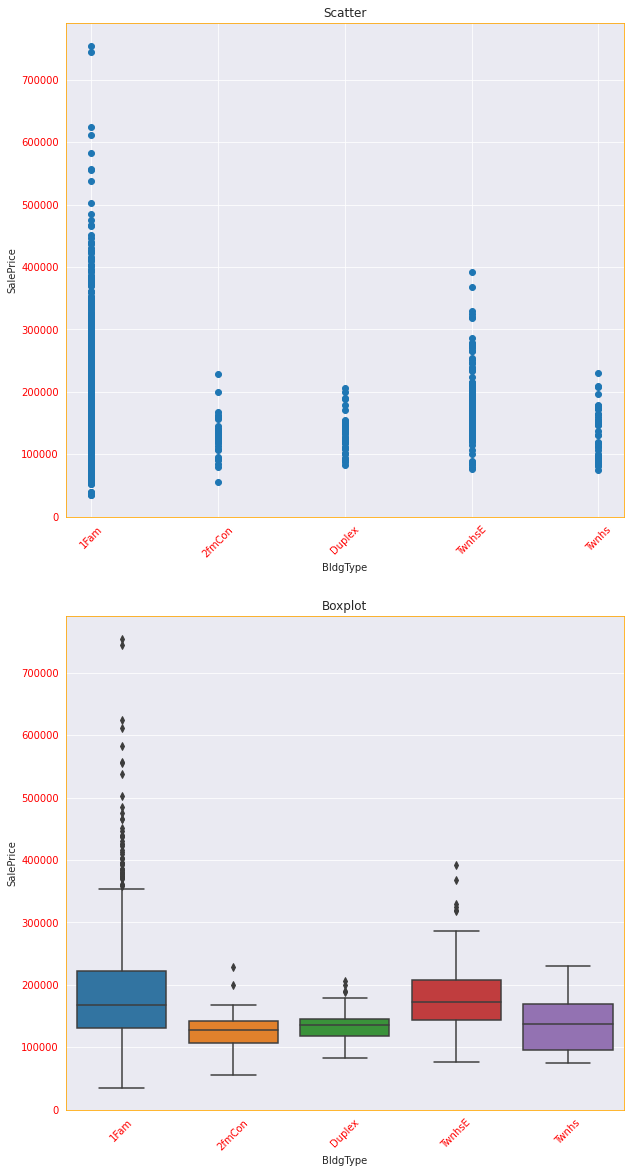

In [46]:
analyser.var_overview(var=train_columns[15], target=target)

Percentage of samples in each class

In [47]:
dataset_train[train_columns[15]].value_counts(normalize=True)

1Fam     0.836
TwnhsE   0.078
Duplex   0.036
Twnhs    0.029
2fmCon   0.021
Name: BldgType, dtype: float64

- Single-family houses are dominating in this dataset, but rest of types is not small enough to be consider as irrelevant

### HouseStyle

HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

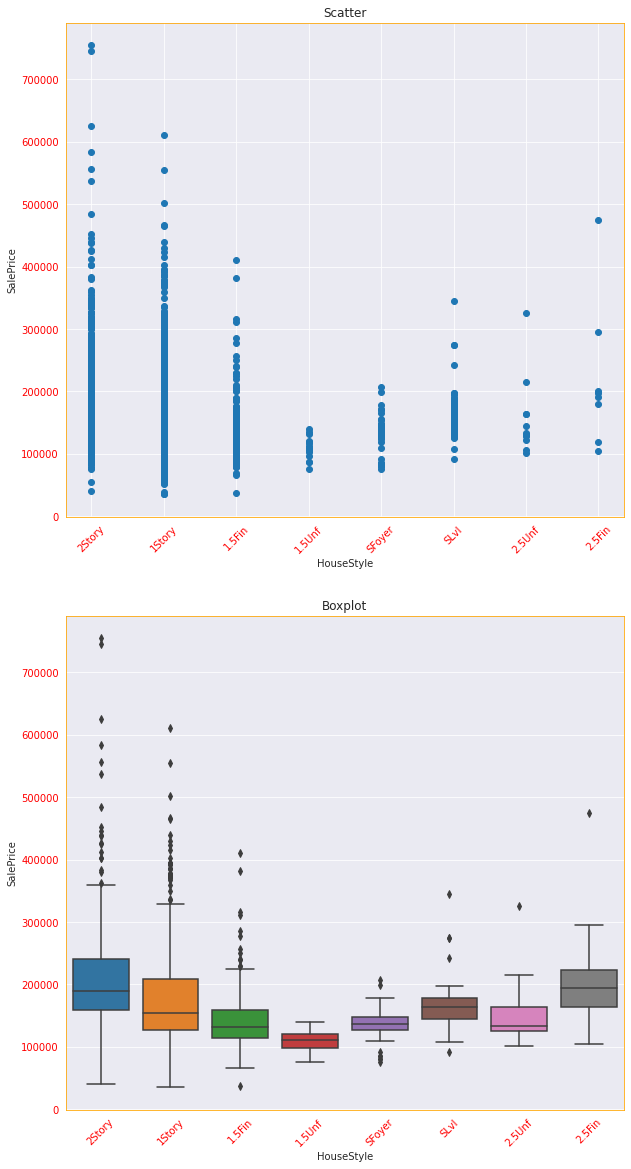

In [48]:
analyser.var_overview(var=train_columns[16], target=target)

Percentage of samples in each class

In [49]:
dataset_train[train_columns[16]].value_counts(normalize=True)

1Story   0.497
2Story   0.305
1.5Fin   0.105
SLvl     0.045
SFoyer   0.025
1.5Unf   0.010
2.5Unf   0.008
2.5Fin   0.005
Name: HouseStyle, dtype: float64

 - There is no class which overwhelmingly dominates the rest, some of class are very rare.
 - Generally there are visible differences between price in various classes, therefore it should be a good estimate of a price

### OverallQual

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 6.09932 |       1.38252        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


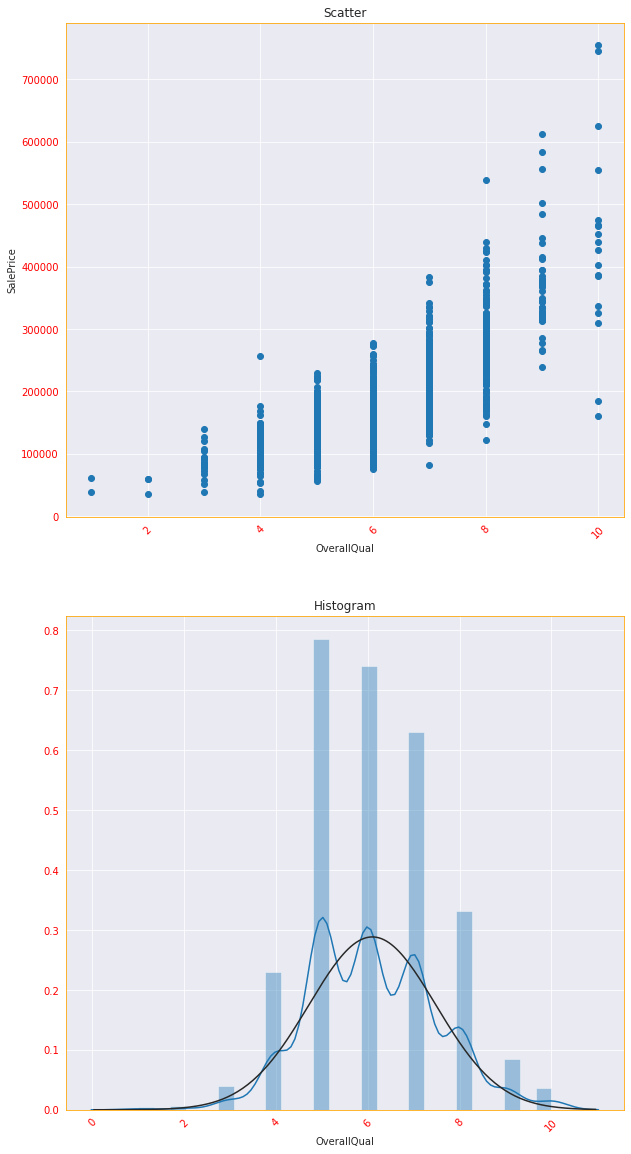

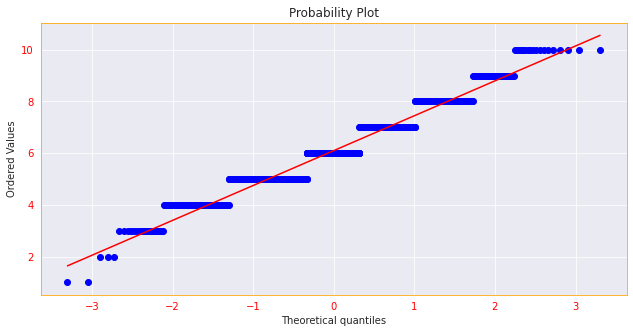

In [50]:
analyser.var_overview(var=train_columns[17], target=target)

Percentage of samples in each class

In [51]:
dataset_train[train_columns[17]].value_counts(normalize=True)

5    0.272
6    0.256
7    0.218
8    0.115
4    0.079
9    0.029
3    0.014
10   0.012
2    0.002
1    0.001
Name: OverallQual, dtype: float64

- There is a clear Correlation between Quality of a building and it's price
- Most of buildings quality of finish is around above average

### OverallCond

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 5.57534 |       1.11242        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


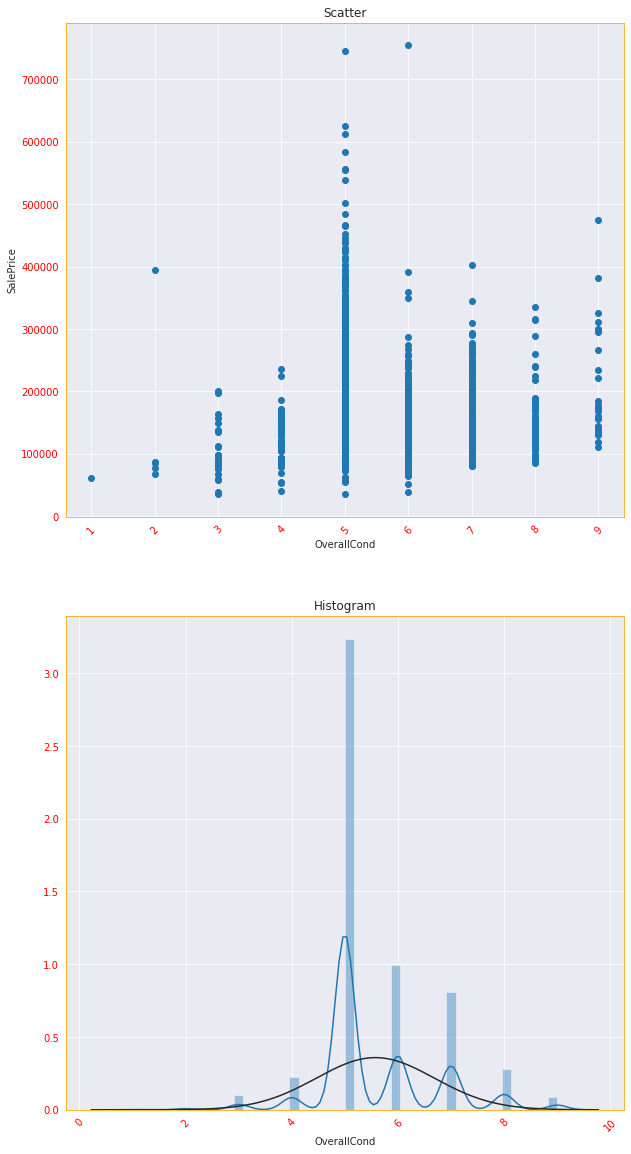

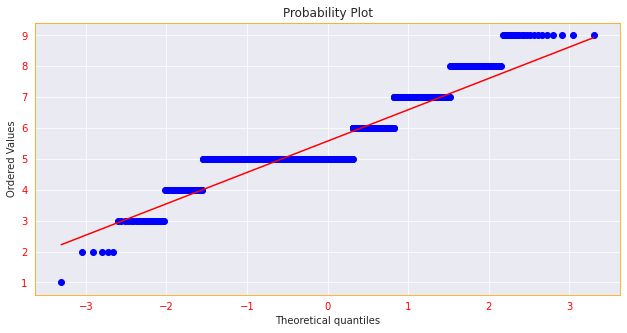

In [52]:
analyser.var_overview(var=train_columns[18], target=target)

Percentage of samples in each class

In [53]:
dataset_train[train_columns[18]].value_counts(normalize=True)

5   0.562
6   0.173
7   0.140
8   0.049
4   0.039
3   0.017
9   0.015
2   0.003
1   0.001
Name: OverallCond, dtype: float64

 - Over half of sample buildings are in average condition, there are very little number of buildings in condition below average and numerous number above average
 - What is interesting, better condition than average does not seems to have a strong impact on house price 

### YearBuilt

YearBuilt: Original construction date

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 1971.27 |       30.1926        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


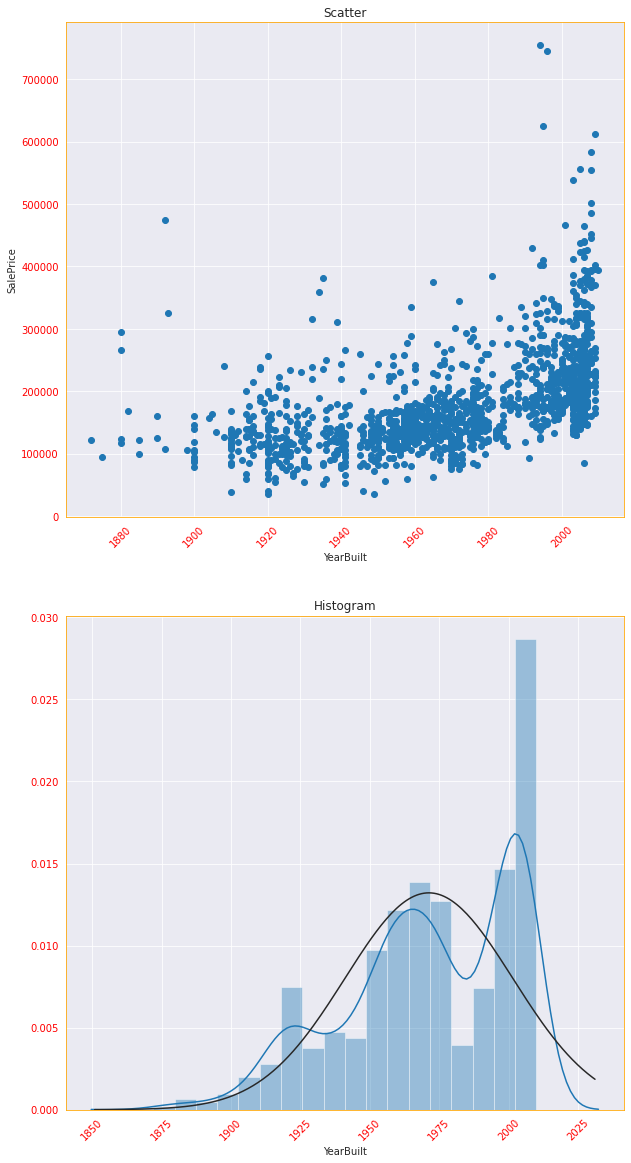

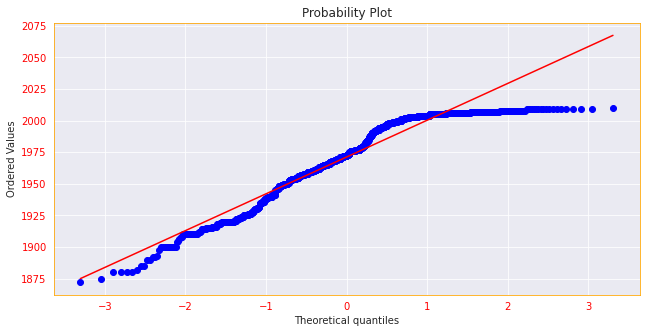

In [54]:
analyser.var_overview(var=train_columns[19], target=target)

- It looks like Price is higher for comparatively new buildings. For older buildings a specific age does not affect price too much, with few exeptions

### YearRemondAdd

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 1984.87 |       20.6383        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


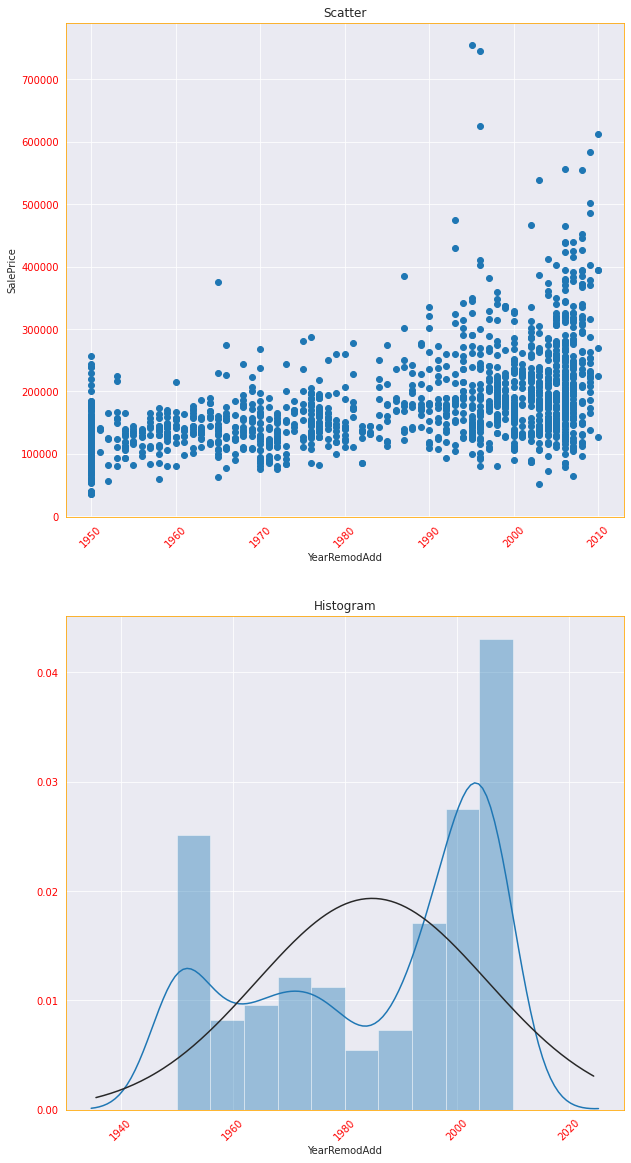

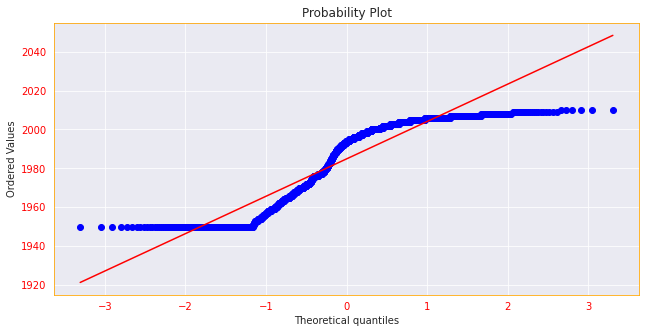

In [55]:
analyser.var_overview(var=train_columns[20], target=target)

- Similiar situation to year of built, recently renovated buildings have higher price.

### RoofStyle

RoofStyle: Type of roof

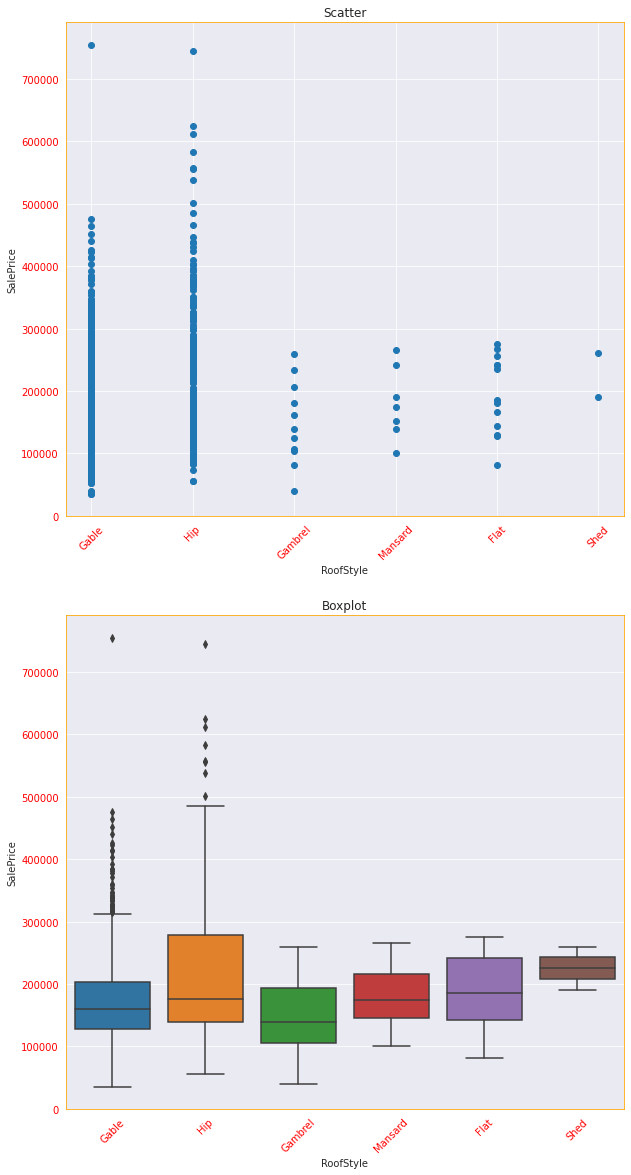

In [56]:
analyser.var_overview(var=train_columns[21], target=target)

Percentage of samples in each class

In [57]:
dataset_train[train_columns[21]].value_counts(normalize=True)

Gable     0.782
Hip       0.196
Flat      0.009
Gambrel   0.008
Mansard   0.005
Shed      0.001
Name: RoofStyle, dtype: float64

- It seems that price for Hip type roofs is higher than for other types
- It hard to tell how classes other than Gable or Hip have influence on price, because there is not enough cases to estimate

### RoofMatl

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

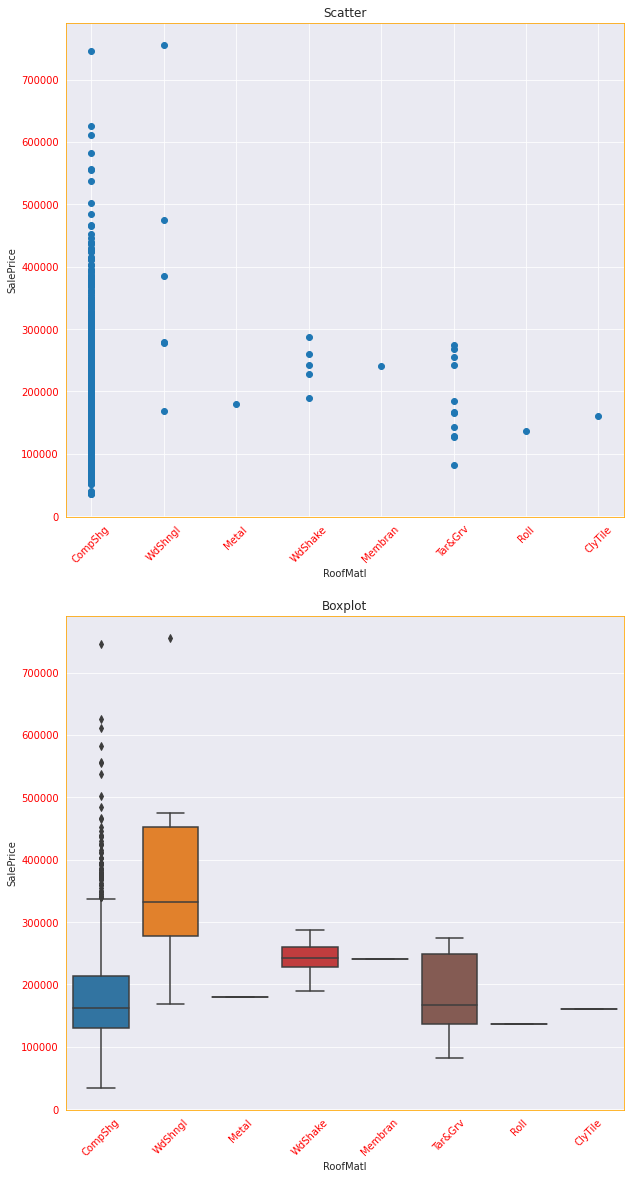

In [58]:
analyser.var_overview(var=train_columns[22], target=target)

Percentage of samples in each class

In [59]:
dataset_train[train_columns[22]].value_counts(normalize=True)

CompShg   0.982
Tar&Grv   0.008
WdShngl   0.004
WdShake   0.003
ClyTile   0.001
Roll      0.001
Membran   0.001
Metal     0.001
Name: RoofMatl, dtype: float64

- Almost all roofs are made of Standard (Composite) Shingle (98%), therefore there is no point in including this variable into prediction process

### Exterior1st

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

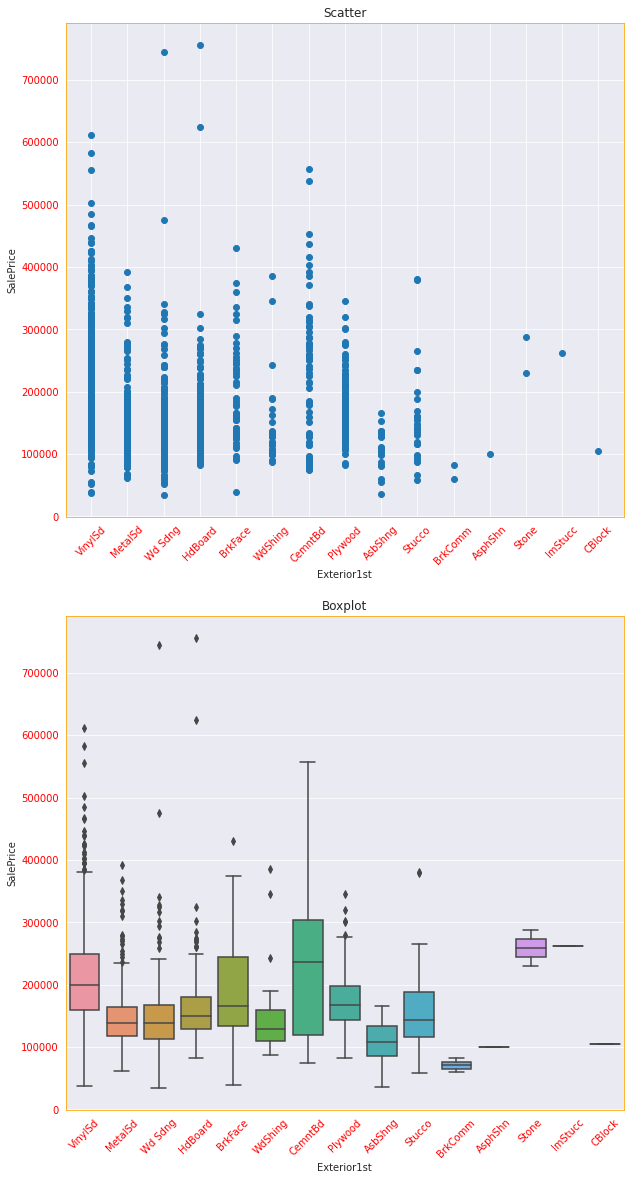

In [60]:
analyser.var_overview(var=train_columns[23], target=target)

Percentage of samples in each class

In [61]:
dataset_train[train_columns[23]].value_counts(normalize=True)

VinylSd   0.353
HdBoard   0.152
MetalSd   0.151
Wd Sdng   0.141
Plywood   0.074
CemntBd   0.042
BrkFace   0.034
WdShing   0.018
Stucco    0.017
AsbShng   0.014
BrkComm   0.001
Stone     0.001
CBlock    0.001
AsphShn   0.001
ImStucc   0.001
Name: Exterior1st, dtype: float64

- There are some classes which are extremely rare and have no value to estimate price, but it is hard for me to tell right now if it would be better to get rid of them or not (need to see results with and without them)

### Exterior2nd

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

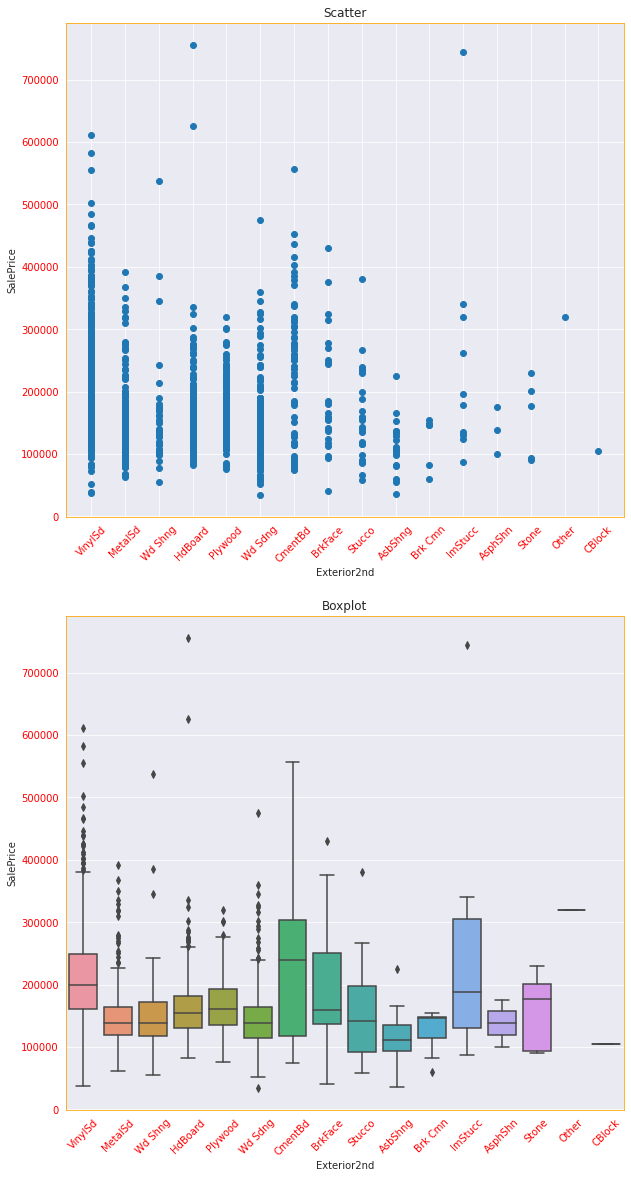

In [62]:
analyser.var_overview(var=train_columns[24], target=target)

Percentage of samples in each class

In [63]:
dataset_train[train_columns[24]].value_counts(normalize=True)

VinylSd   0.345
MetalSd   0.147
HdBoard   0.142
Wd Sdng   0.135
Plywood   0.097
CmentBd   0.041
Wd Shng   0.026
Stucco    0.018
BrkFace   0.017
AsbShng   0.014
ImStucc   0.007
Brk Cmn   0.005
Stone     0.003
AsphShn   0.002
CBlock    0.001
Other     0.001
Name: Exterior2nd, dtype: float64

 - Similar to Exterior1st

### MasVnrType

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [0]:
processer.fill_with_most_common_value(train_columns[25])

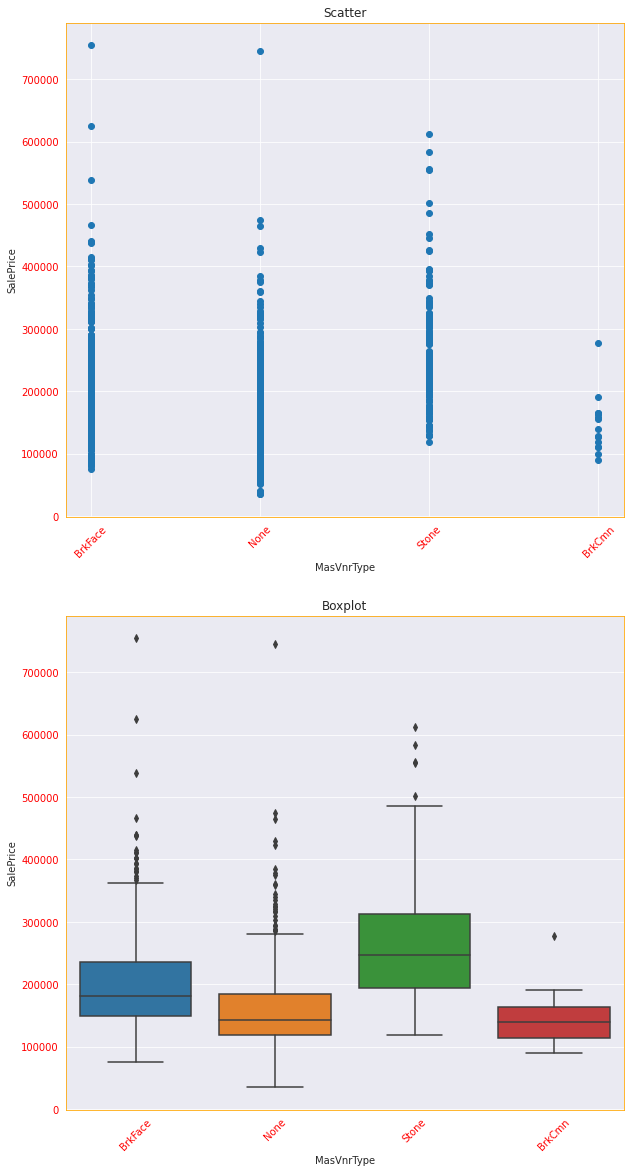

In [65]:
analyser.var_overview(var=train_columns[25], target=target)

Percentage of samples in each class

In [66]:
dataset_train[train_columns[25]].value_counts(normalize=True)

None      0.597
BrkFace   0.305
Stone     0.088
BrkCmn    0.010
Name: MasVnrType, dtype: float64

- It looks like Masonry veneer type does not affect house price in significant way

### MasVnrArea

MasVnrArea: Masonry veneer area in square feet

In [0]:
processer.fill_with_median(column=train_columns[26])

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 103.117 |       180.669        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


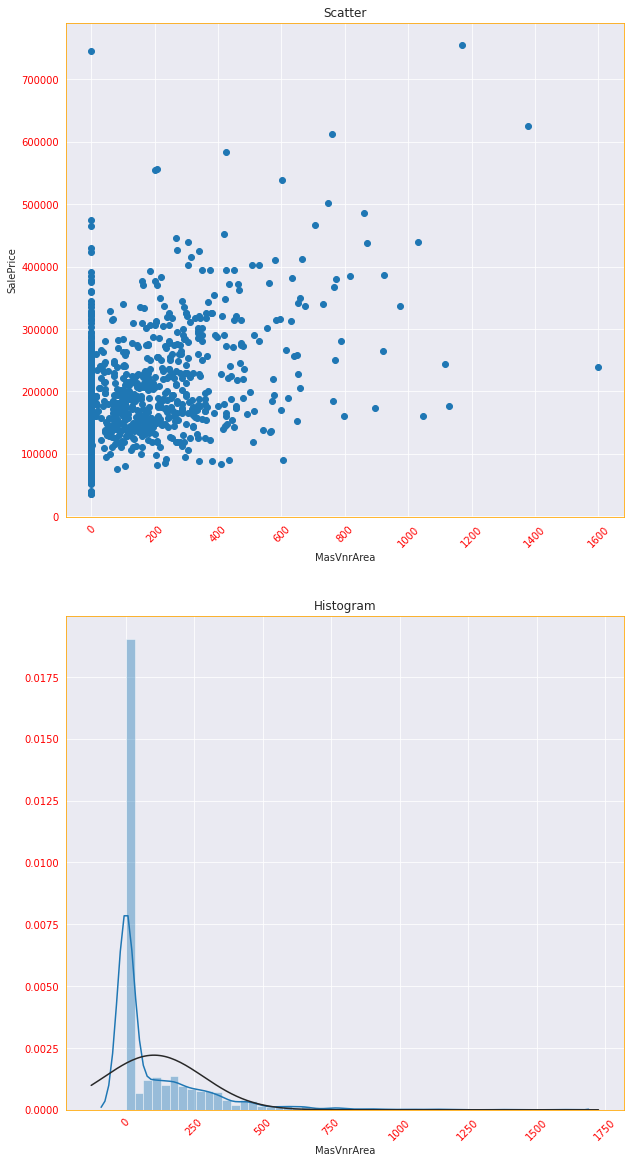

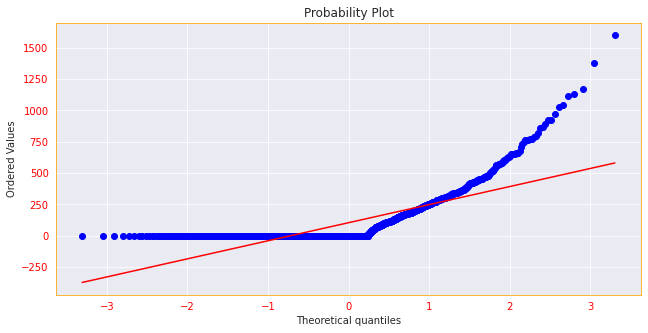

In [68]:
analyser.var_overview(var=train_columns[26], target=target)

 - It looks like Masonry veneer area does not have any correlation with house price

### ExterQual

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		

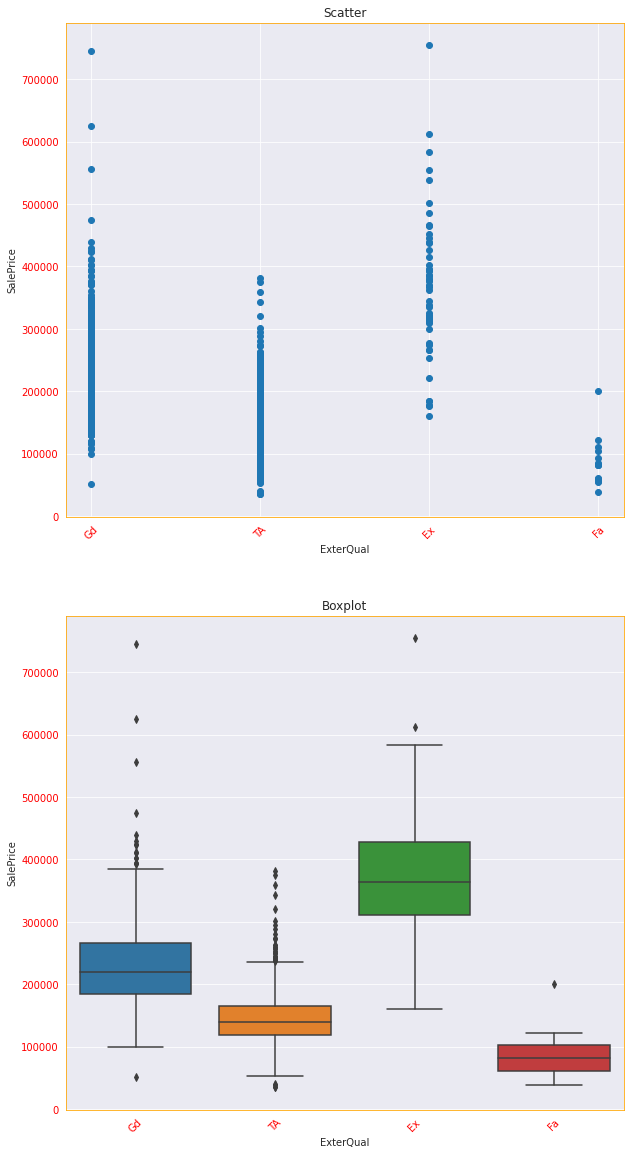

In [69]:
analyser.var_overview(var=train_columns[27], target=target)

Percentage of samples in each class

In [70]:
dataset_train[train_columns[27]].value_counts(normalize=True)

TA   0.621
Gd   0.334
Ex   0.036
Fa   0.010
Name: ExterQual, dtype: float64

- Exterior material quality have significant influence on house price
- In train dataset there is no houses with poor quality

### ExterCond

ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

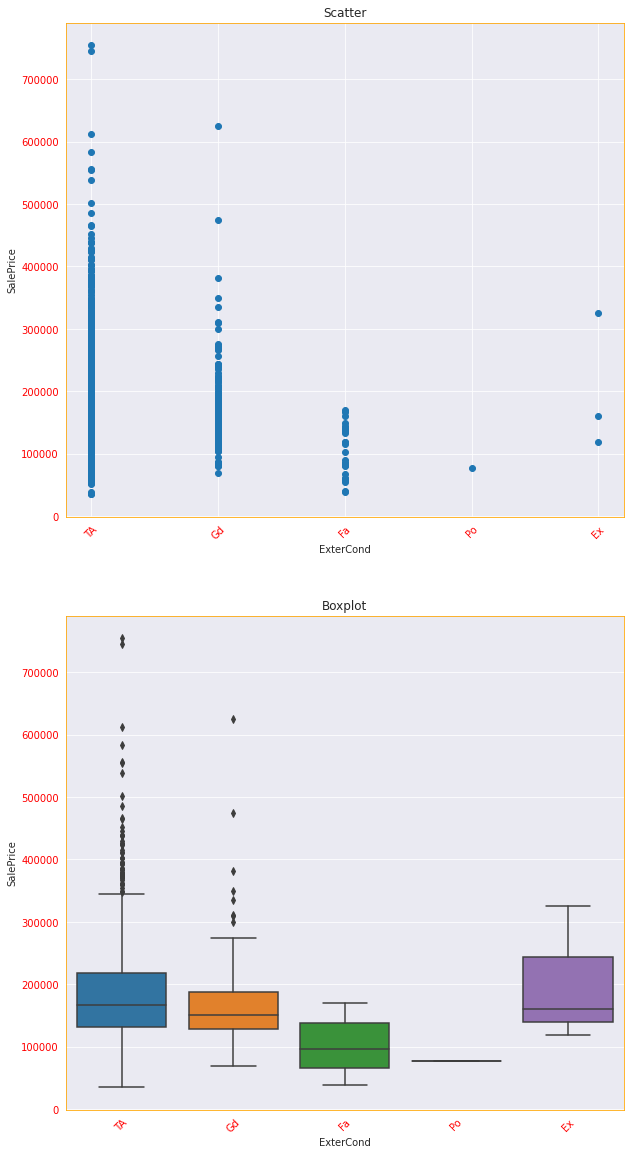

In [71]:
analyser.var_overview(var=train_columns[28], target=target)

Percentage of samples in each class

In [72]:
dataset_train[train_columns[28]].value_counts(normalize=True)

TA   0.878
Gd   0.100
Fa   0.019
Ex   0.002
Po   0.001
Name: ExterCond, dtype: float64

- in most of the cases external material is in average or good condition
- Correlation between external materials condition and house price seems to be small

### Foundation

Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood


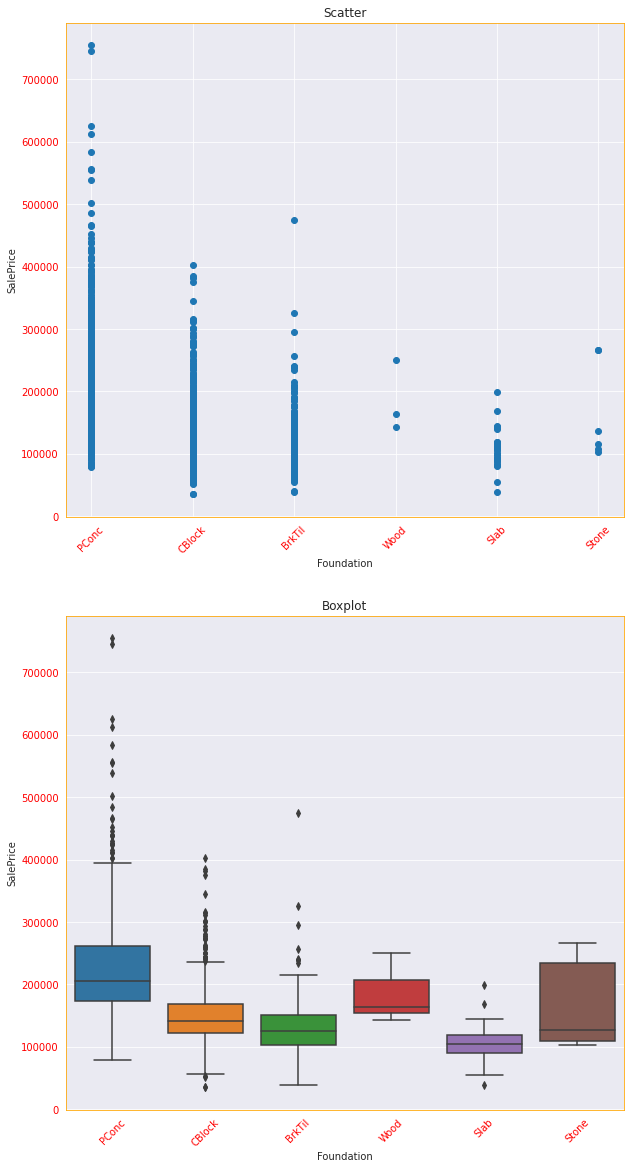

In [73]:
analyser.var_overview(var=train_columns[29], target=target)

Percentage of samples in each class

In [74]:
dataset_train[train_columns[29]].value_counts(normalize=True)

PConc    0.443
CBlock   0.434
BrkTil   0.100
Slab     0.016
Stone    0.004
Wood     0.002
Name: Foundation, dtype: float64

- There are two dominating types of foundations, poured concrete and cinder block
- despite the fact that poured concrete is a common type, it looks like most of expensive houses have foundation made of this material

### BsmtQual

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches )
       NA	No Basement

In [0]:
processer.fill_with(column=train_columns[30], value= 'none')

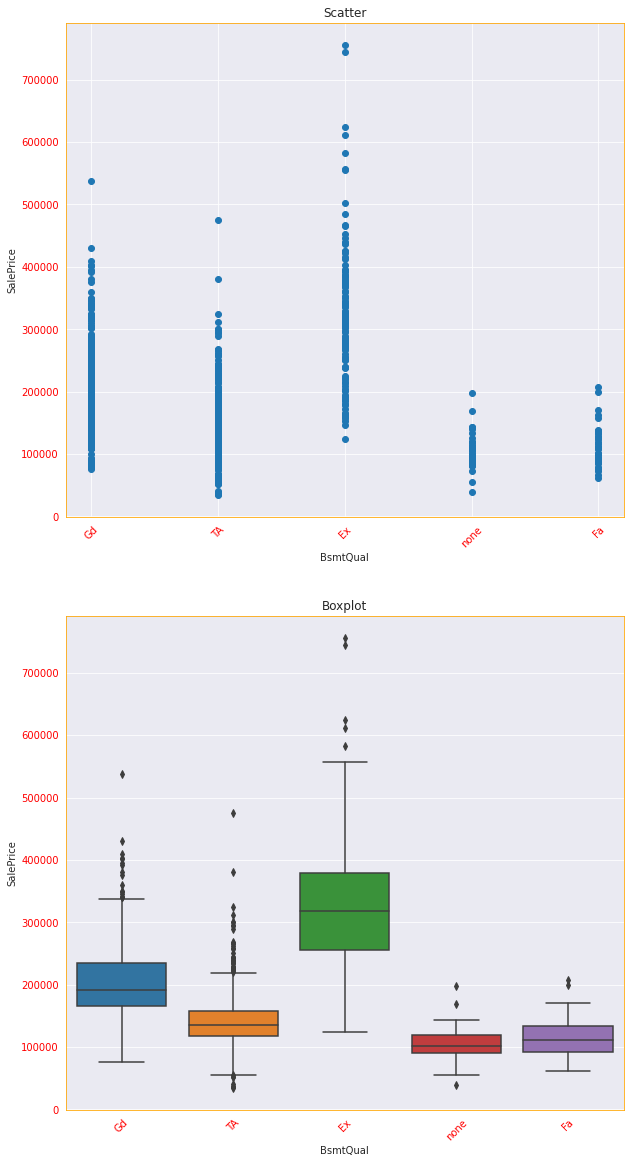

In [76]:
analyser.var_overview(var=train_columns[30], target=target)

Percentage of samples in each class

In [77]:
dataset_train[train_columns[30]].value_counts(normalize=True)

TA     0.445
Gd     0.423
Ex     0.083
none   0.025
Fa     0.024
Name: BsmtQual, dtype: float64

- Most basement have a high between 80-99 inches
- It looks like houses with high basement are more luxury ones and therefore more expensive

### BsmtCond

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [0]:
processer.fill_with(column=train_columns[31], value= 'none')

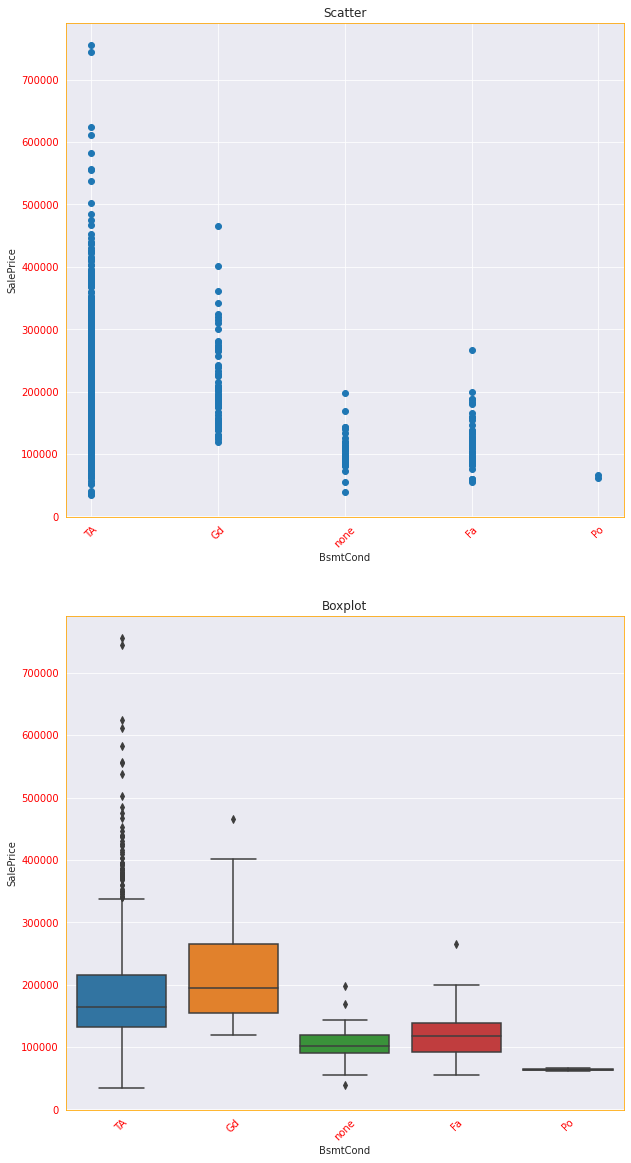

In [79]:
analyser.var_overview(var=train_columns[31], target=target)

Percentage of samples in each class

In [80]:
dataset_train[train_columns[31]].value_counts(normalize=True)

TA     0.898
Gd     0.045
Fa     0.031
none   0.025
Po     0.001
Name: BsmtCond, dtype: float64

- Most basements are in typical condition or better
- There are almost none basements in poor condition and 0 in excellent

### BsmtExposure

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [0]:
processer.fill_with(column=train_columns[32], value= 'none')

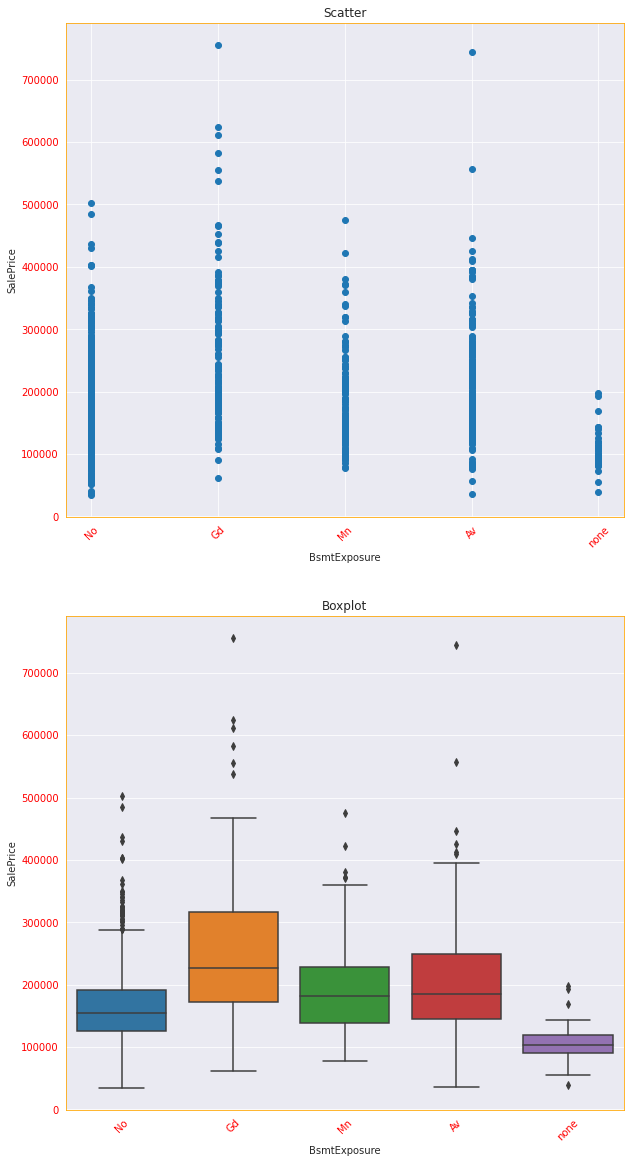

In [82]:
analyser.var_overview(var=train_columns[32], target=target)

Percentage of samples in each class

In [83]:
dataset_train[train_columns[32]].value_counts(normalize=True)

No     0.653
Av     0.151
Gd     0.092
Mn     0.078
none   0.026
Name: BsmtExposure, dtype: float64

- Most of basements have no exposure
- Basements with exposure are more expensive

### BsmtFinType1

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [0]:
processer.fill_with(column=train_columns[33], value= 'none')

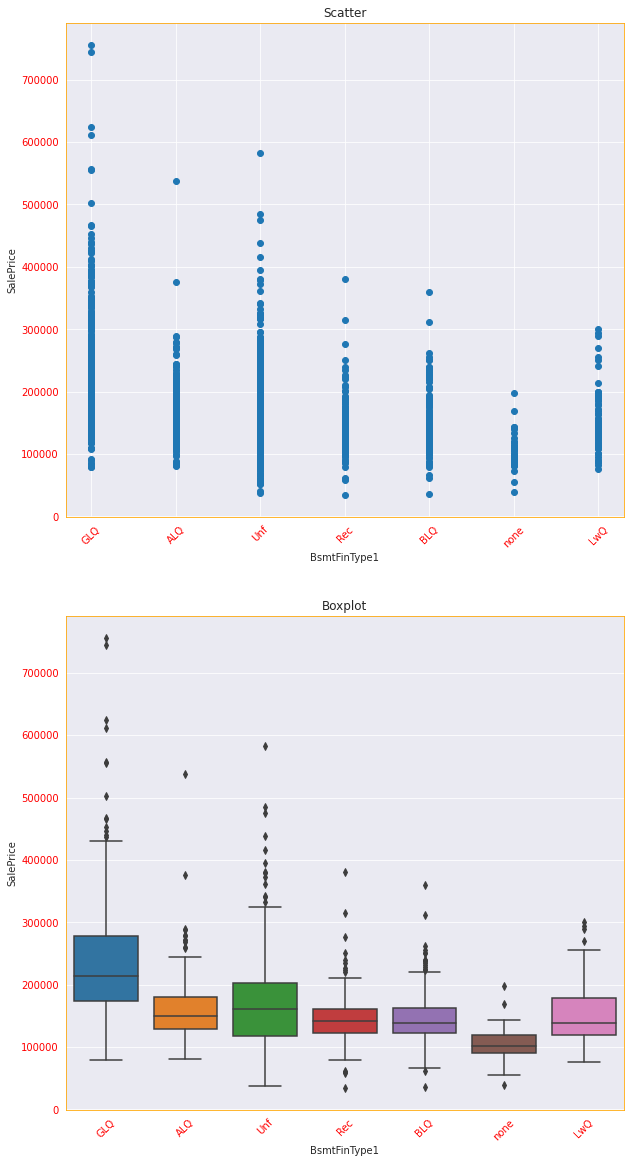

In [85]:
analyser.var_overview(var=train_columns[33], target=target)

Percentage of samples in each class

In [86]:
dataset_train[train_columns[33]].value_counts(normalize=True)

Unf    0.295
GLQ    0.286
ALQ    0.151
BLQ    0.101
Rec    0.091
LwQ    0.051
none   0.025
Name: BsmtFinType1, dtype: float64

- It seems that basements with good quality finish are more vaulable than others. There are some expensive unfinished basements, probably good quality unfinished

### BsmtFinSF1

BsmtFinSF1: Type 1 finished square feet

+----------+--------+----------------------+
| DATA     |  MEAN  |  STANDARD DEVIATION  |
+==========+========+======================+
| Variable | 443.64 |       455.942        |
+----------+--------+----------------------+
| Target   | 180921 |       79415.3        |
+----------+--------+----------------------+


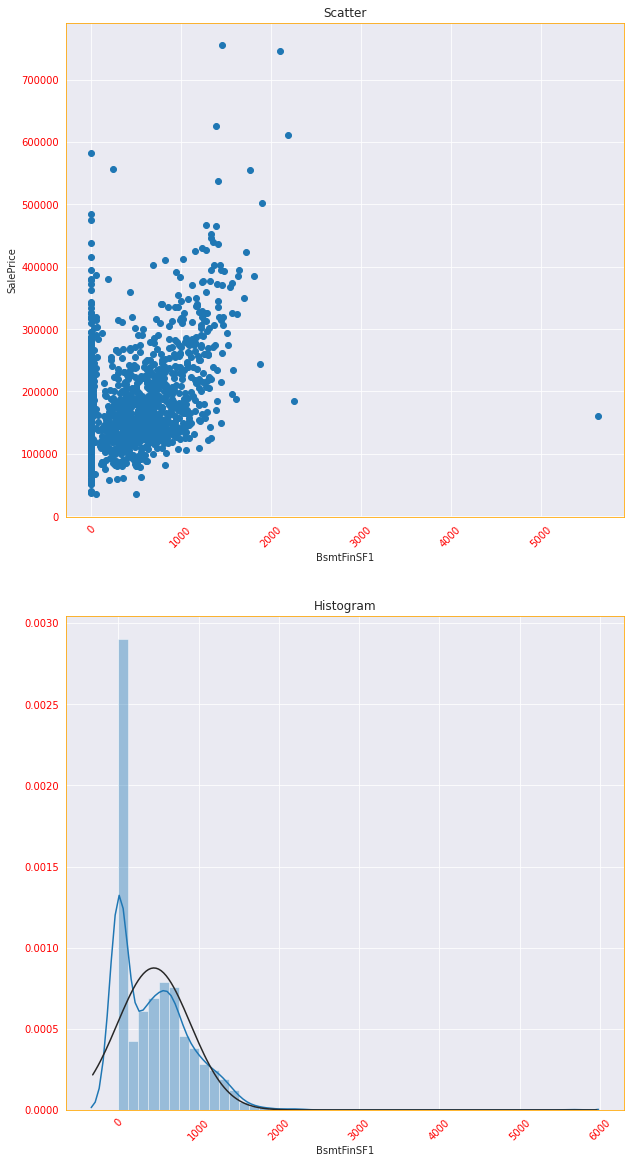

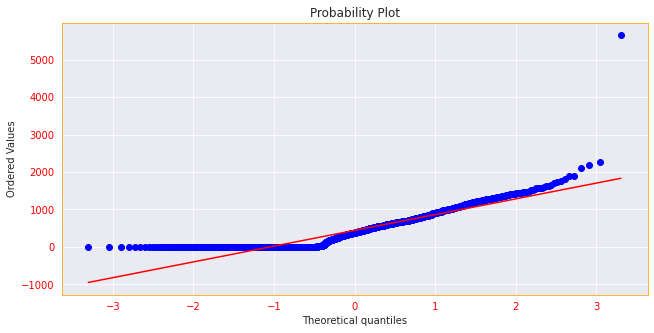

In [87]:
analyser.var_overview(var=train_columns[34], target=target)

- There are numerous basements with none finished area (type 1)
- It looks like price rises slightly with size of finished area

### BsmtFinType2

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement



In [0]:
processer.fill_with(column=train_columns[35], value= 'none')

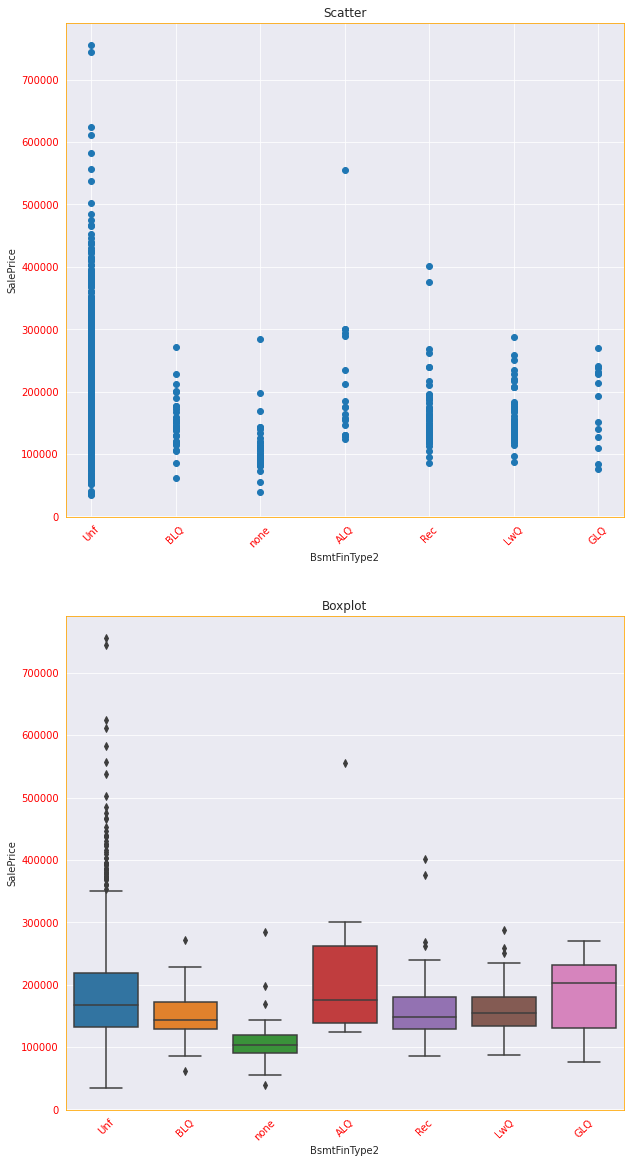

In [89]:
analyser.var_overview(var=train_columns[35], target=target)

Percentage of samples in each class

In [90]:
dataset_train[train_columns[35]].value_counts(normalize=True)

Unf    0.860
Rec    0.037
LwQ    0.032
none   0.026
BLQ    0.023
ALQ    0.013
GLQ    0.010
Name: BsmtFinType2, dtype: float64

- in 86% of cases type 2 of area is unfinished
- There is no clear correlation between most of classes and price

### BsmtFinSF2

BsmtFinSF2: Type 2 finished square feet

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 46.5493 |       161.264        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


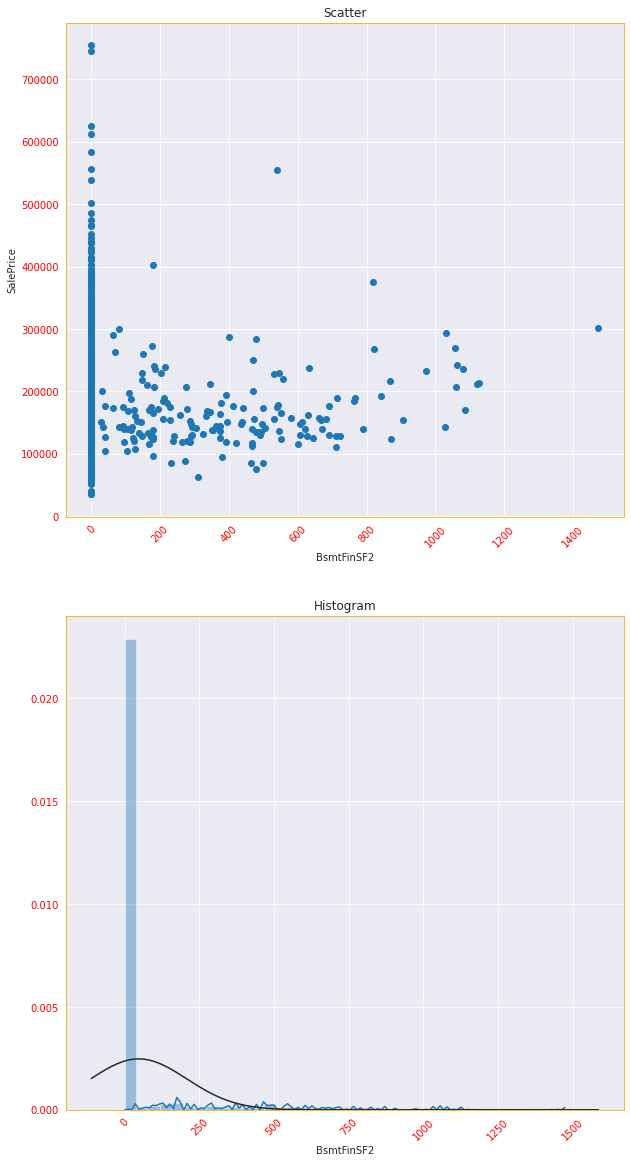

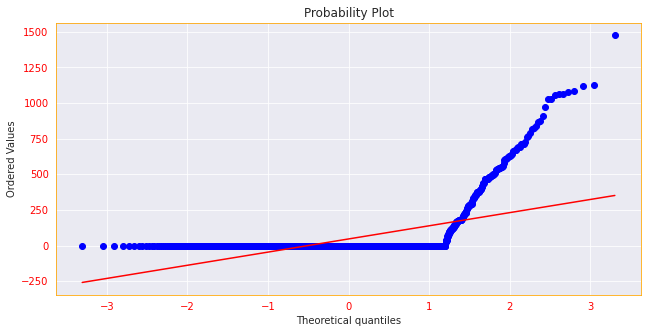

In [91]:
analyser.var_overview(var=train_columns[36], target=target)

- Most of samples have no type 2 area at all
- type area seems to have not any correlation with price
- variable can be droped from dataset

### BsmtUnfSF


BsmtUnfSF: Unfinished square feet of basement area

+----------+--------+----------------------+
| DATA     |  MEAN  |  STANDARD DEVIATION  |
+==========+========+======================+
| Variable | 567.24 |       441.716        |
+----------+--------+----------------------+
| Target   | 180921 |       79415.3        |
+----------+--------+----------------------+


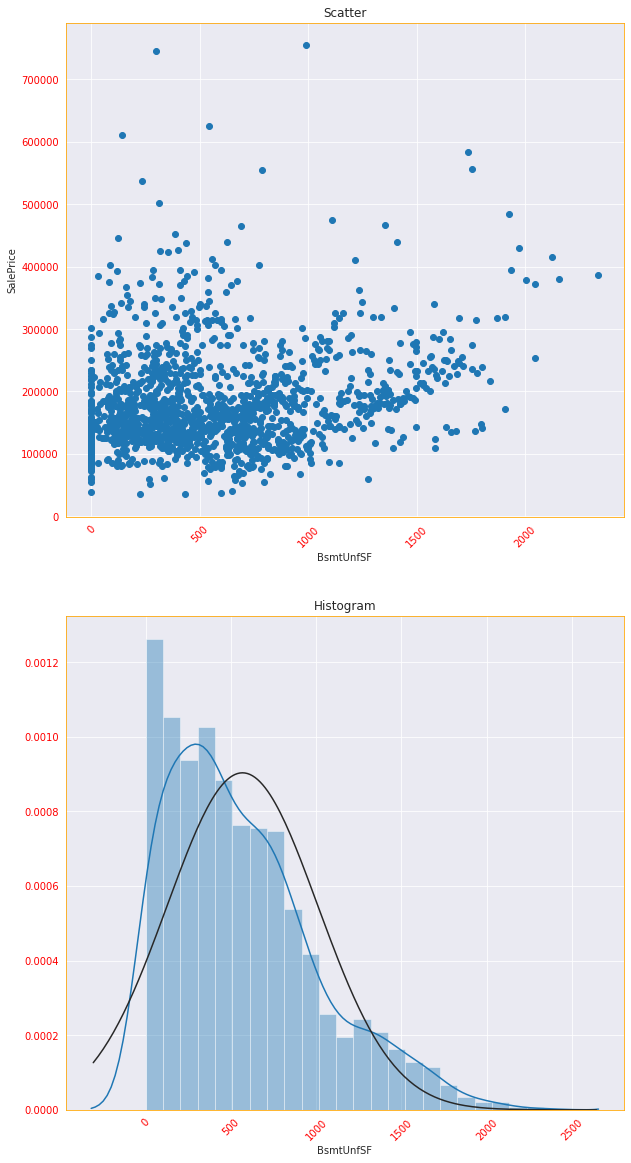

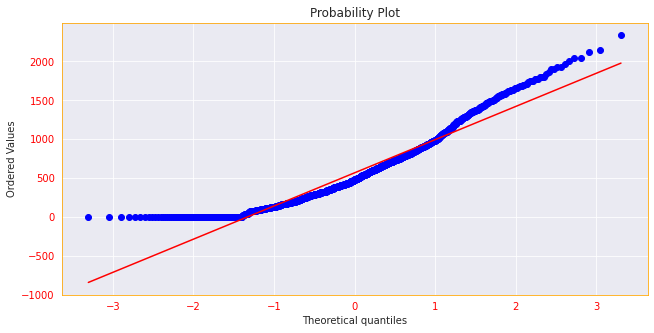

In [92]:
analyser.var_overview(var=train_columns[37], target=target)

- It looks like there is no direct correlation between basement unfinieshed area and house price
- It should be safe to drop this variable from dataset

### TotalBsmtSF


TotalBsmtSF: Total square feet of basement area

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 1057.43 |       438.555        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


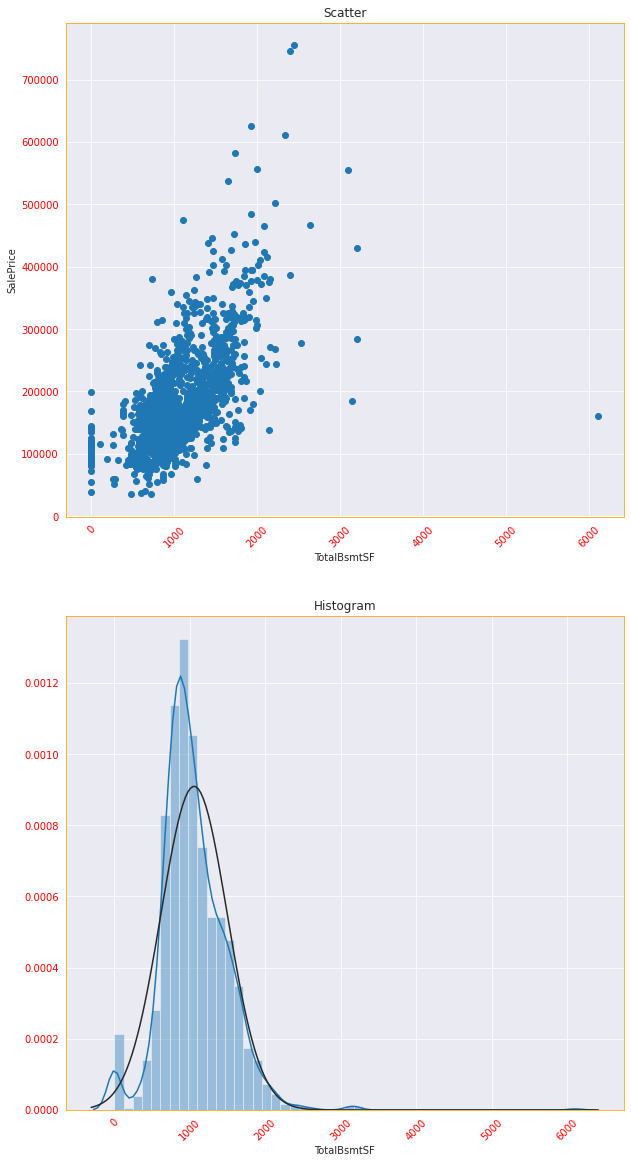

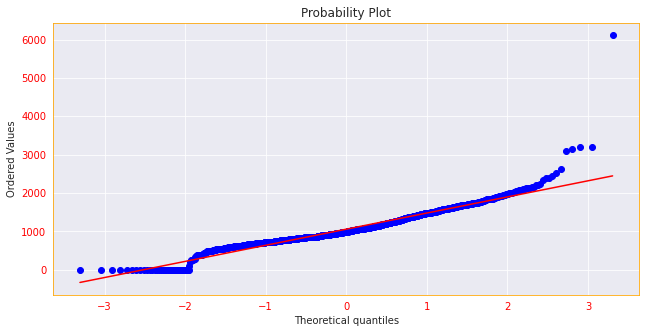

In [93]:
analyser.var_overview(var=train_columns[38], target=target)

 - variable is almost normally distributed
 - There is high correlation between basement size and price


### Heating

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

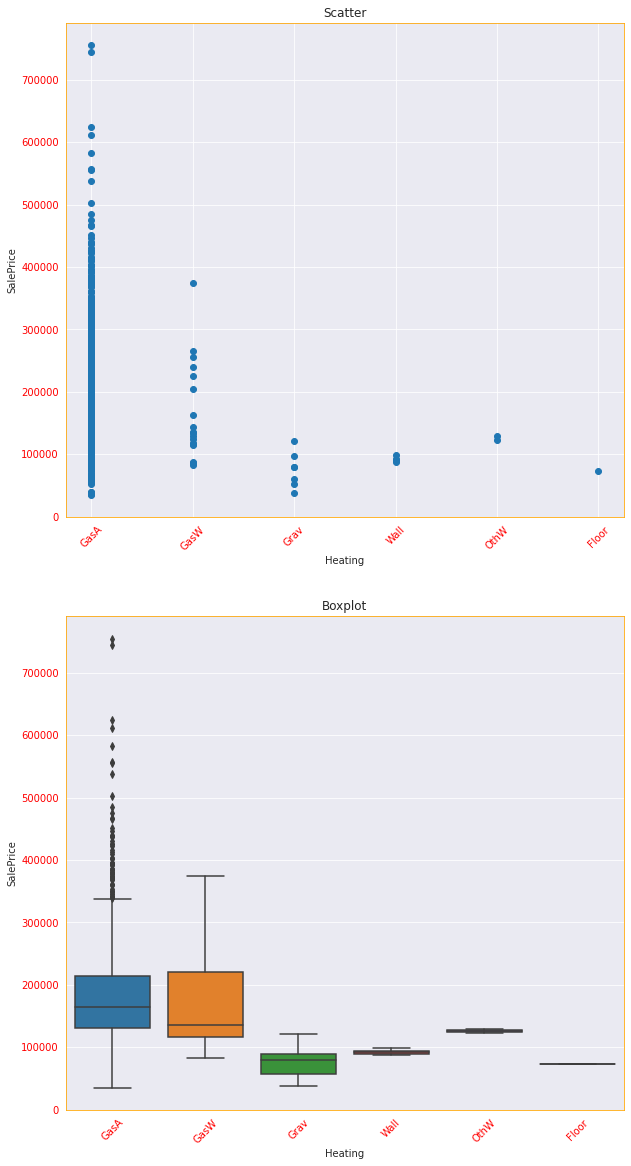

In [94]:
analyser.var_overview(var=train_columns[39], target=target)

Percentage of samples in each class

In [95]:
dataset_train[train_columns[39]].value_counts(normalize=True)

GasA    0.978
GasW    0.012
Grav    0.005
Wall    0.003
OthW    0.001
Floor   0.001
Name: Heating, dtype: float64

- Almost 98% of houses have Gas forced warm air furnace. with such dominating class, this variable does not provide any useful information



### HeatingQC

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

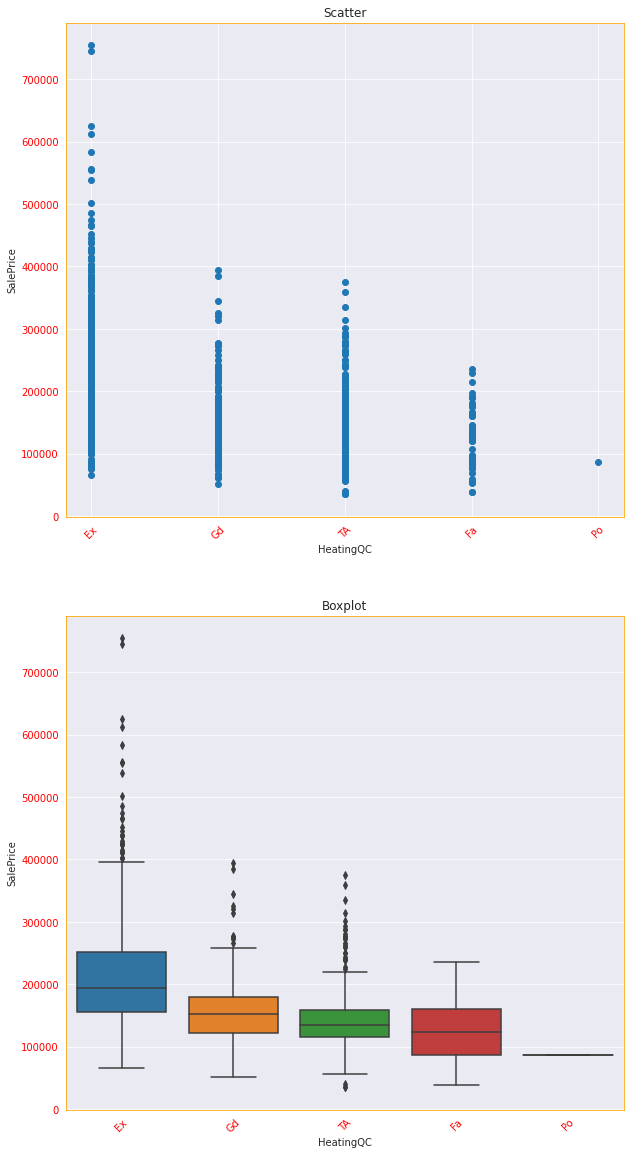

In [96]:
analyser.var_overview(var=train_columns[40], target=target)

Percentage of samples in each class

In [97]:
dataset_train[train_columns[40]].value_counts(normalize=True)

Ex   0.508
TA   0.293
Gd   0.165
Fa   0.034
Po   0.001
Name: HeatingQC, dtype: float64

- Almost all houses have average quality of heating or above
- Better quality of heating corresponds to higher price

### CentralAir

CentralAir: Central air conditioning

       N	No
       Y	Yes

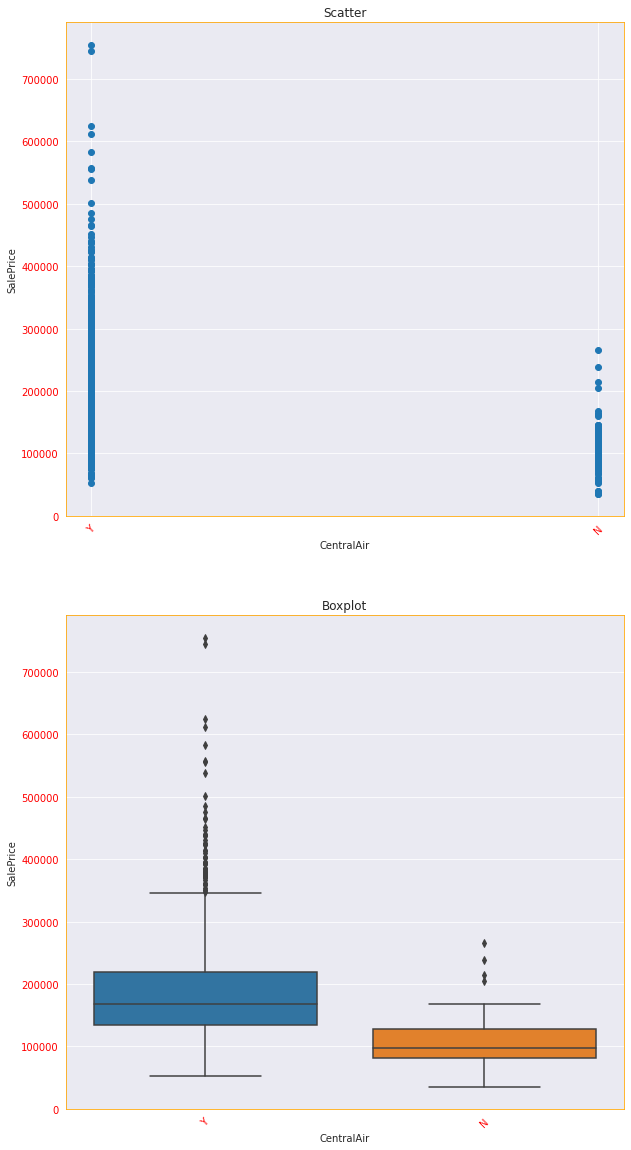

In [98]:
analyser.var_overview(var=train_columns[41], target=target)

Percentage of samples in each class

In [99]:
dataset_train[train_columns[41]].value_counts(normalize=True)

Y   0.935
N   0.065
Name: CentralAir, dtype: float64

- Almost all houses have air conditioning, but there is visible difference in price between both classes, so this variable is worth saving

### Electrical

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [0]:
processer.fill_with_most_common_value(train_columns[42])

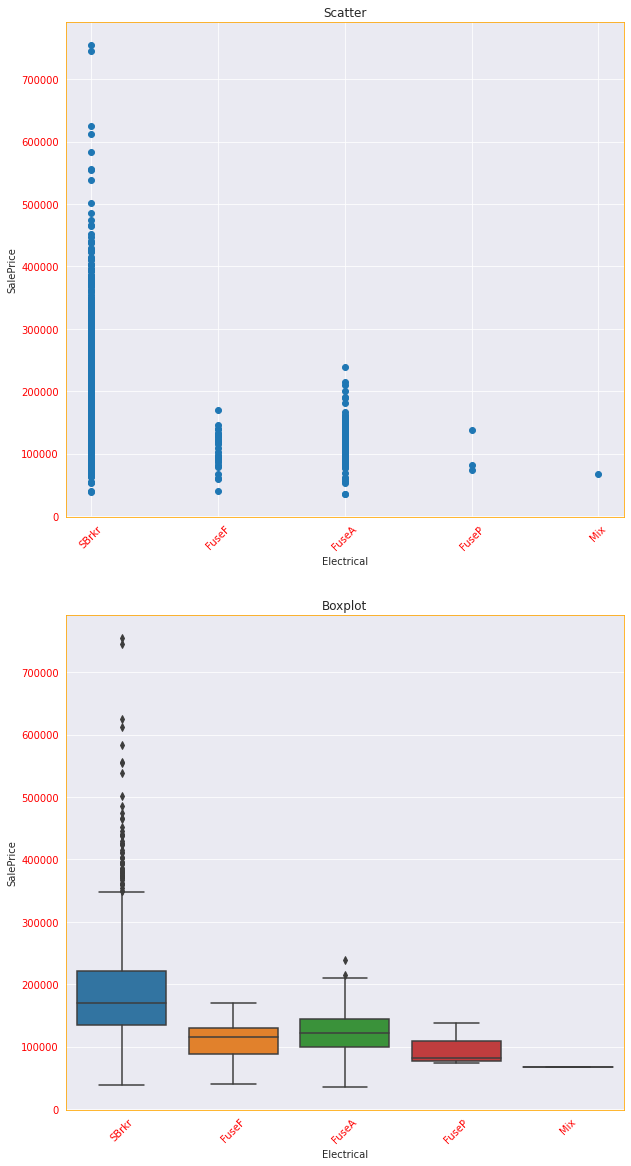

In [101]:
analyser.var_overview(var=train_columns[42], target=target)

Percentage of samples in each class

In [102]:
dataset_train[train_columns[42]].value_counts(normalize=True)

SBrkr   0.914
FuseA   0.064
FuseF   0.018
FuseP   0.002
Mix     0.001
Name: Electrical, dtype: float64

- Some classes are extremely rare, maybe they should be merged with other class to simplify variable
- It is hard to tell how much this variable is correlated with price

### 1stFlrSF

1stFlrSF: First Floor square feet

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 1162.63 |       386.455        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


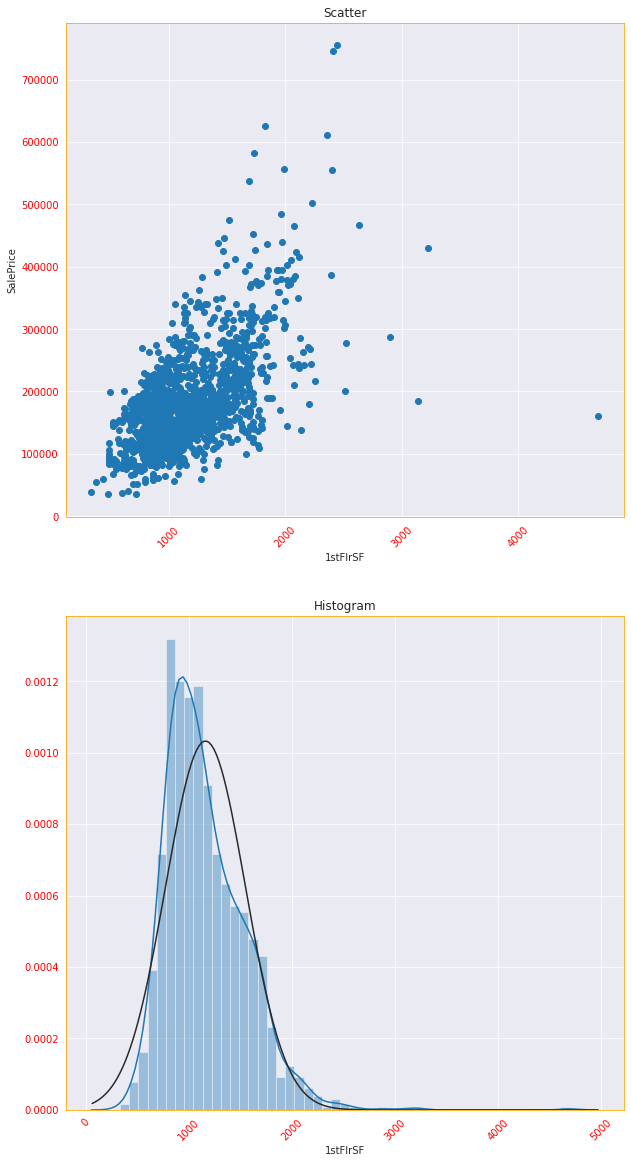

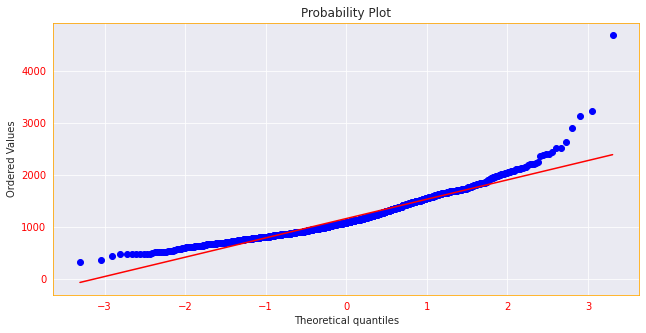

In [103]:
analyser.var_overview(var=train_columns[43], target=target)

- First flow size seems to be highly correlated to house price and is almost normally distributed(skewed to left side), which make it a good predictor
- Skewness correction might be a good idea

### 2ndFlrSF

2ndFlrSF: Second floor square feet

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 346.992 |       436.379        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


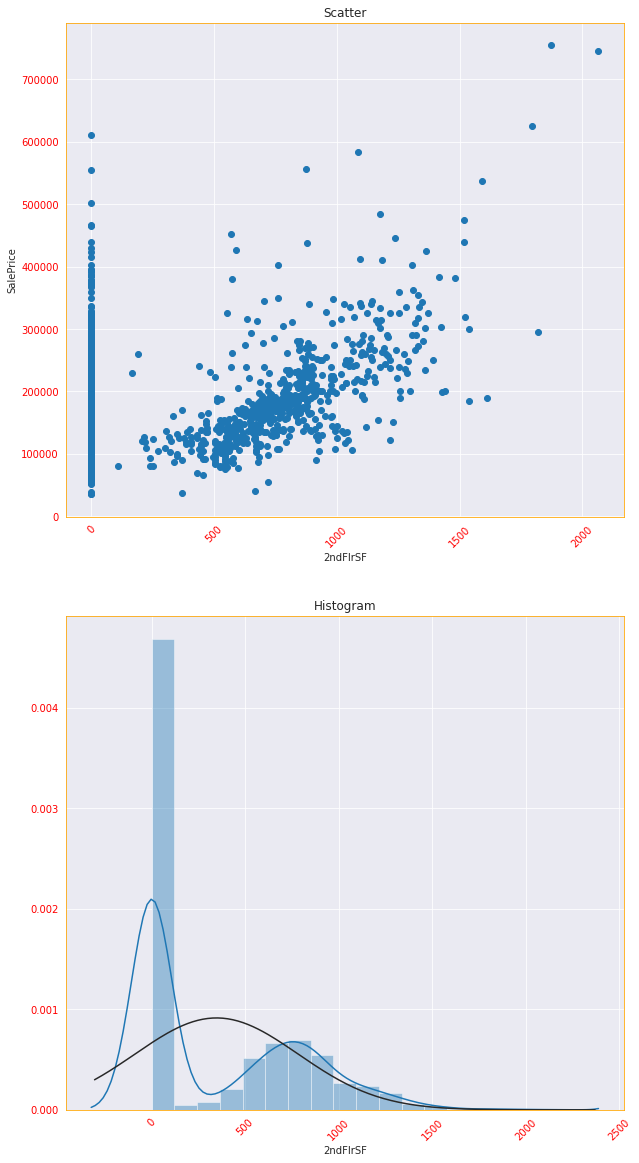

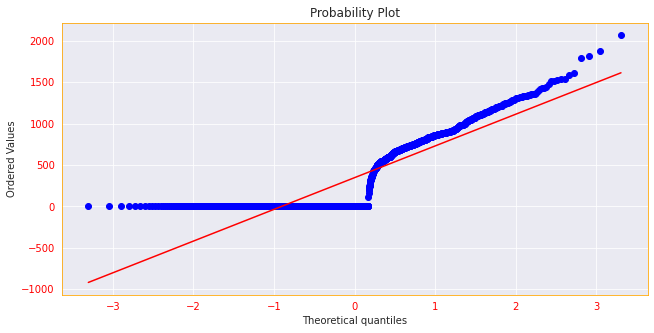

In [104]:
analyser.var_overview(var=train_columns[44], target=target)

- A lot of buildings do not have second floor
- Correletion between second floor size and price is similar to correlation between first floor size and price. 
- Merging size of both floors might be useful

### LowQualFinSF

LowQualFinSF: Low quality finished square feet (all floors)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 5.84452 |       48.6064        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


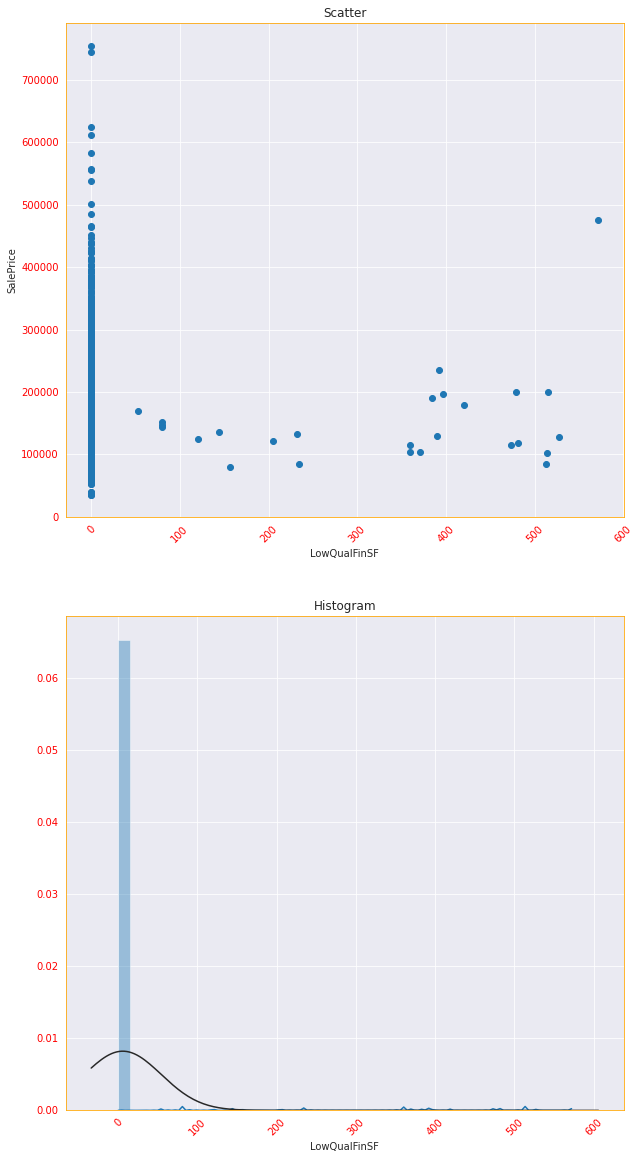

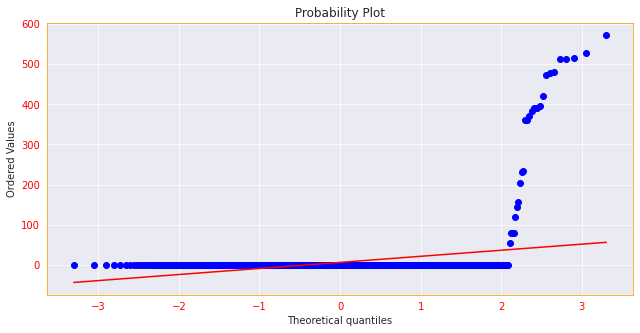

In [105]:
analyser.var_overview(var=train_columns[45], target=target)

Percentage of samples in each class

- Most of the buildings does not have low quality floor and even these few cases which how does not provide any useful information
- This variable can be droped without loss of any important information to predict price

### GrLivArea

GrLivArea: Above grade (ground) living area square feet

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 1515.46 |        525.3         |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


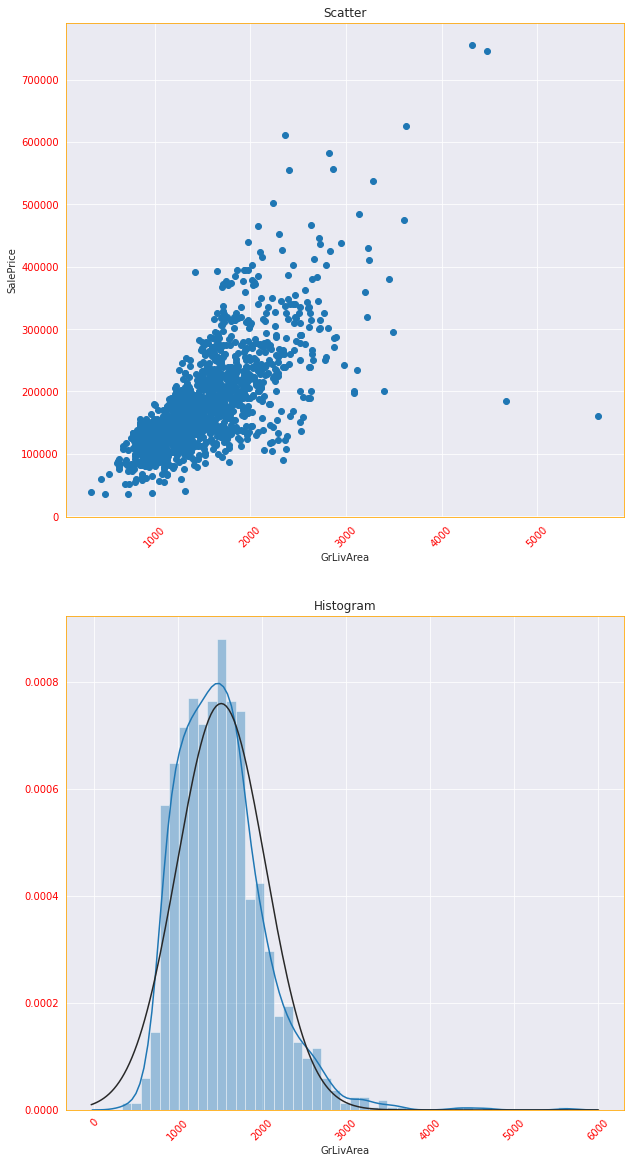

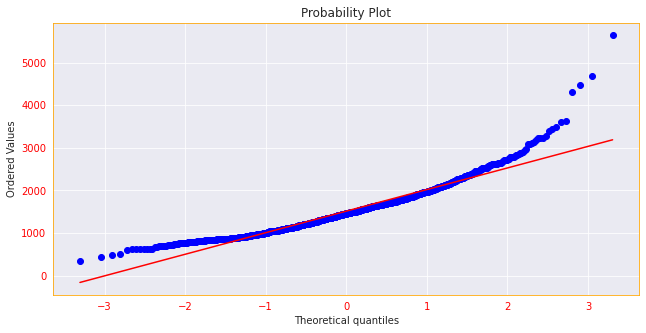

In [106]:
analyser.var_overview(var=train_columns[46], target=target)

- GrLivArea seems to have similar relation to price as first and second floor area. Maybe this class should be merged with them as well
- Also have some outliers which should be take care off 

### BsmtFullBath

BsmtFullBath: Basement full bathrooms

+----------+----------+----------------------+
| DATA     |   MEAN   |  STANDARD DEVIATION  |
+==========+==========+======================+
| Variable | 0.425342 |       0.518733       |
+----------+----------+----------------------+
| Target   |  180921  |       79415.3        |
+----------+----------+----------------------+


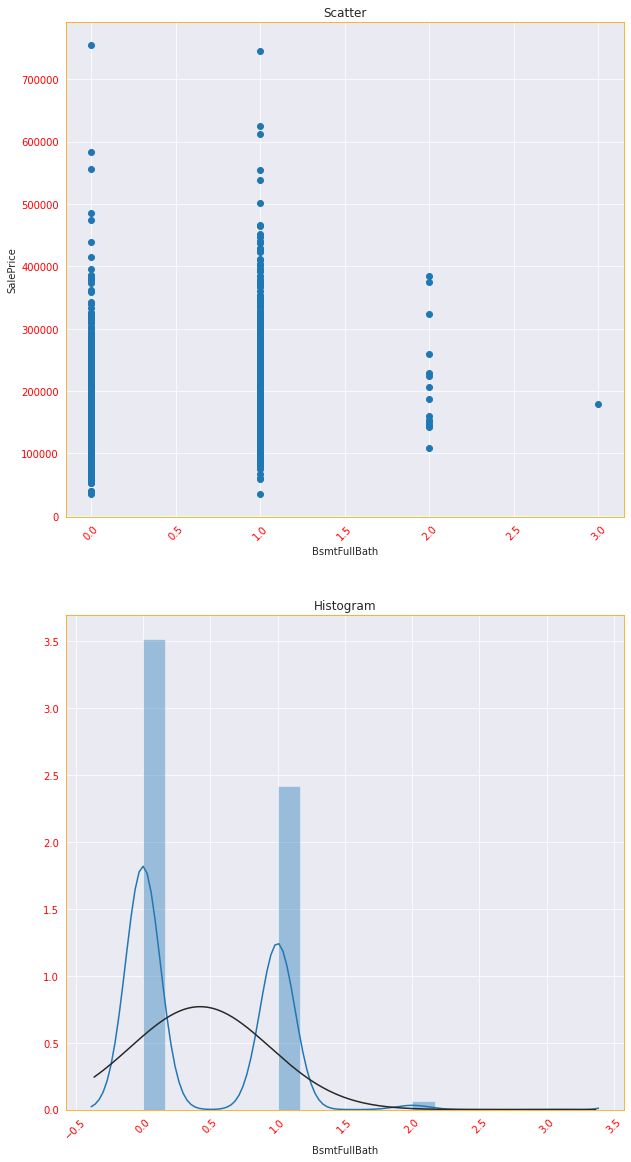

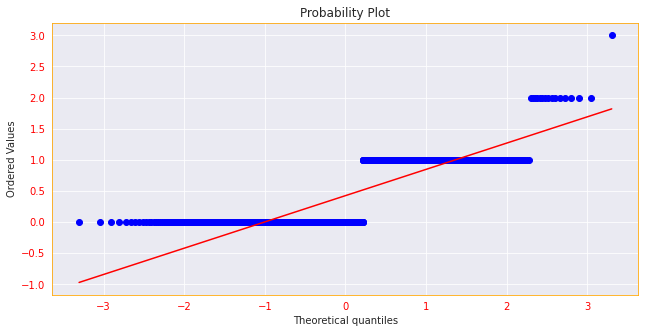

In [107]:
analyser.var_overview(var=train_columns[47], target=target)

Percentage of samples in each class

In [108]:
dataset_train[train_columns[47]].value_counts(normalize=True)

0   0.586
1   0.403
2   0.010
3   0.001
Name: BsmtFullBath, dtype: float64

- Almost 99% of cases have either 0 or 1 bathroom
- It looks like this variable is not correlated with price
- Drop it from dataset or at least transform into bathroom/no bathroom variable

### BsmtHalfBath


BsmtHalfBath: Basement half bathrooms

+----------+-----------+----------------------+
| DATA     |   MEAN    |  STANDARD DEVIATION  |
+==========+===========+======================+
| Variable | 0.0575342 |       0.238671       |
+----------+-----------+----------------------+
| Target   |  180921   |       79415.3        |
+----------+-----------+----------------------+


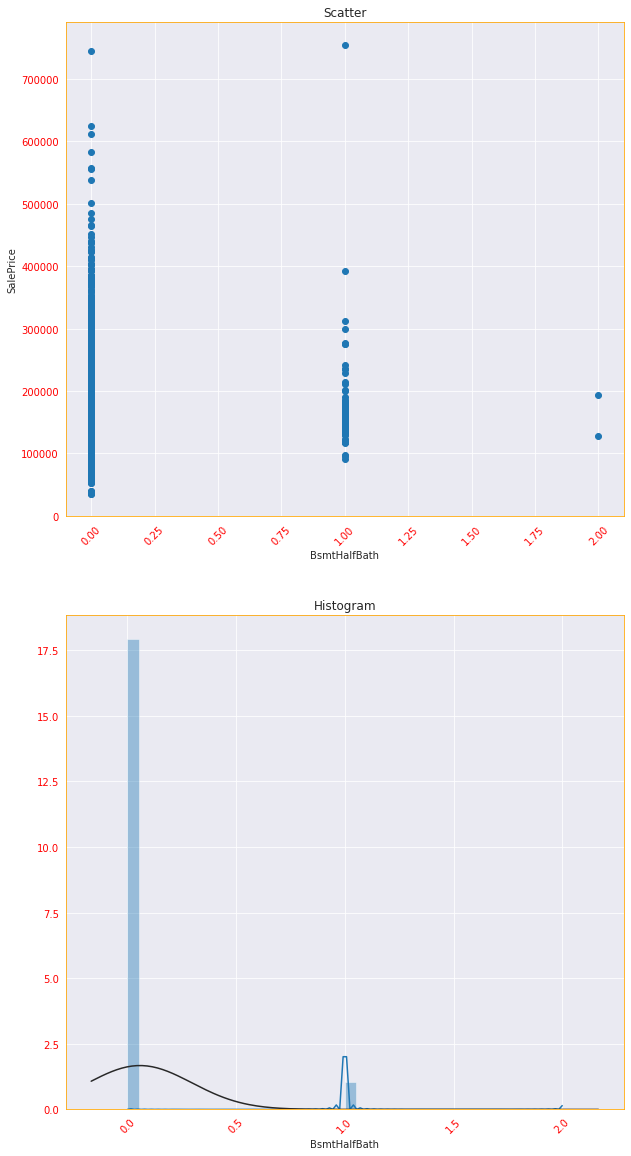

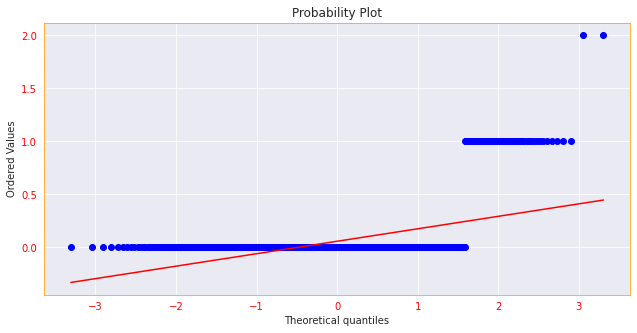

In [109]:
analyser.var_overview(var=train_columns[48], target=target)

- This variable do not provide any vaulable information about price, it can be droped

### FullBath

FullBath: Full bathrooms above grade

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 1.56507 |       0.550727       |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


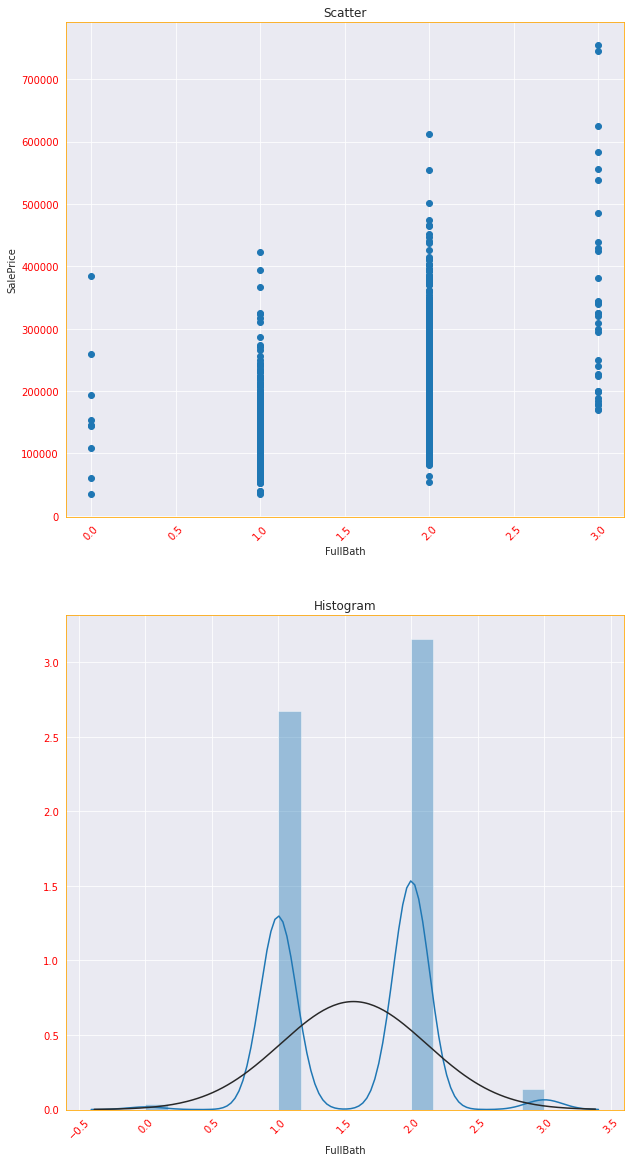

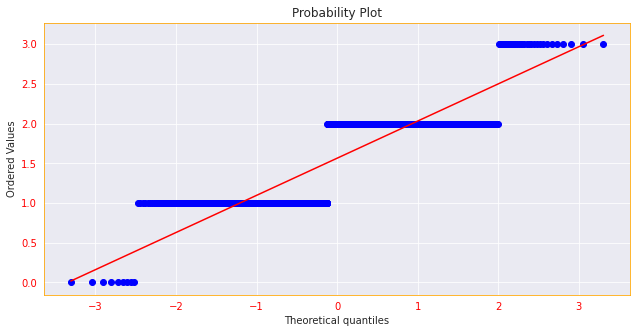

In [110]:
analyser.var_overview(var=train_columns[49], target=target)

Percentage of samples in each class

In [111]:
dataset_train[train_columns[49]].value_counts(normalize=True)

2   0.526
1   0.445
3   0.023
0   0.006
Name: FullBath, dtype: float64

- In majority of cases (~97%) there is 1 or 2 bathroom above grade in the building
- Clearly there is a relation between number of bathrooms and price of a house

### HalfBath

HalfBath: Half baths above grade

+----------+----------+----------------------+
| DATA     |   MEAN   |  STANDARD DEVIATION  |
+==========+==========+======================+
| Variable | 0.382877 |       0.502713       |
+----------+----------+----------------------+
| Target   |  180921  |       79415.3        |
+----------+----------+----------------------+


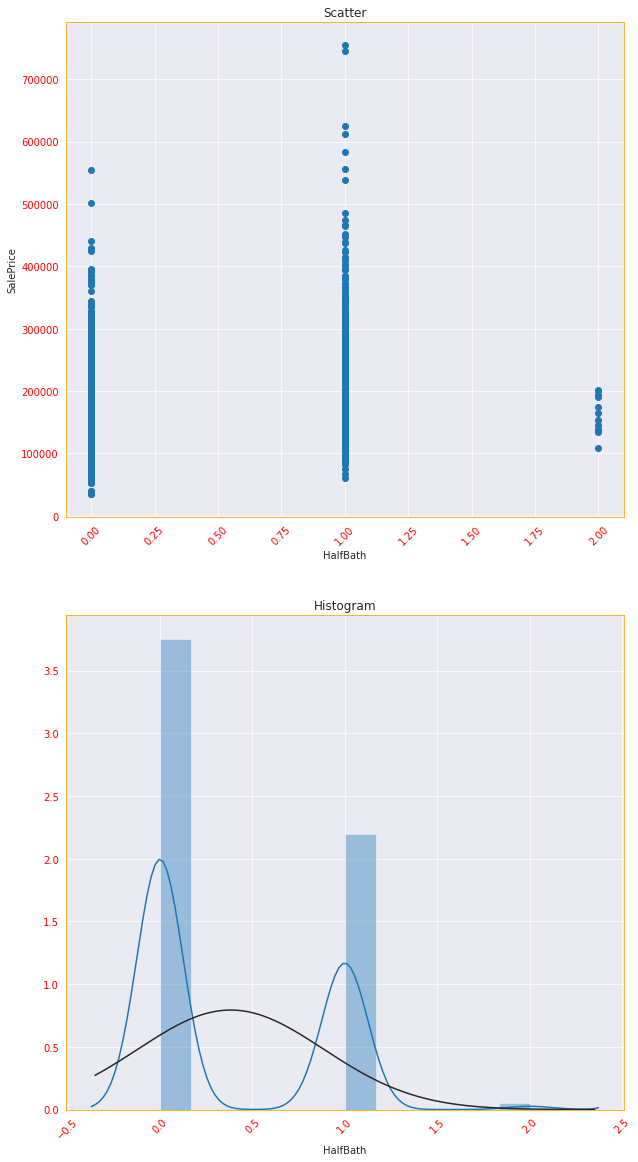

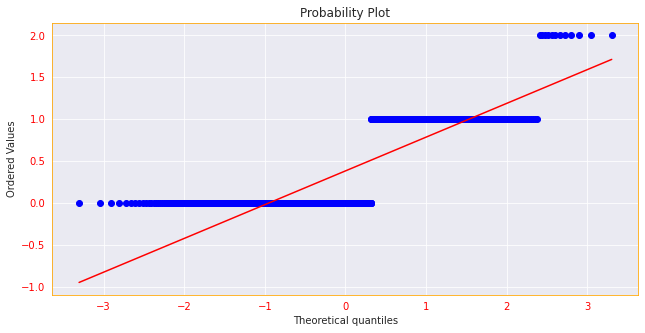

In [112]:
analyser.var_overview(var=train_columns[50], target=target)

Percentage of samples in each class

In [113]:
dataset_train[train_columns[50]].value_counts(normalize=True)

0   0.625
1   0.366
2   0.008
Name: HalfBath, dtype: float64

- It looks like half bath does not affect the price of house, at least directly
- There are only few cases with 2 bathrooms, so variavle can be transform into bathroom/no bathroom form

### BedroomAbcGr

BedroomAbcGr: Bedrooms above grade (does NOT include basement bedrooms)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 2.86644 |       0.815499       |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


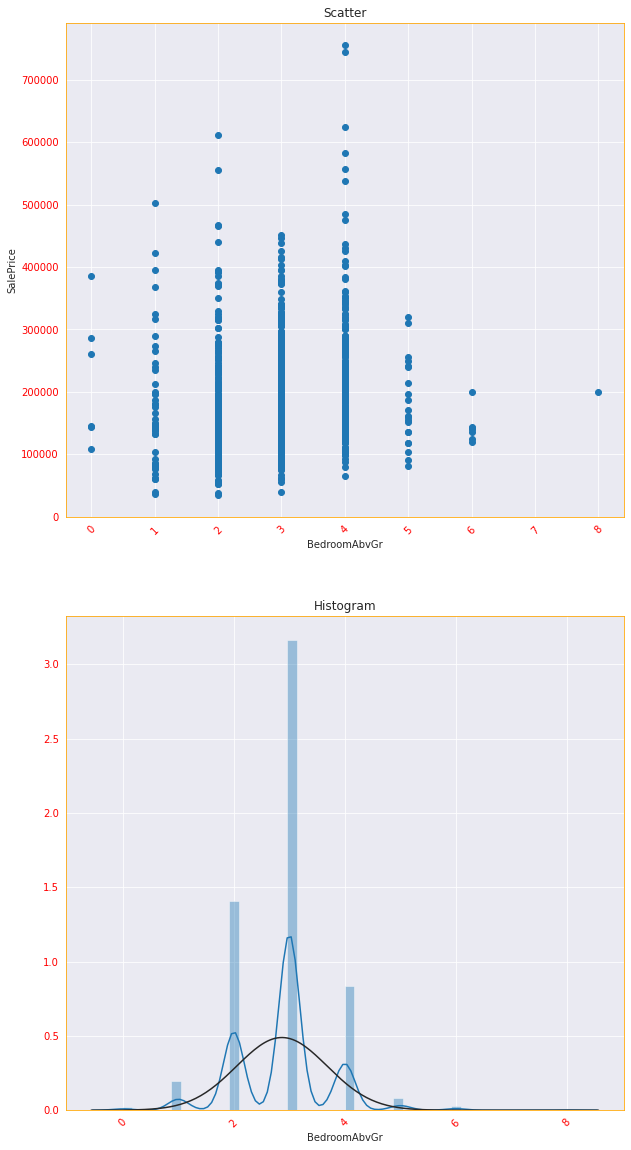

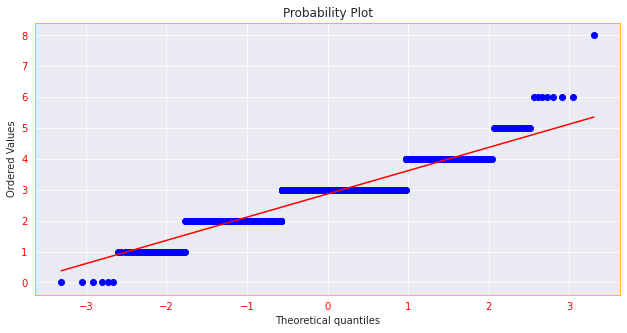

In [114]:
analyser.var_overview(var=train_columns[51], target=target)

Percentage of samples in each class

- suprisingly price od house does not change significantly with number of bedrooms

In [115]:
dataset_train[train_columns[51]].value_counts(normalize=True)

3   0.551
2   0.245
4   0.146
1   0.034
5   0.014
6   0.005
0   0.004
8   0.001
Name: BedroomAbvGr, dtype: float64

### KitchenAbvGr


Kitchen: Kitchens above grade

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 1.04658 |       0.220263       |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


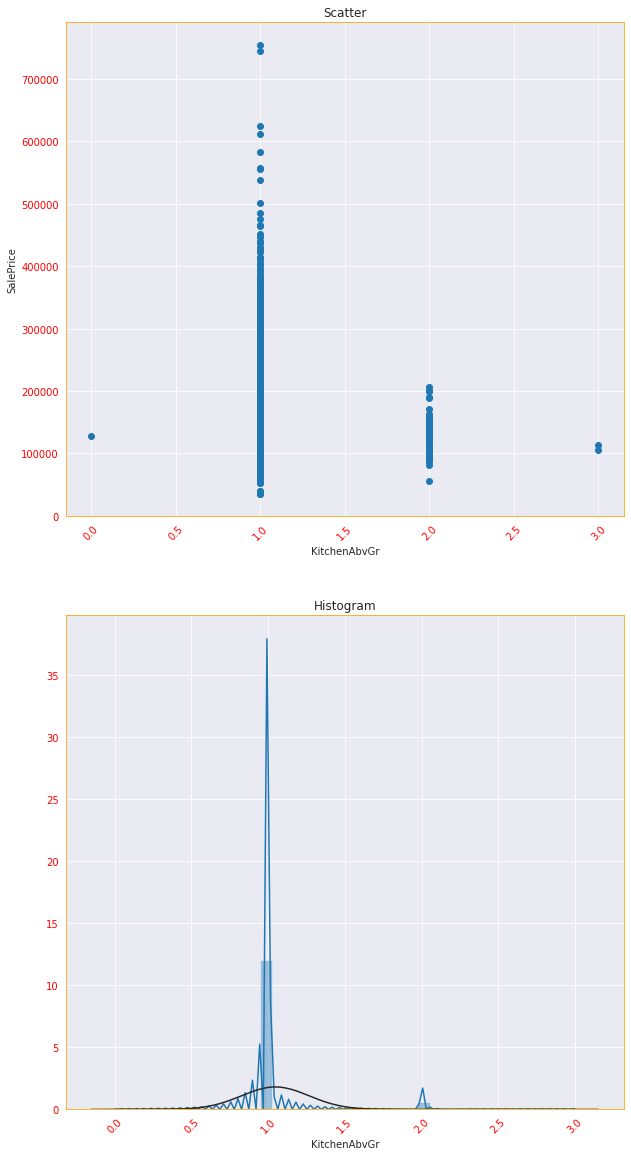

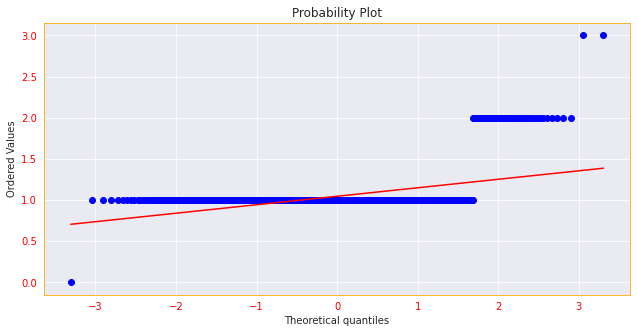

In [116]:
analyser.var_overview(var=train_columns[52], target=target)

Percentage of samples in each class

In [117]:
dataset_train[train_columns[52]].value_counts(normalize=True)

1   0.953
2   0.045
3   0.001
0   0.001
Name: KitchenAbvGr, dtype: float64

- There only house with no kitchen at all and over 95% with 1 kitchen. Variable should be droped or either transform into (1 kitchen / other) form

### KitchenQual

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

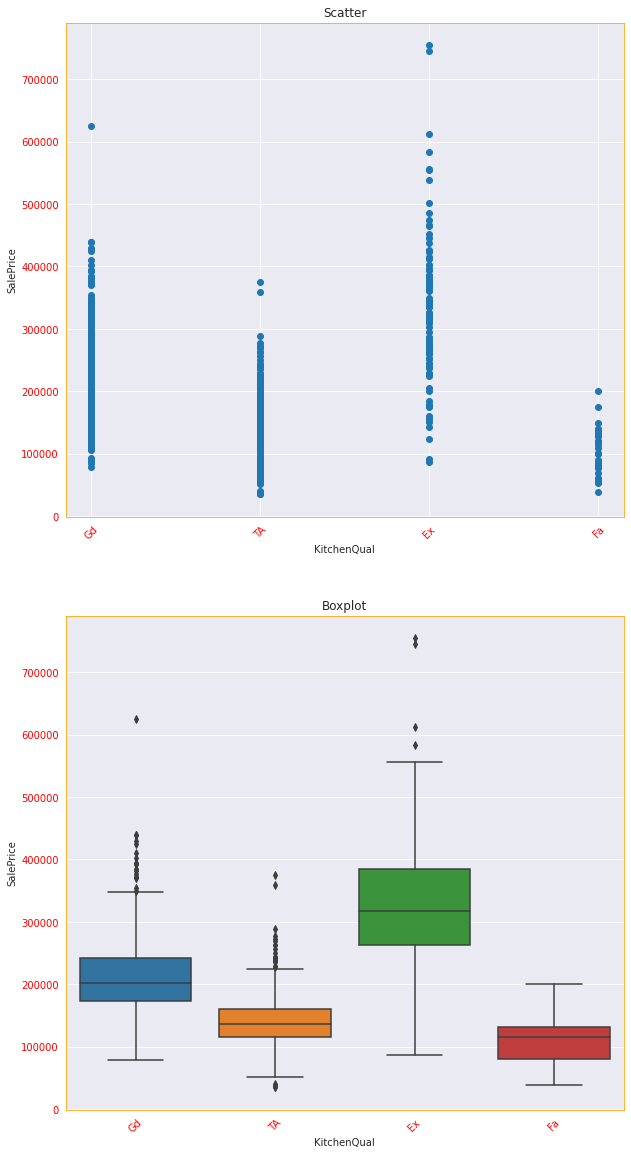

In [118]:
analyser.var_overview(var=train_columns[53], target=target)

Percentage of samples in each class

In [119]:
dataset_train[train_columns[53]].value_counts(normalize=True)

TA   0.503
Gd   0.401
Ex   0.068
Fa   0.027
Name: KitchenQual, dtype: float64

- There is visible relation between kitchen quality and house price

### TotRmsAbvGrd

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 6.51781 |       1.62484        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


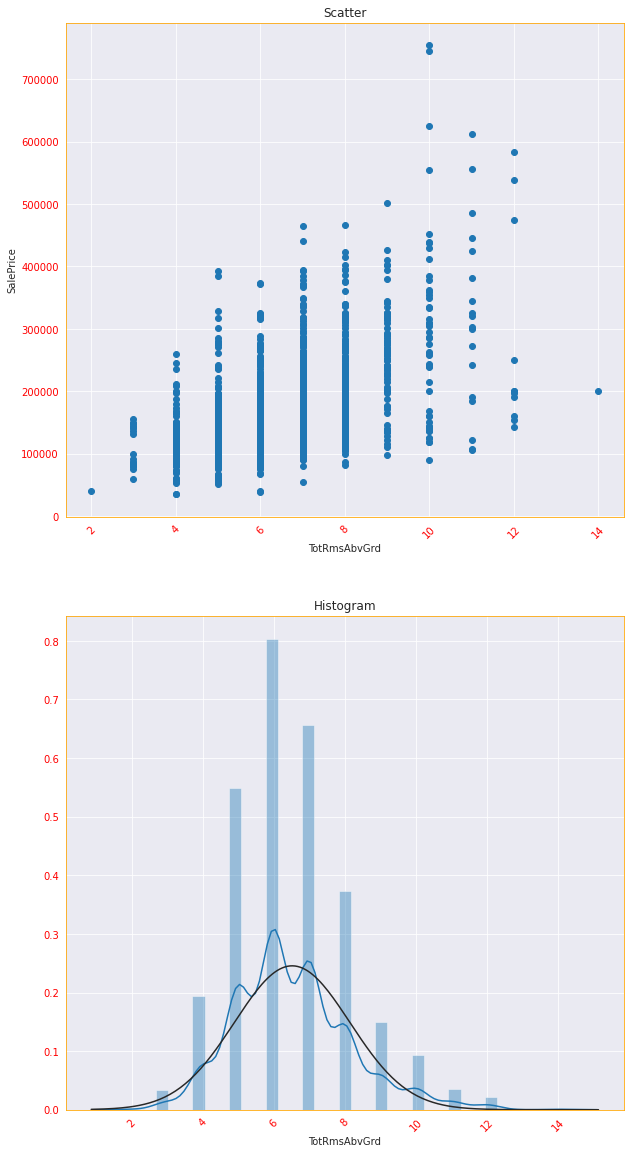

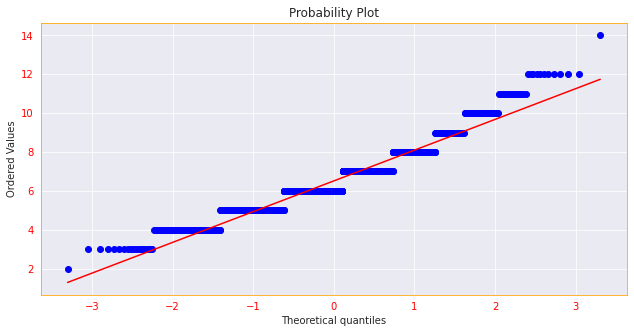

In [120]:
analyser.var_overview(var=train_columns[54], target=target)

### Functional

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

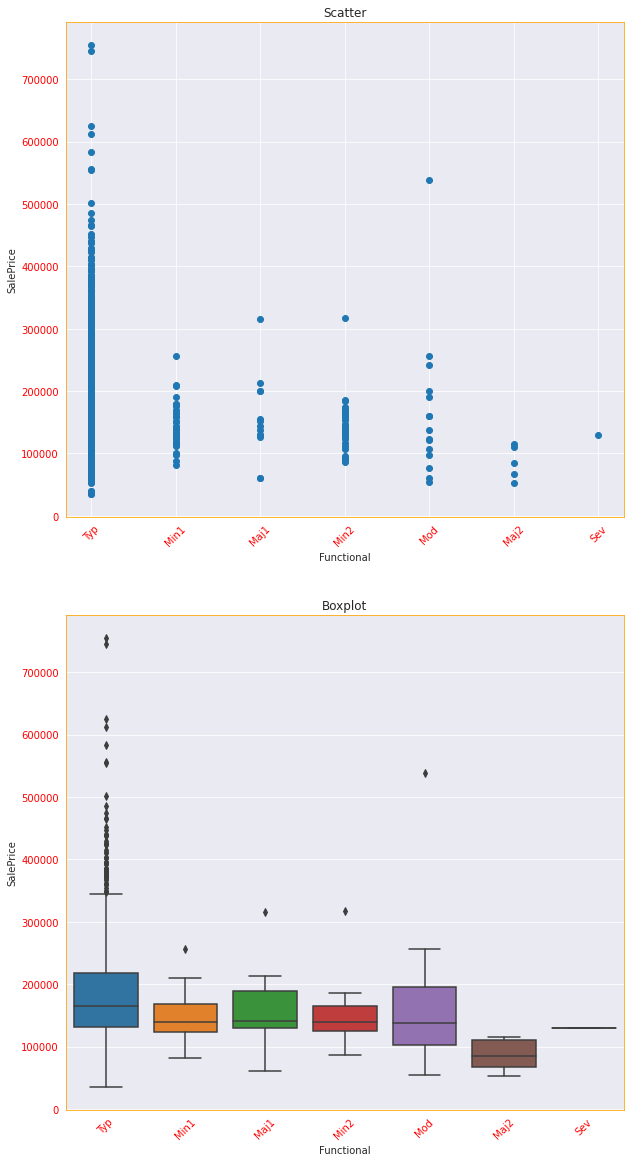

In [121]:
analyser.var_overview(var=train_columns[55], target=target)

Percentage of samples in each class

In [122]:
dataset_train[train_columns[55]].value_counts(normalize=True)

Typ    0.932
Min2   0.023
Min1   0.021
Mod    0.010
Maj1   0.010
Maj2   0.003
Sev    0.001
Name: Functional, dtype: float64

- Over 93% of cases have typical functionalityn in other cases price seems to be similar, but there may be not enough data to show differences.
- Either drop variable or transform into (typical/ nontypical)

### Fireplaces

Fireplaces: Number of fireplaces

+----------+----------+----------------------+
| DATA     |   MEAN   |  STANDARD DEVIATION  |
+==========+==========+======================+
| Variable | 0.613014 |       0.644446       |
+----------+----------+----------------------+
| Target   |  180921  |       79415.3        |
+----------+----------+----------------------+


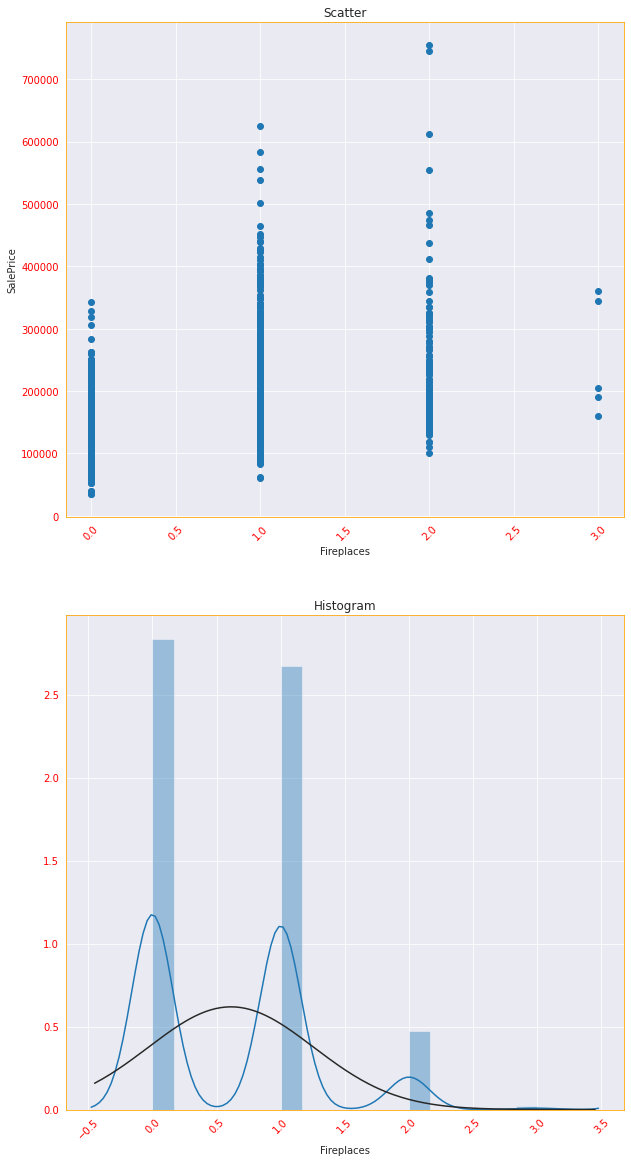

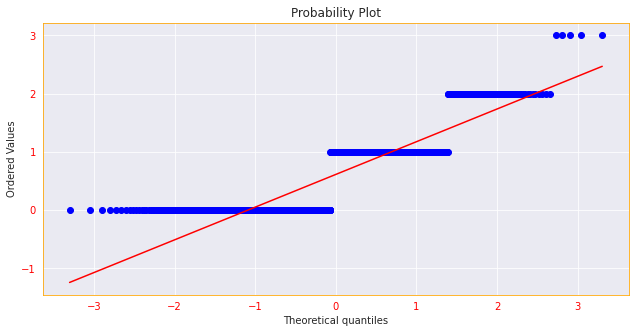

In [123]:
analyser.var_overview(var=train_columns[56], target=target)

Percentage of samples in each class

In [124]:
dataset_train[train_columns[56]].value_counts(normalize=True)

0   0.473
1   0.445
2   0.079
3   0.003
Name: Fireplaces, dtype: float64

- houses with more fireplaces seems to be more expensive

### FireplaceQu

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [0]:
processer.fill_with(train_columns[57], 'NA')

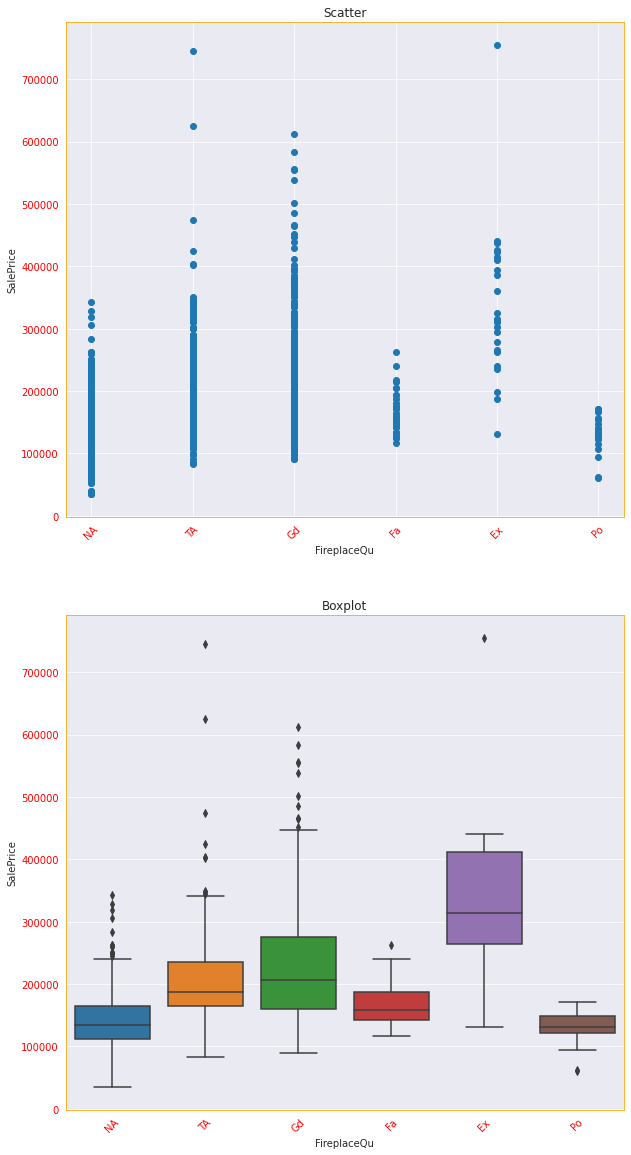

In [126]:
analyser.var_overview(var=train_columns[57], target=target)

Percentage of samples in each class

In [127]:
dataset_train[train_columns[57]].value_counts(normalize=True)

NA   0.473
Gd   0.260
TA   0.214
Fa   0.023
Ex   0.016
Po   0.014
Name: FireplaceQu, dtype: float64

- There is a clear correalation between quality of fireplaces with house price

### GarageType

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [0]:
processer.fill_with(train_columns[58], 'NA')

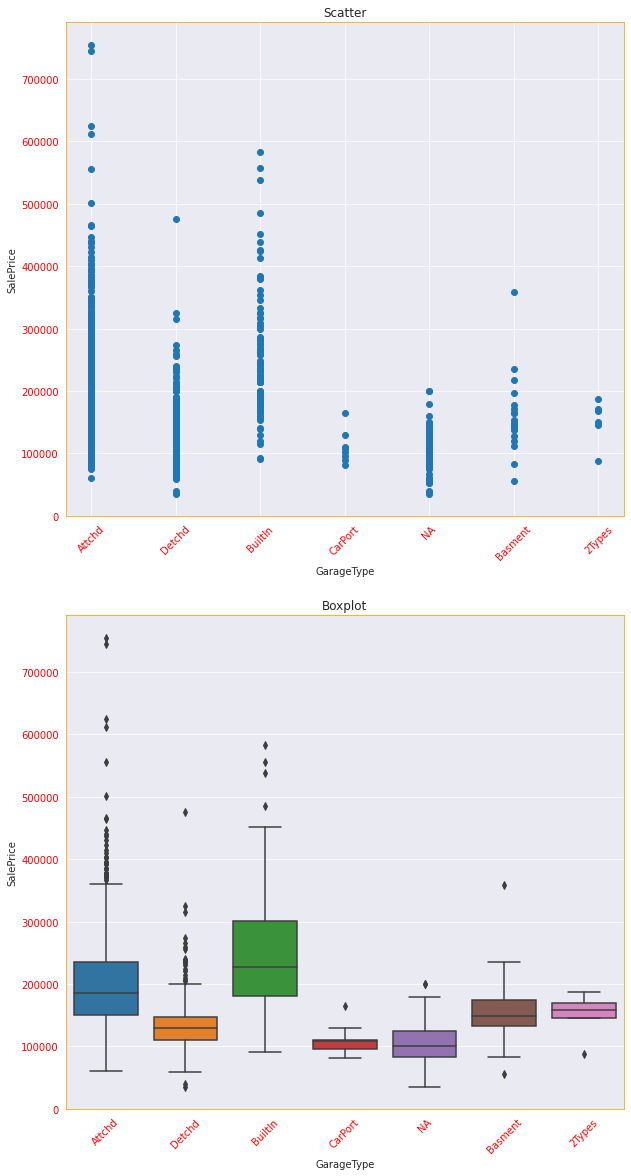

In [129]:
analyser.var_overview(var=train_columns[58], target=target)

Percentage of samples in each class

In [130]:
dataset_train[train_columns[58]].value_counts(normalize=True)

Attchd    0.596
Detchd    0.265
BuiltIn   0.060
NA        0.055
Basment   0.013
CarPort   0.006
2Types    0.004
Name: GarageType, dtype: float64

- Expensive houses seems to have Built in or Attached garages, but it is hard to be certain, because there is not enough cases of other types of garages, except detached garages and none at all

### GarageYrBlt

GarageYrBlt: Year garage was built

In [0]:
processer.fill_with_most_common_value(train_columns[59])

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 1979.98 |       24.7412        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


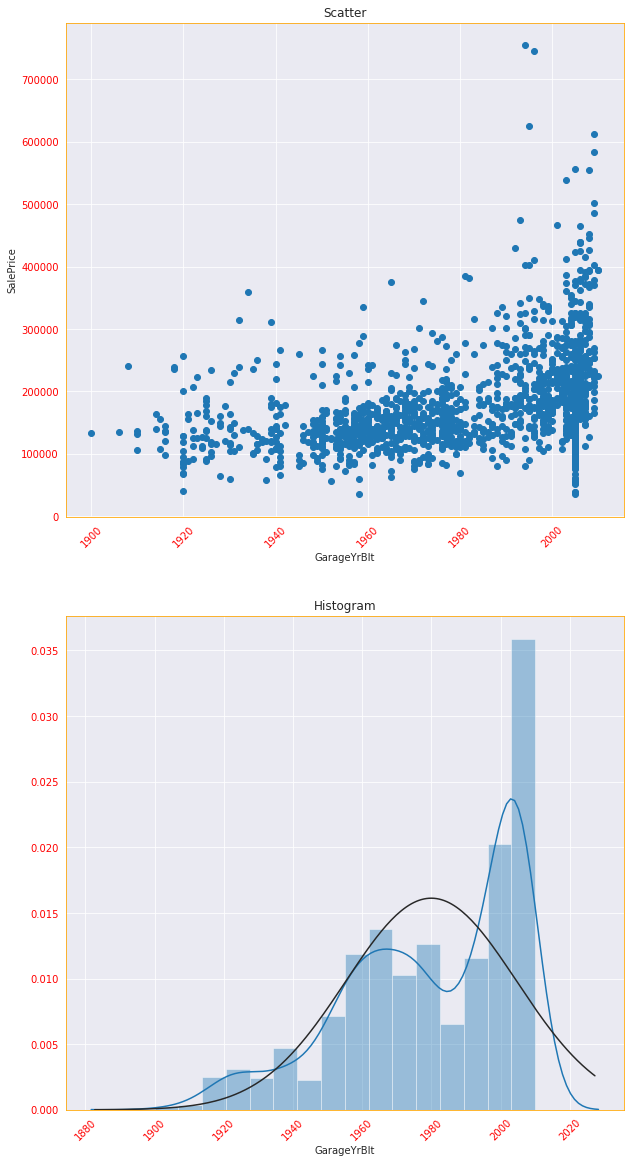

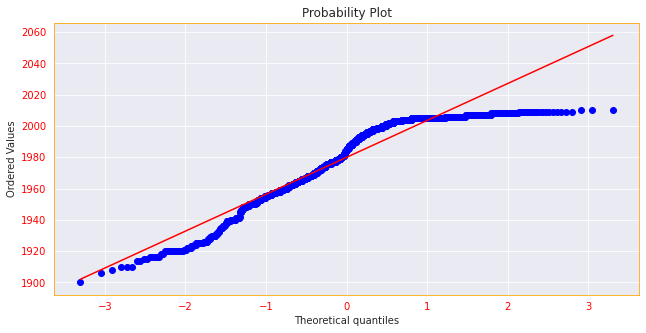

In [132]:
analyser.var_overview(var=train_columns[59], target=target)

- Garage year of built correlation with price looks very similar to building year of built correlation with price. Both variables show very similar type of data so it is safe to assume, that information which this variables provide is an duplicate of YearBuilt variables.
- It should be save to drop this variable

### GarageFinish

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [0]:
processer.fill_with(train_columns[60], 'NA')

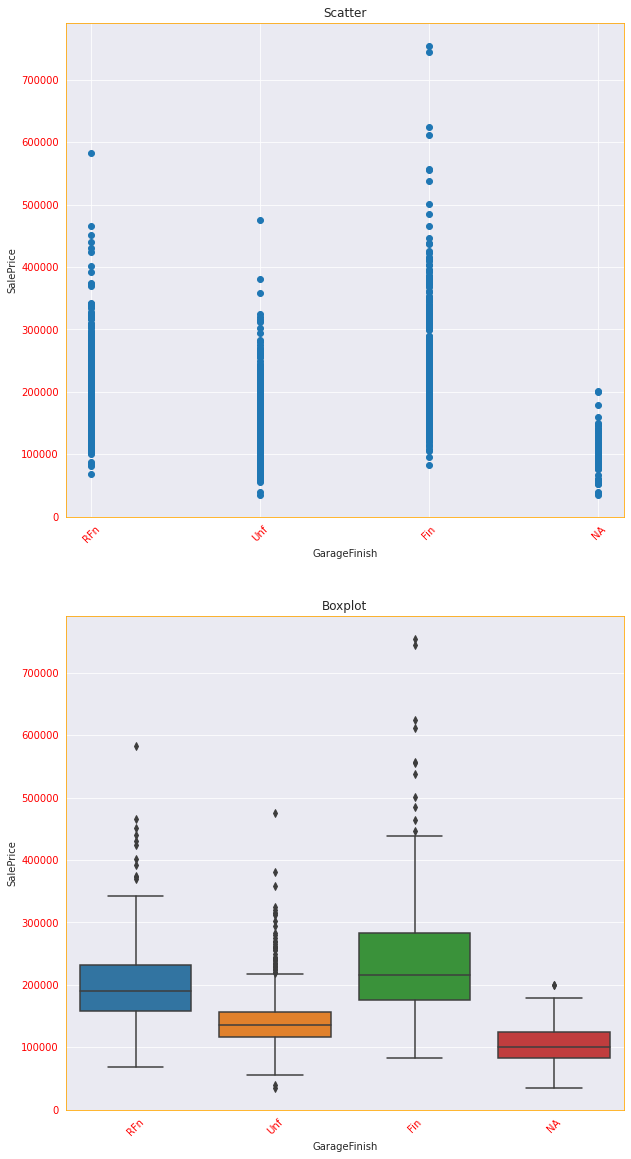

In [134]:
analyser.var_overview(var=train_columns[60], target=target)

Percentage of samples in each class

In [135]:
dataset_train[train_columns[60]].value_counts(normalize=True)

Unf   0.414
RFn   0.289
Fin   0.241
NA    0.055
Name: GarageFinish, dtype: float64

- It looks like garage finish is associated with house price


### GarageCars

GarageCars: Size of garage in car capacity

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 1.76712 |       0.747059       |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


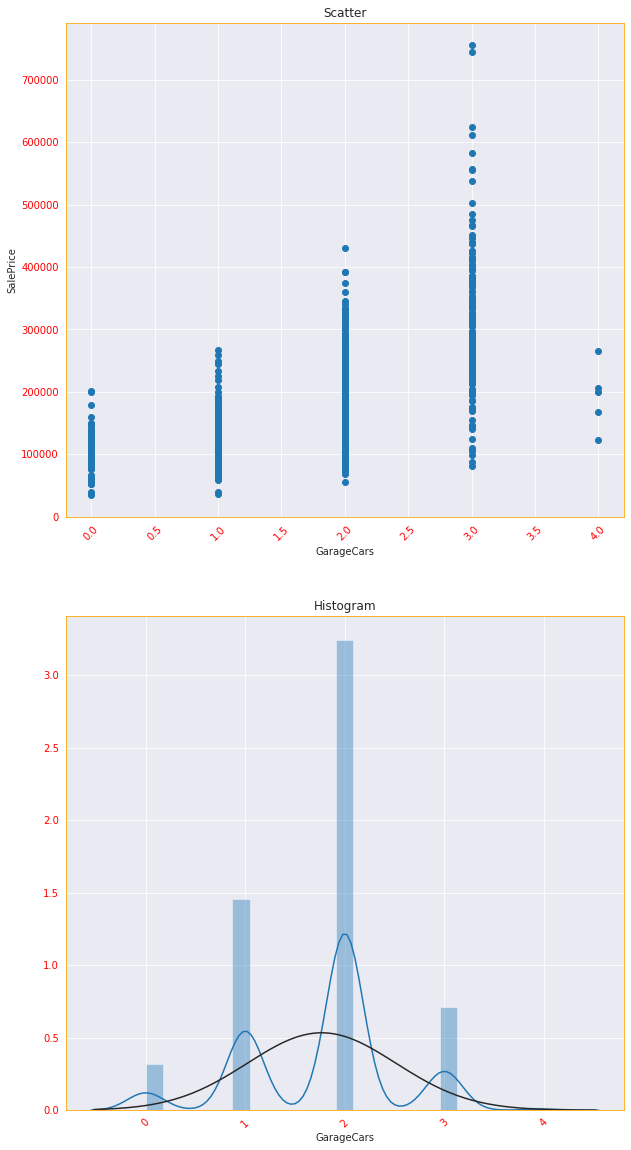

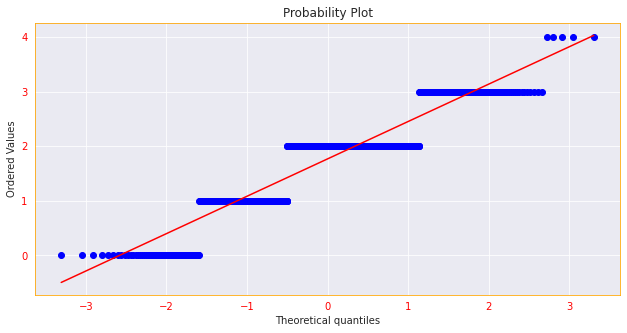

In [136]:
analyser.var_overview(var=train_columns[61], target=target)

Percentage of samples in each class

In [137]:
dataset_train[train_columns[61]].value_counts(normalize=True)

2   0.564
1   0.253
3   0.124
0   0.055
4   0.003
Name: GarageCars, dtype: float64

- There is a clear correalation between car capacity in garage and house price

### GarageArea

GarageArea: Size of garage in square feet

+----------+--------+----------------------+
| DATA     |  MEAN  |  STANDARD DEVIATION  |
+==========+========+======================+
| Variable | 472.98 |       213.732        |
+----------+--------+----------------------+
| Target   | 180921 |       79415.3        |
+----------+--------+----------------------+


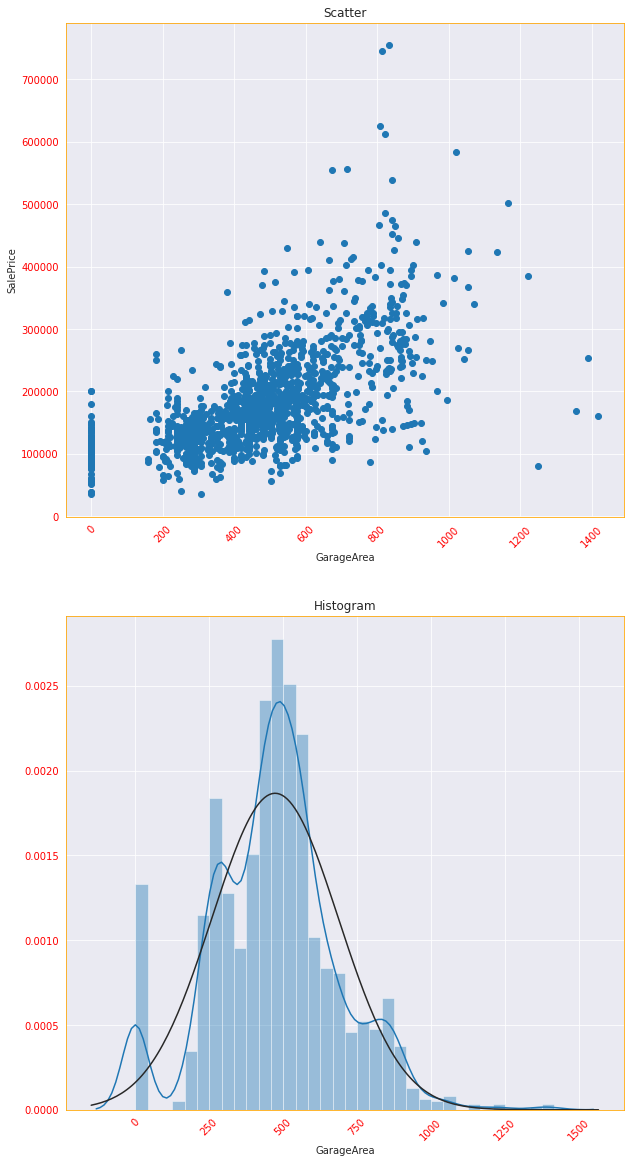

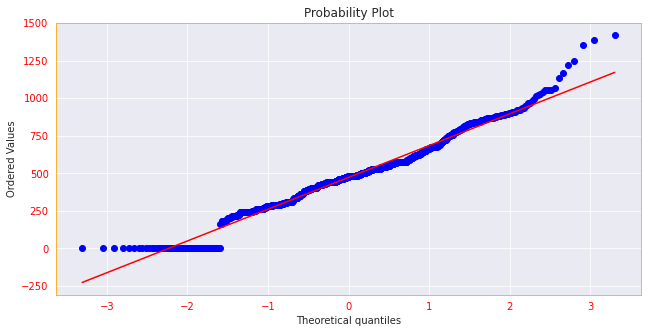

In [138]:
analyser.var_overview(var=train_columns[62], target=target)

- There is a clear correalation between garage area and house price

### GarageQual

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [0]:
processer.fill_with(train_columns[63], 'NA')

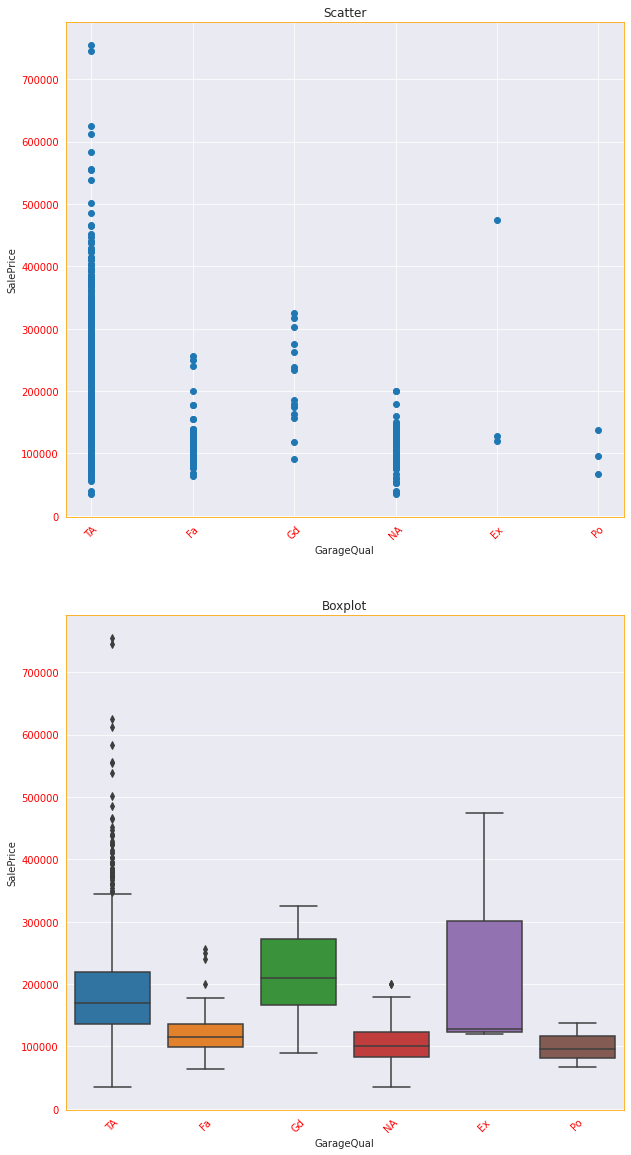

In [140]:
analyser.var_overview(var=train_columns[63], target=target)

Percentage of samples in each class

In [141]:
dataset_train[train_columns[63]].value_counts(normalize=True)

TA   0.898
NA   0.055
Fa   0.033
Gd   0.010
Ex   0.002
Po   0.002
Name: GarageQual, dtype: float64

- Almost 90% of garages have average quality, there are differences in price with rest of classes but, because of small number of cases it is hard to tell how valid these differences are

### GarageCond

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [0]:
processer.fill_with(train_columns[64], 'NA')

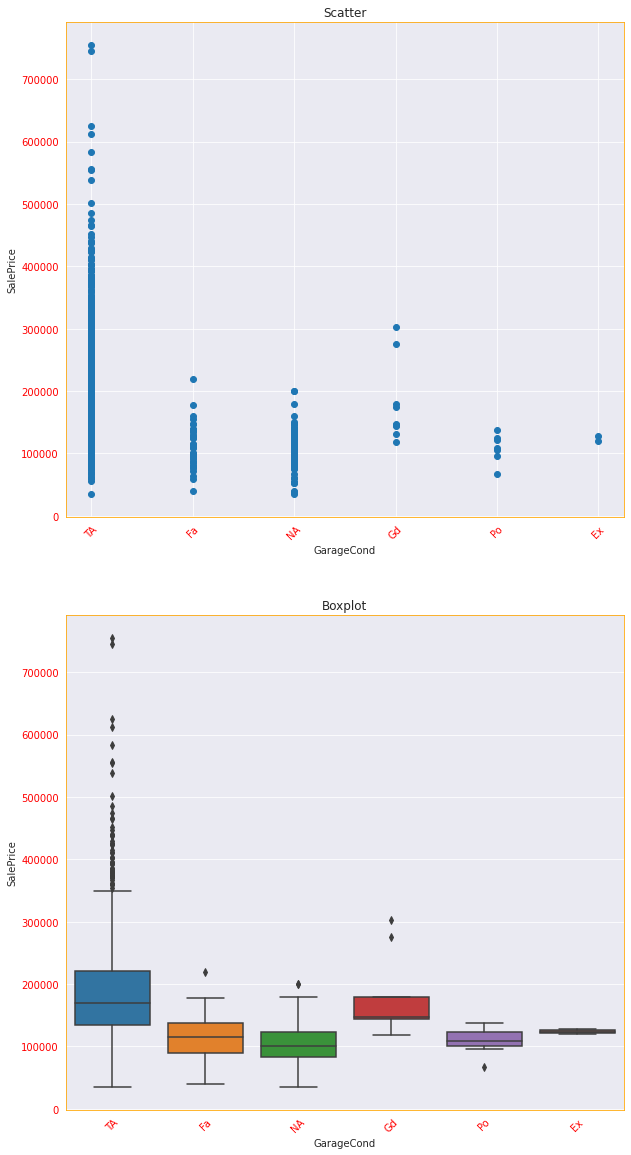

In [143]:
analyser.var_overview(var=train_columns[64], target=target)

Percentage of samples in each class

In [144]:
dataset_train[train_columns[64]].value_counts(normalize=True)

TA   0.908
NA   0.055
Fa   0.024
Gd   0.006
Po   0.005
Ex   0.001
Name: GarageCond, dtype: float64

- Over 90% of garages are in average condition, furthermore other classes seems to have similar price range, which most likely cause by lack of samples in those classes.
- This variable does not looks like a good estimate, it probably should be droped from dataset

### PavedDrive

PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

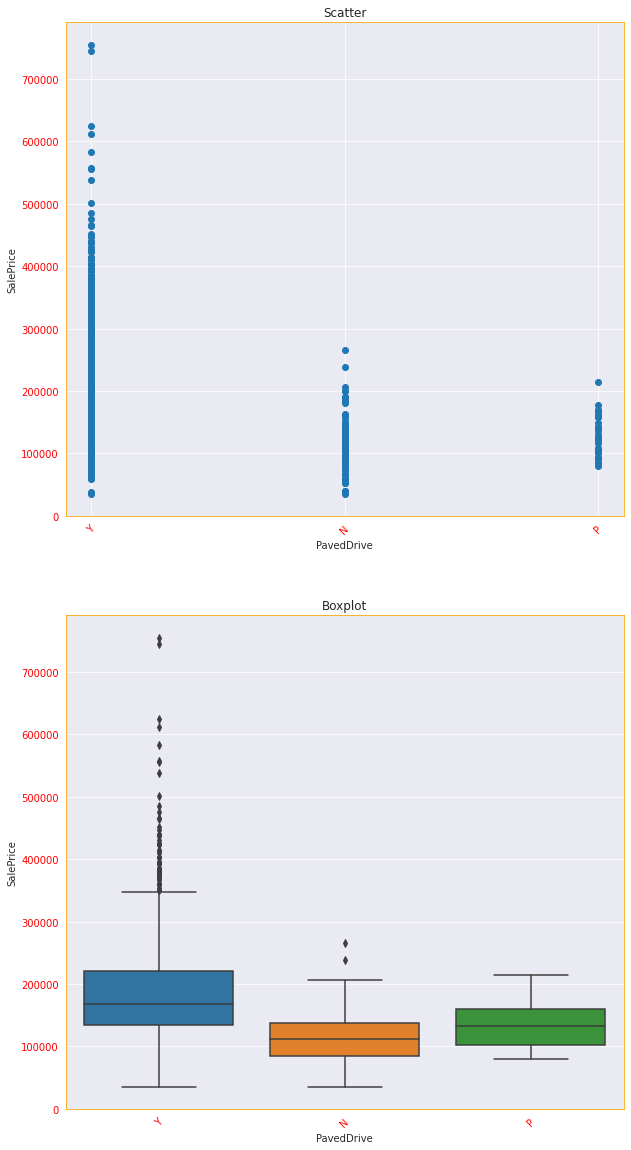

In [145]:
analyser.var_overview(var=train_columns[65], target=target)

Percentage of samples in each class

In [146]:
dataset_train[train_columns[65]].value_counts(normalize=True)

Y   0.918
N   0.062
P   0.021
Name: PavedDrive, dtype: float64

- driveways are dominated by Paved type (almost 92%), but there are some differences in price beetwen classes which may be valid

### WoodDeckSF

WoodDeckSF: Wood deck area in square feet

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 94.2445 |       125.296        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


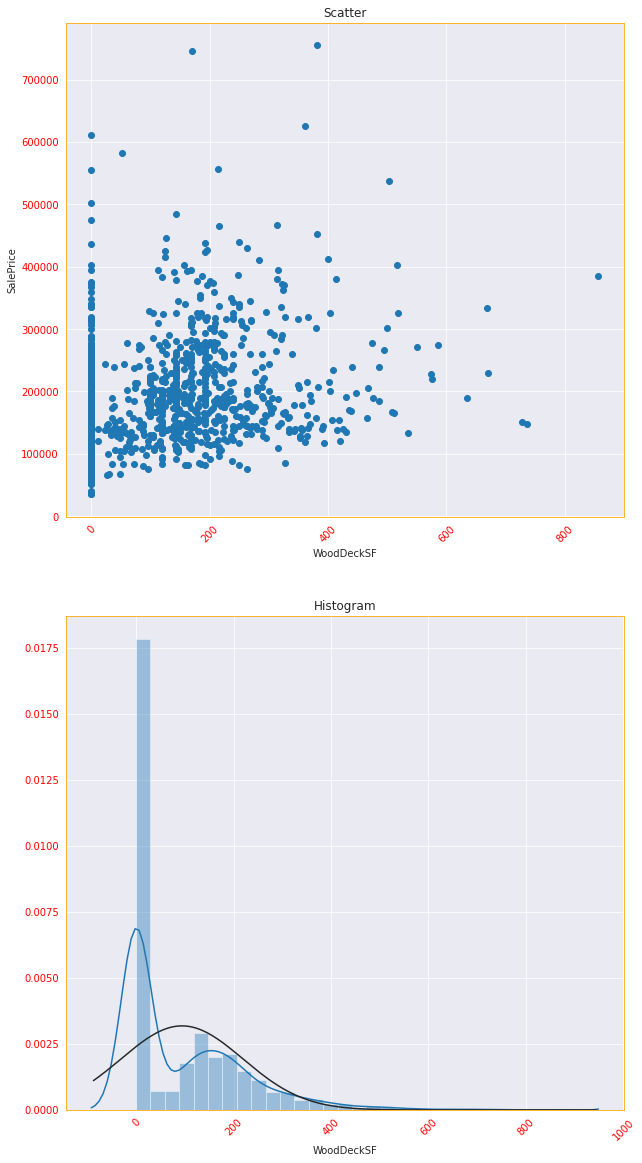

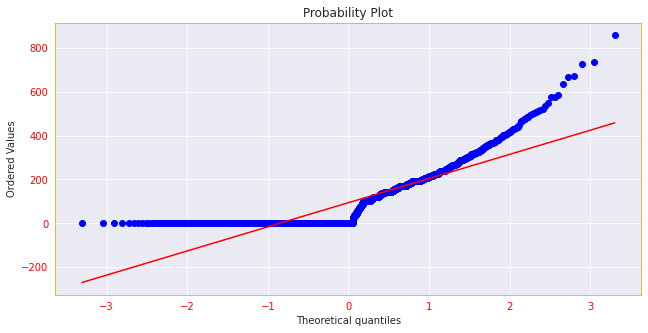

In [147]:
analyser.var_overview(var=train_columns[66], target=target)

- Wood deck area does not seems to be associated with house price
- Variable can be droped from dataset

### OpenPorchSF

OpenPorchSF: Open porch area in square feet

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 46.6603 |       66.2333        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


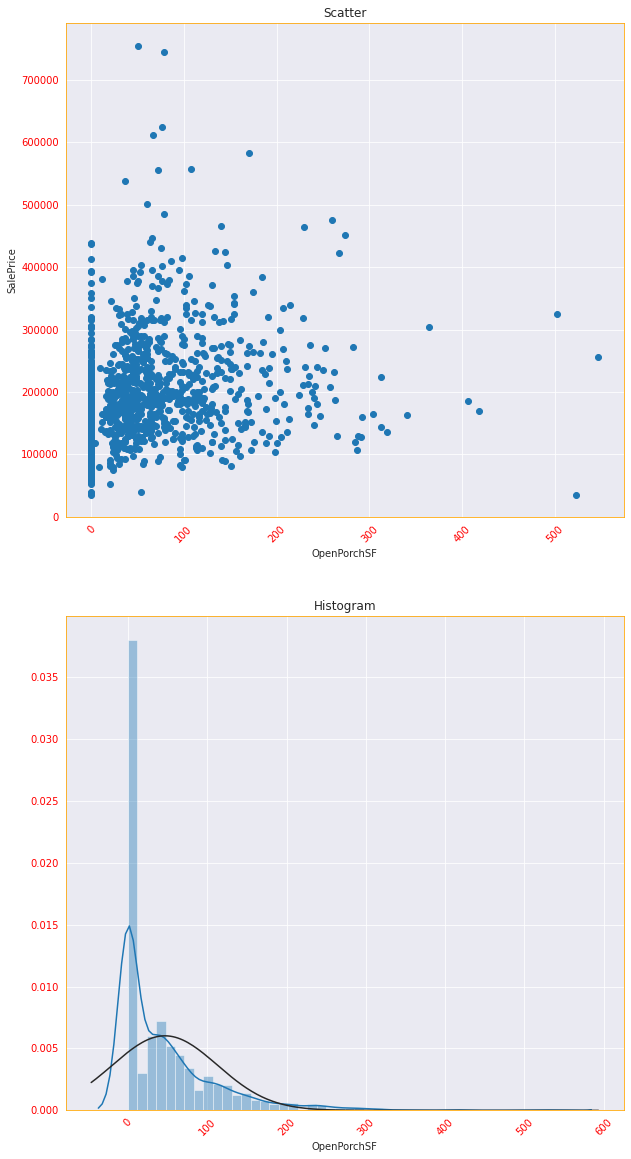

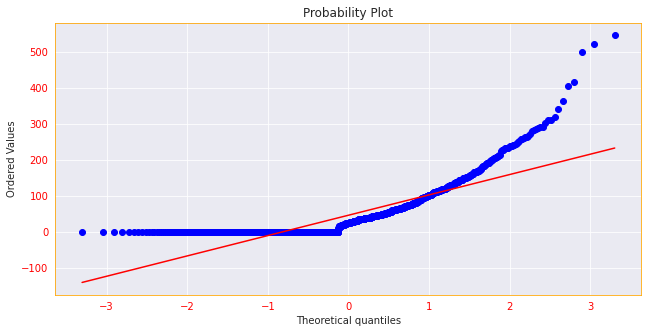

In [148]:
analyser.var_overview(var=train_columns[67], target=target)

- Open porch area does not seems to be associated with house price
- Variable can be droped from dataset

### EnclosedPorch

EnclosedPorch: Enclosed porch area in square feet

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 21.9541 |       61.0982        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


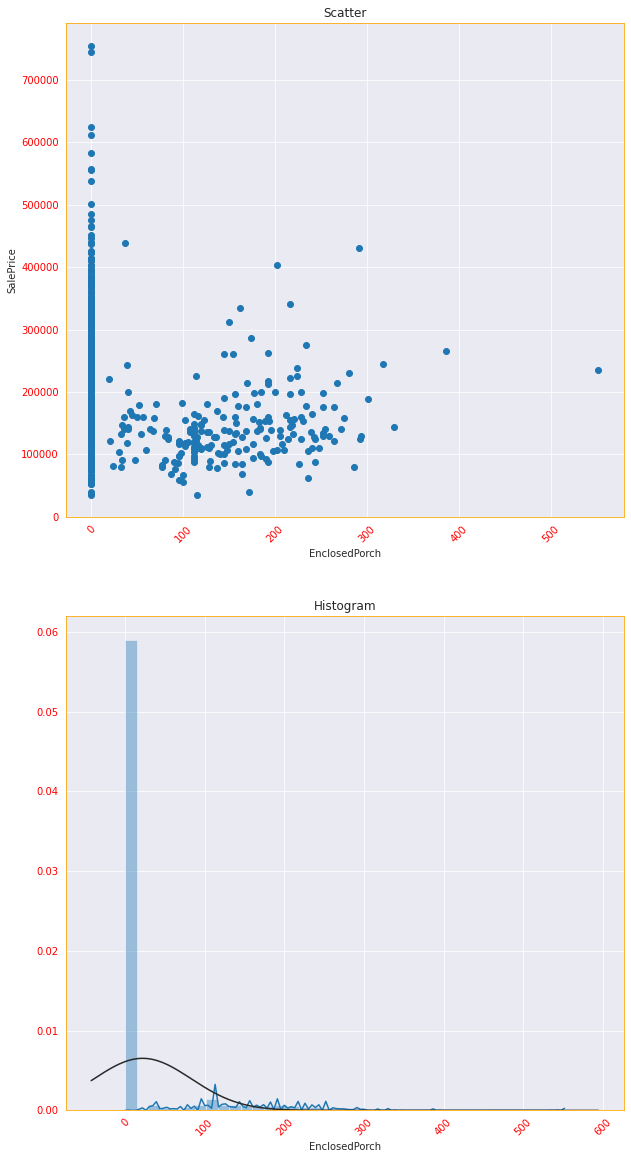

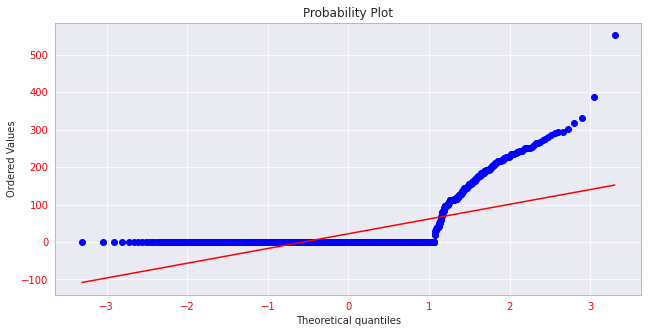

In [149]:
analyser.var_overview(var=train_columns[68], target=target)

- Closed porch area does not seems to be associated with house price
- Variable can be droped from dataset

### 3SsnPorch

3SsnPorch: Three season porch area in square feet

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 3.40959 |       29.3073        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


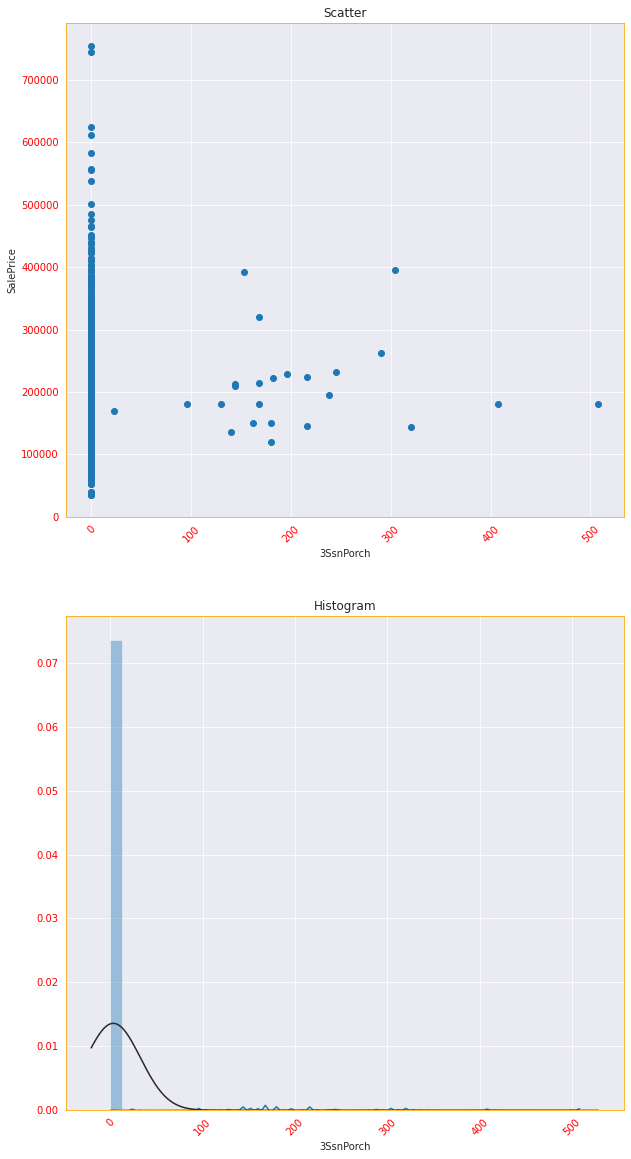

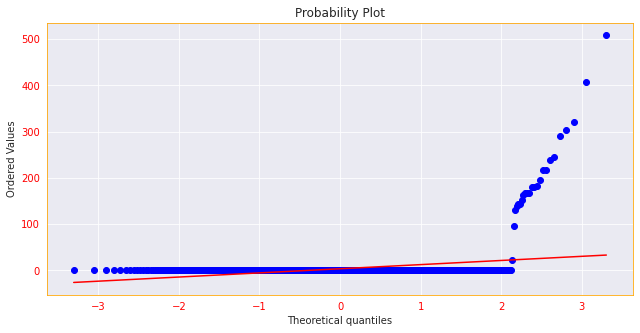

In [150]:
analyser.var_overview(var=train_columns[69], target=target)

- Three season porch area does not contain any useful information
- Variable can be droped from dataset

### ScreenPorch


ScreenPorch: Screen porch area in square feet

+----------+--------+----------------------+
| DATA     |  MEAN  |  STANDARD DEVIATION  |
+==========+========+======================+
| Variable | 15.061 |       55.7383        |
+----------+--------+----------------------+
| Target   | 180921 |       79415.3        |
+----------+--------+----------------------+


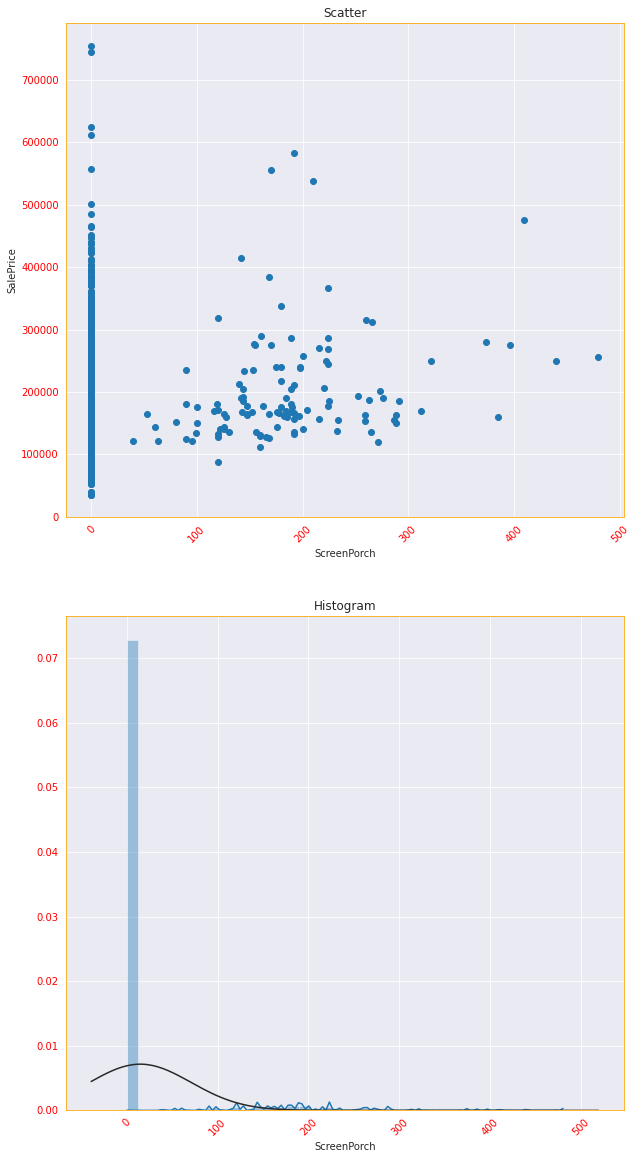

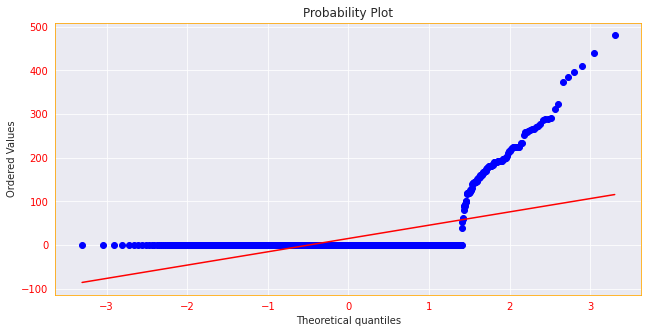

In [151]:
analyser.var_overview(var=train_columns[70], target=target)

- Screen porch area does not contain any useful information
- Variable can be droped from dataset

### PoolArea

PoolArea: Pool area in square feet

+----------+--------+----------------------+
| DATA     |  MEAN  |  STANDARD DEVIATION  |
+==========+========+======================+
| Variable | 2.7589 |       40.1635        |
+----------+--------+----------------------+
| Target   | 180921 |       79415.3        |
+----------+--------+----------------------+


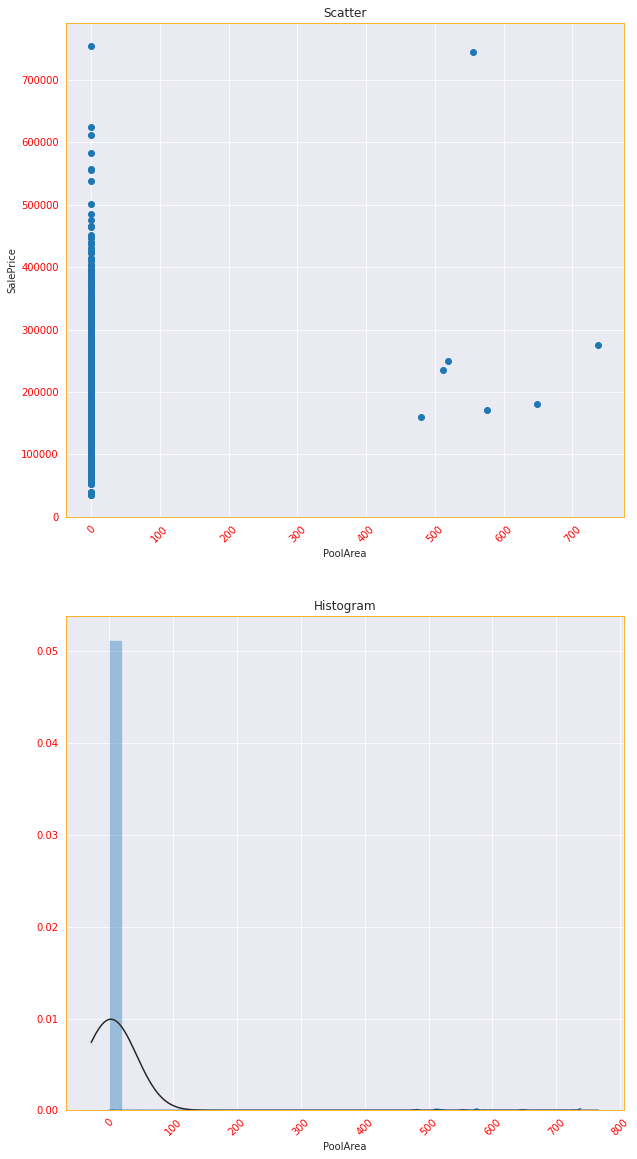

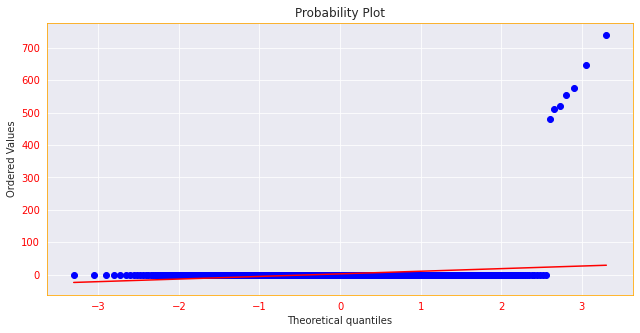

In [152]:
analyser.var_overview(var=train_columns[71], target=target)

- Pool area does not contain any useful information
- Variable can be droped from dataset

### PoolQC

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [0]:
processer.fill_with(train_columns[72], 'NA')

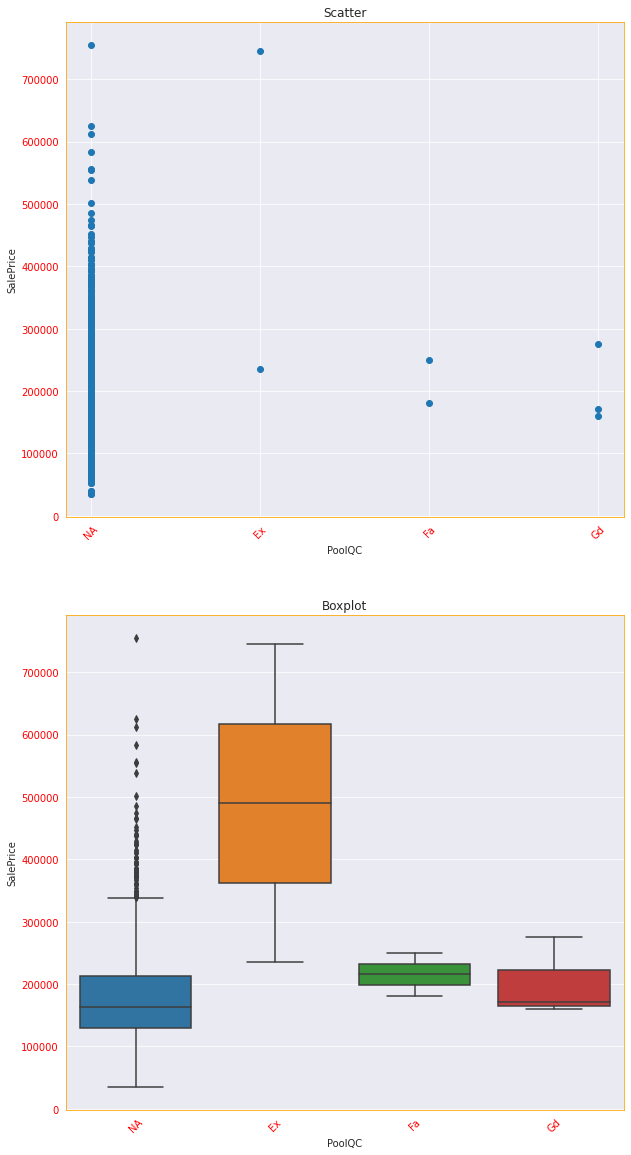

In [154]:
analyser.var_overview(var=train_columns[72], target=target)

- Pool quality does not contain any useful information
- Variable can be droped from dataset

### Fence

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [0]:
processer.fill_with(train_columns[73], 'NA')

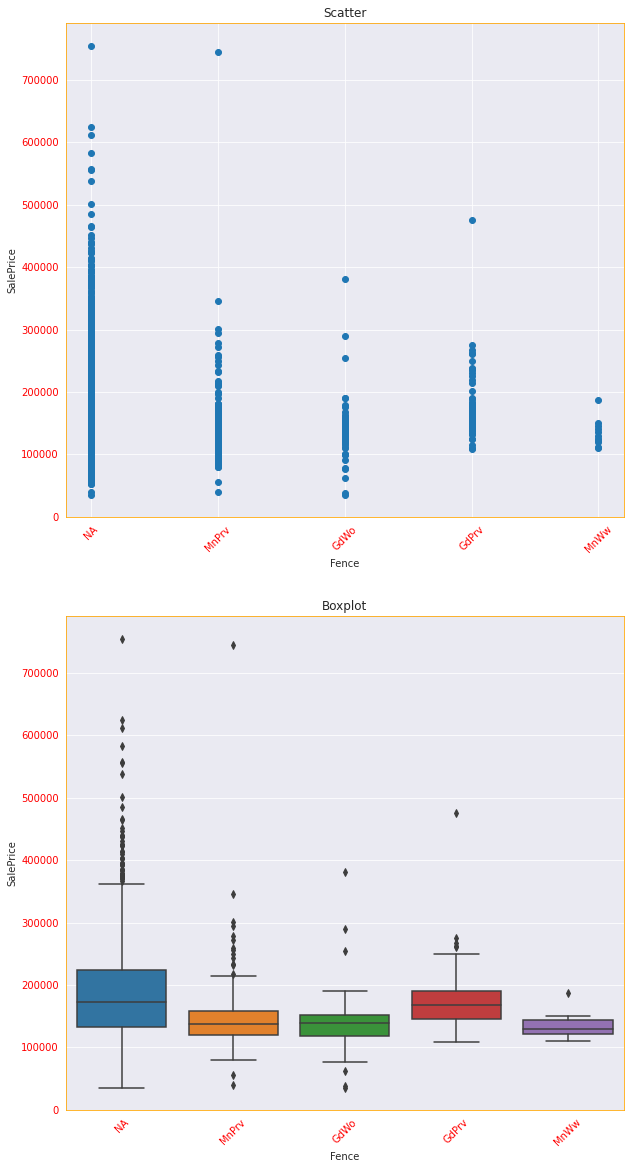

In [156]:
analyser.var_overview(var=train_columns[73], target=target)

Percentage of samples in each class

In [157]:
dataset_train[train_columns[73]].value_counts(normalize=True)

NA      0.808
MnPrv   0.108
GdPrv   0.040
GdWo    0.037
MnWw    0.008
Name: Fence, dtype: float64

- Fence type does not have significant effect on house price, but there is no reason to drop it

### MiscFeature

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [0]:
processer.fill_with(train_columns[74], 'NA')

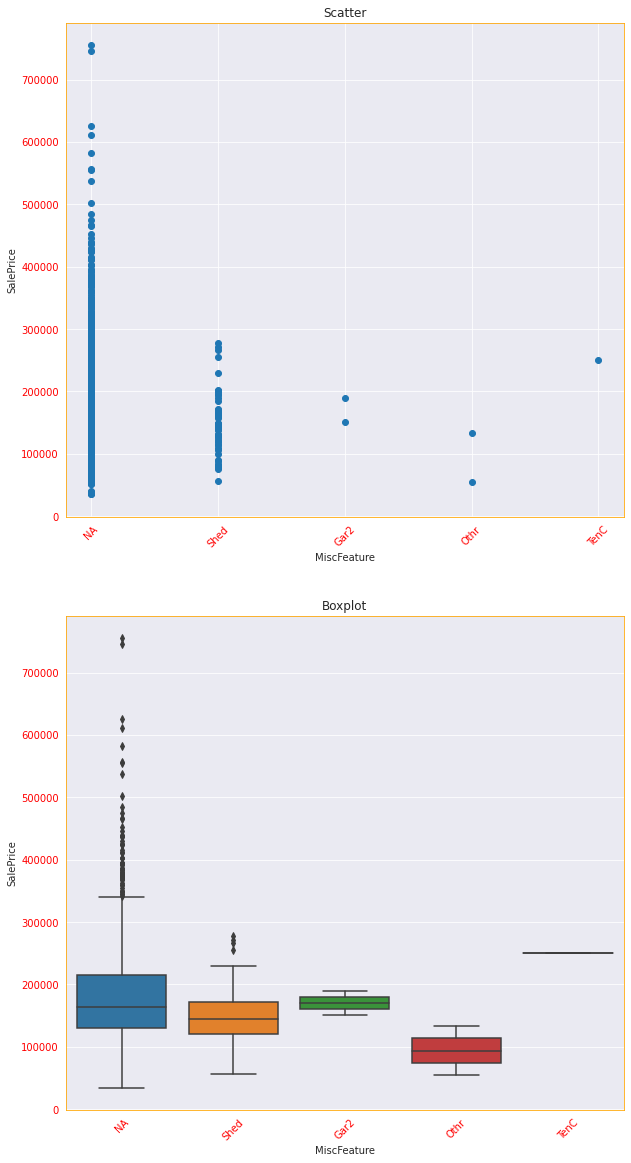

In [159]:
analyser.var_overview(var=train_columns[74], target=target)

Percentage of samples in each class

In [160]:
dataset_train[train_columns[74]].value_counts(normalize=True)

NA     0.963
Shed   0.034
Othr   0.001
Gar2   0.001
TenC   0.001
Name: MiscFeature, dtype: float64

- MiscFeature does not provide any useful information, so it should be droped from dataset

### MiscVal


MiscVal: $Value of miscellaneous feature

+----------+--------+----------------------+
| DATA     |  MEAN  |  STANDARD DEVIATION  |
+==========+========+======================+
| Variable | 43.489 |       495.953        |
+----------+--------+----------------------+
| Target   | 180921 |       79415.3        |
+----------+--------+----------------------+


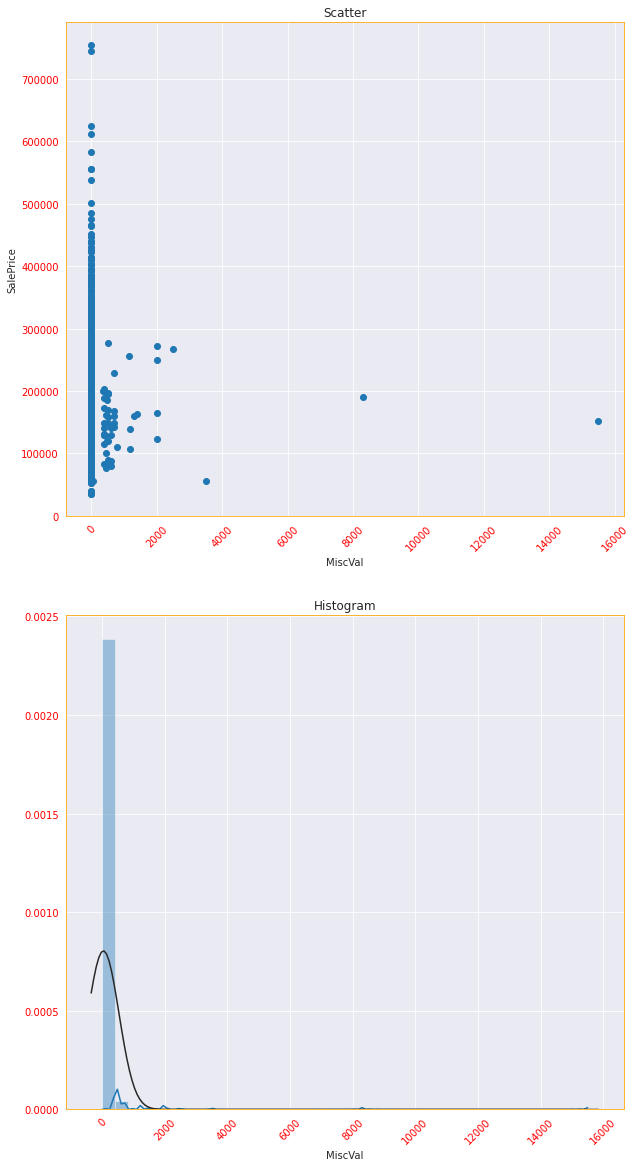

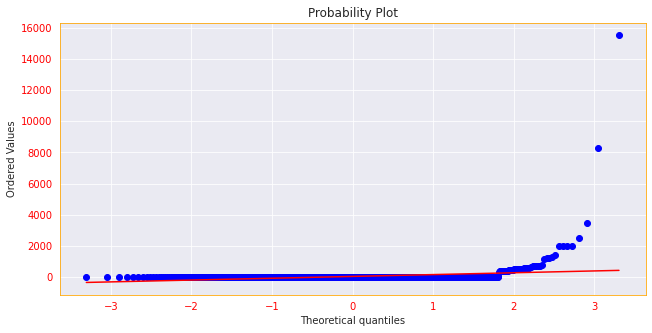

In [161]:
analyser.var_overview(var=train_columns[75], target=target)

- Miscellaneous value does not contain any useful information
- Variable can be droped from dataset

### MoSold


MoSold: Month Sold (MM)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 6.32192 |        2.7027        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


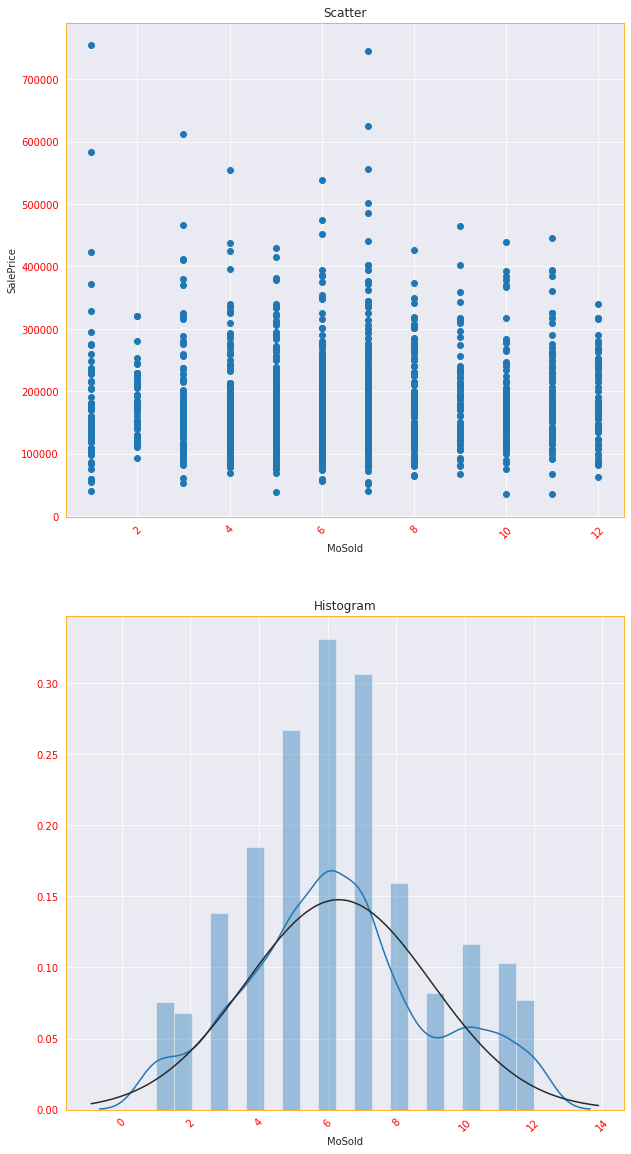

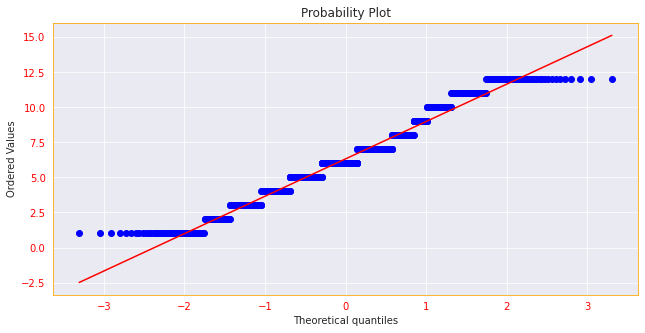

In [162]:
analyser.var_overview(var=train_columns[76], target=target)

- Month when property was sold does not have correlation with price
- Variable can be droped from dataset

### YrSold

YrSold: Year Sold (YYYY)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 2007.82 |       1.32764        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


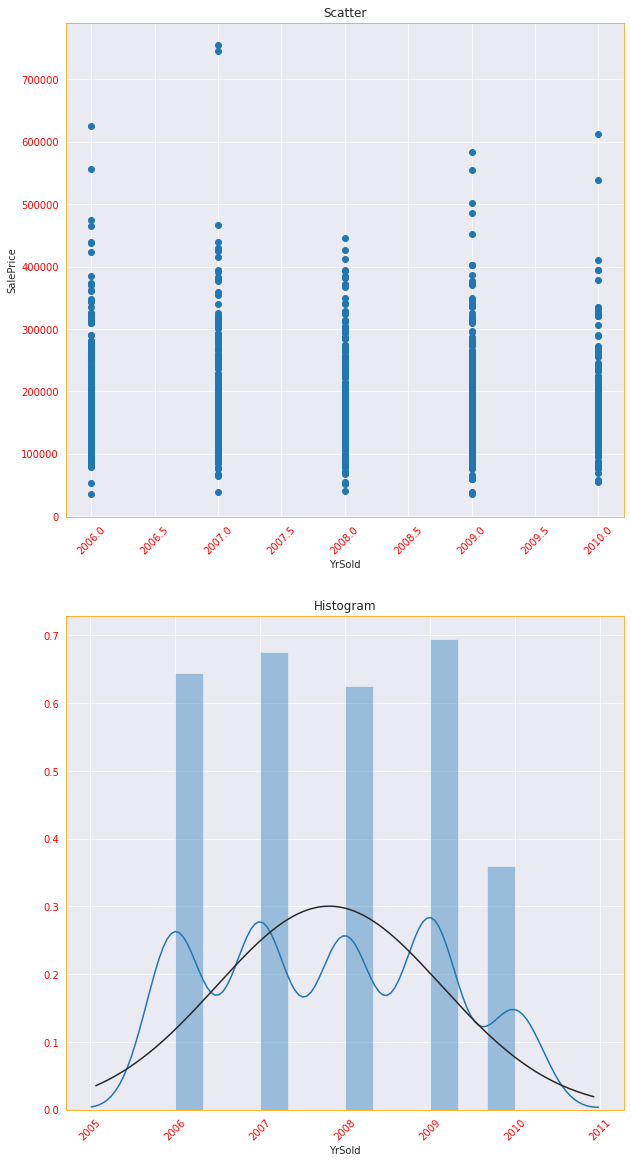

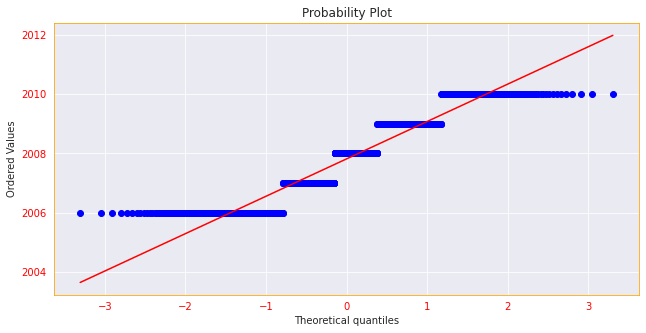

In [163]:
analyser.var_overview(var=train_columns[77], target=target)

- Year when property was sold does not have correlation with price
- Variable can be droped from dataset

### SaleType

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

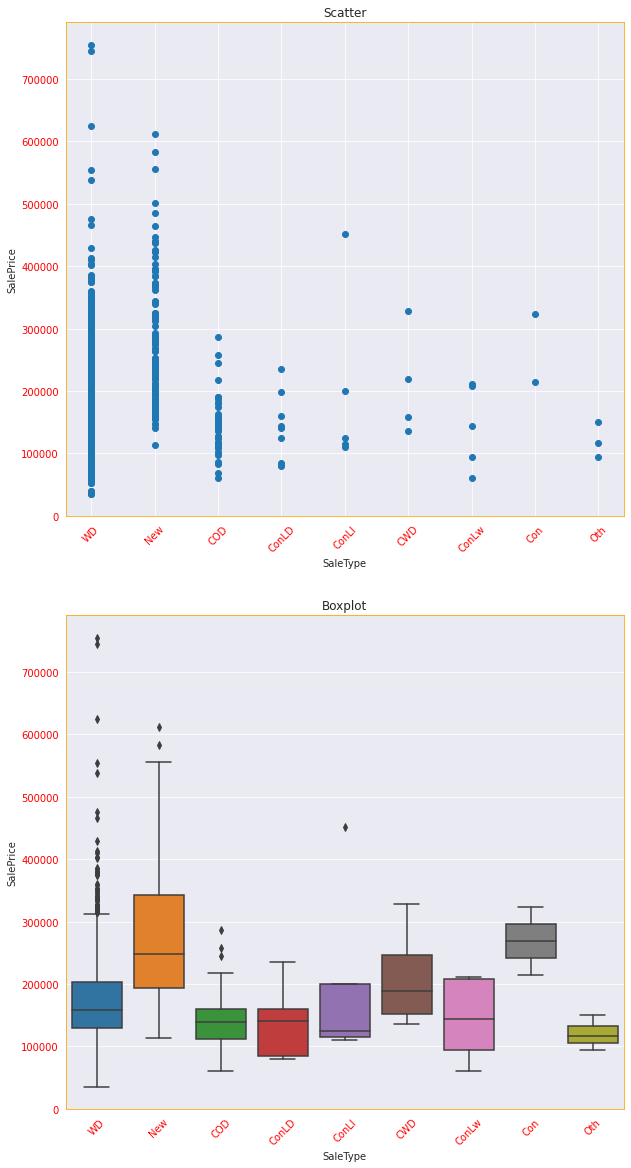

In [164]:
analyser.var_overview(var=train_columns[78], target=target)

Percentage of samples in each class

In [165]:
dataset_train[train_columns[78]].value_counts(normalize=True)

WD      0.868
New     0.084
COD     0.029
ConLD   0.006
ConLw   0.003
ConLI   0.003
CWD     0.003
Oth     0.002
Con     0.001
Name: SaleType, dtype: float64

- Most of sale types classes are very rare in this dataset, there is possibility to merge some of them, but it still could be not enough to make them a valid estimators

### SaleCondition

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


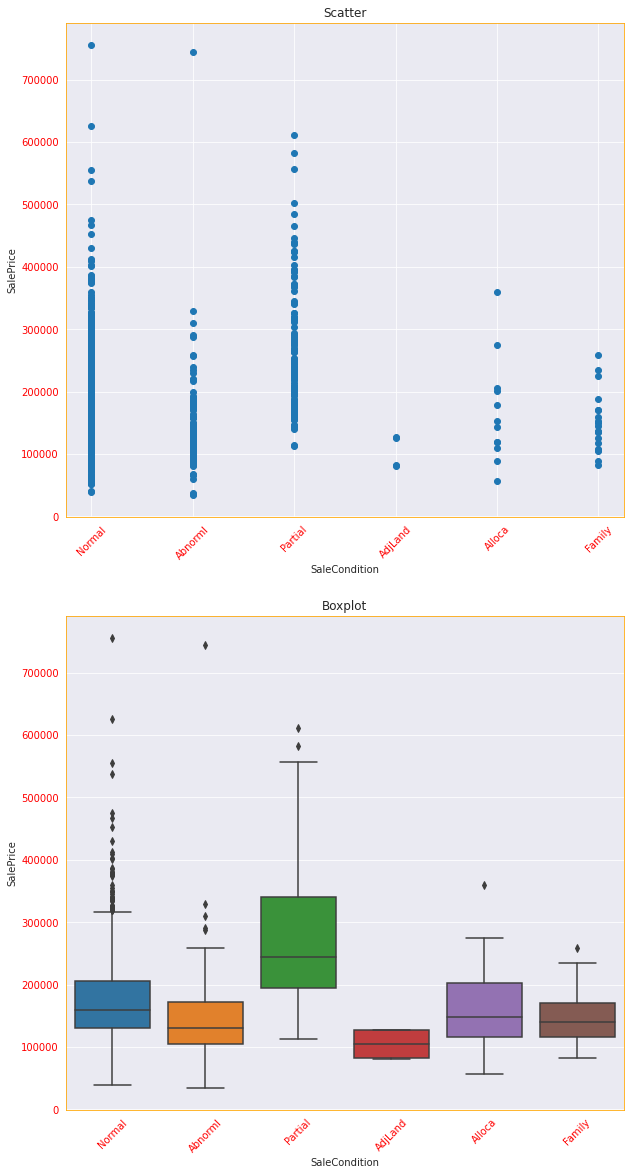

In [166]:
analyser.var_overview(var=train_columns[79], target=target)

Percentage of samples in each class

In [167]:
dataset_train[train_columns[79]].value_counts(normalize=True)

Normal    0.821
Partial   0.086
Abnorml   0.069
Family    0.014
Alloca    0.008
AdjLand   0.003
Name: SaleCondition, dtype: float64

- It looks like sale conditions are correlated with house price, but some of classes have not enough cases to be good estimates

## GROUPS OF VARIABLES ANALYSIS

In [168]:
### TEMPORARY, DELETE LATER
print(data_description.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

### Groups of variables

- Quality group

### Quality informations

Correlation between quality measures

In [0]:
quality_list = ['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'PoolQC', 'OverallQual']
ds_quality = dataset_train[quality_list]

In [171]:
pps.matrix(ds_quality)

ExterQual  BsmtQual  HeatingQC  KitchenQual  FireplaceQu  \
ExterQual        1.000     0.515      0.453        0.610        0.196   
BsmtQual         0.549     1.000      0.393        0.524        0.335   
HeatingQC        0.310     0.314      1.000        0.333        0.027   
KitchenQual      0.653     0.526      0.458        1.000        0.301   
FireplaceQu      0.192     0.135      0.000        0.115        1.000   
GarageQual       0.004     0.000      0.000        0.023        0.000   
PoolQC           0.000     0.000      0.000        0.000        0.000   
OverallQual      0.204     0.208      0.137        0.200        0.161   

             GarageQual  PoolQC  OverallQual  
ExterQual         0.000   0.000        0.675  
BsmtQual          0.122   0.000        0.542  
HeatingQC         0.066   0.000        0.249  
KitchenQual       0.016   0.005        0.598  
FireplaceQu       0.013   0.005        0.193  
GarageQual        1.000   0.000        0.000  
PoolQC            0.000   1.000        0.000  
OverallQual       0.030   0.004        1.000

- It looks like:
  - ExterQual: Evaluates the quality of the material on the exterior
  - BsmtQual: Evaluates the height of the basement
  - HeatingQC: Heating quality and condition
  - KitchenQual: Kitchen quality

  Are correlated with each other, both ways
- On the other hand it seems that Overall quality is a good predictor of above variables ( excluding HeatingQC), but these variables are not good  predictors of Overall quality, which makes sense.
